In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder, MinMaxScaler ,StandardScaler

#import matrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

#winsorise
from scipy.stats.mstats import winsorize


In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

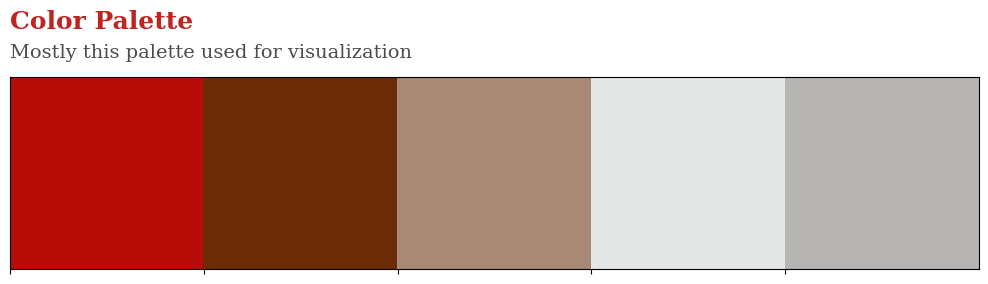

In [3]:
colors = ["#B80C09", "#6B2B06","#A88976", "#E5E7E6","#B7B5B3"]

palette = sns.color_palette(palette = colors)

sns.palplot(palette, size = 2.5)

plt.text(-0.5, -0.75, "Color Palette", {"font": "Serif", "fontsize": 18, "weight" : "bold", "color": "#B80C09"}, alpha = 0.9)
plt.text(-0.5, -0.6, "Mostly this palette used for visualization", {"font" : "Serif", "fontsize" : 14, "weight": "normal"}, alpha = 0.7)
plt.show()

In [4]:
print(df.shape)
df.head()

(5110, 12)


id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [5]:
df.head(5).T

0              1             2        3  \
id                            9046          51676         31112    60182   
gender                        Male         Female          Male   Female   
age                           67.0           61.0          80.0     49.0   
hypertension                     0              0             0        0   
heart_disease                    1              0             1        0   
ever_married                   Yes            Yes           Yes      Yes   
work_type                  Private  Self-employed       Private  Private   
Residence_type               Urban          Rural         Rural    Urban   
avg_glucose_level           228.69         202.21        105.92   171.23   
bmi                           36.6            NaN          32.5     34.4   
smoking_status     formerly smoked   never smoked  never smoked   smokes   
stroke                           1              1             1        1   

                               4  
id                          1665  
gender                    Female  
age                         79.0  
hypertension                   1  
heart_disease                  0  
ever_married                 Yes  
work_type          Self-employed  
Residence_type             Rural  
avg_glucose_level         174.12  
bmi                         24.0  
smoking_status      never smoked  
stroke                         1

In [6]:
df.tail()

id  gender   age  hypertension  heart_disease ever_married  \
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0

In [7]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

In [8]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#bmi null percentage
(df["bmi"].isnull().sum() / df.shape[0]) * 100

3.9334637964774952

<Axes: >

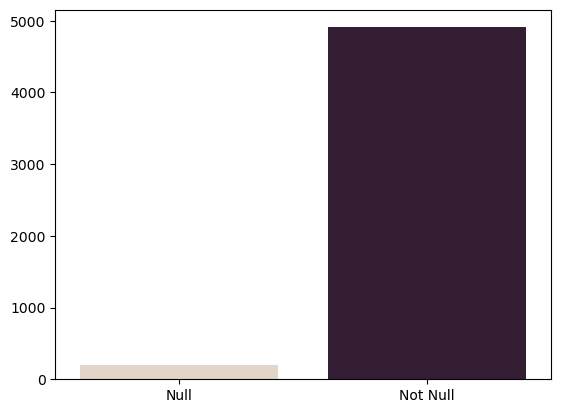

In [10]:
sns.barplot(data=df, x=["Null", "Not Null"], y=[df["bmi"].isnull().sum(), df["bmi"].notnull().sum()], palette="ch:.25")

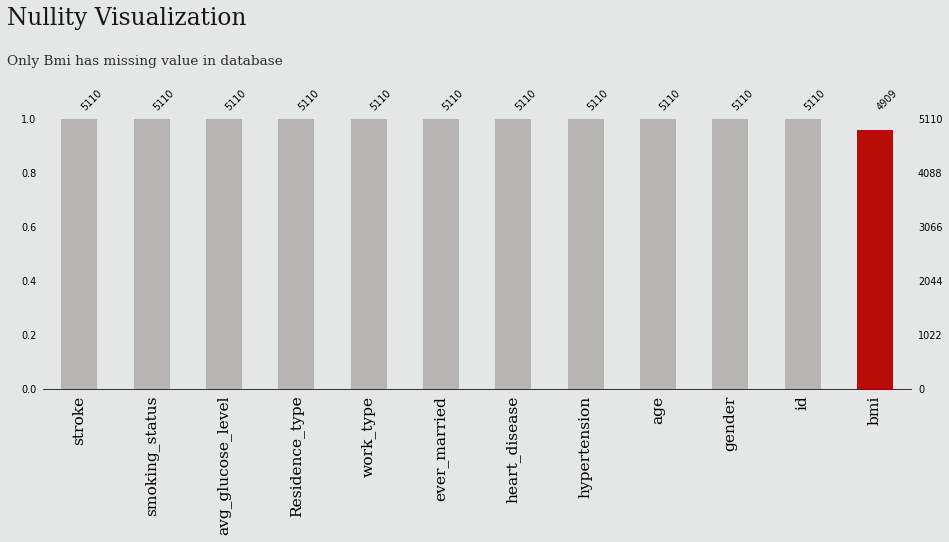

In [11]:
import missingno as msno

color = ["#B7B5B3" for i in range(df.shape[1] - 1)]
color.append("#B80C09")

fig, ax = plt.subplots(figsize = (16, 5), dpi = 70)

fig.patch.set_facecolor("#E5E7E6")
ax.set_facecolor("#E5E7E6")

msno.bar(df,ax = ax, sort = "descending", color = color, fontsize = 10, labels = "off", filter = "top")

ax.text(-1, 1.35, "Nullity Visualization", {"font": "Serif", "fontsize": 24, "color": "black"}, alpha=0.9)
ax.text(-1, 1.2, "Only Bmi has missing value in database", {"font" : "Serif", "fontsize": 14, "color" : "black"}, alpha = 0.8)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, ha = "center", **{"font": "Serif", "fontsize": 16, "weight" : "normal"})

ax.spines["bottom"].set_visible(True)
plt.show()


In [12]:
df["bmi"] = df["bmi"].fillna(round(df["bmi"].median(), 2))
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

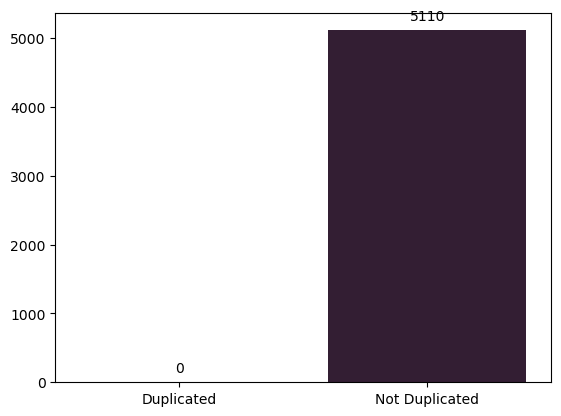

In [13]:
# Calculate the count of duplicated and non-duplicated entries
duplicated_count = df.duplicated().sum()
not_duplicated_count = df[df.columns[0]].count() - duplicated_count

# Create the bar plot
ax = sns.barplot(x=["Duplicated", "Not Duplicated"], 
                 y=[duplicated_count, not_duplicated_count], 
                 palette="ch:.25")


# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

In [14]:
#General Observation
round(df.describe(), 2)

id      age  hypertension  heart_disease  avg_glucose_level  \
count   5110.00  5110.00        5110.0        5110.00            5110.00   
mean   36517.83    43.23           0.1           0.05             106.15   
std    21161.72    22.61           0.3           0.23              45.28   
min       67.00     0.08           0.0           0.00              55.12   
25%    17741.25    25.00           0.0           0.00              77.24   
50%    36932.00    45.00           0.0           0.00              91.88   
75%    54682.00    61.00           0.0           0.00             114.09   
max    72940.00    82.00           1.0           1.00             271.74   

           bmi   stroke  
count  5110.00  5110.00  
mean     28.86     0.05  
std       7.70     0.22  
min      10.30     0.00  
25%      23.80     0.00  
50%      28.10     0.00  
75%      32.80     0.00  
max      97.60     1.00

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [16]:
# get type of data
def col_names(df):
    #Categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    
    #Numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    
    #Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 12]
    
    #Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    
    #num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    #Categorical but Cardinal Variables
    cat_but_car = [col for col in cat_cols if df[col].nunique() > 12]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat} \nCategorical but Cardinal: {cat_but_car}") 
    return num_cols, cat_cols

In [17]:
num_cols, cat_cols = col_names(df)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke'] 
Categorical but Cardinal: []


In [18]:
df[num_cols].describe().T

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                5110.0     28.862035      7.699562  10.30     23.800   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.100     32.80     97.60

In [19]:
for column in df:
    print(f"{column} - {len(df[column].unique())} : {df[column].unique()}")

id - 5110 : [ 9046 51676 31112 ... 19723 37544 44679]
gender - 3 : ['Male' 'Female' 'Other']
age - 104 : [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 

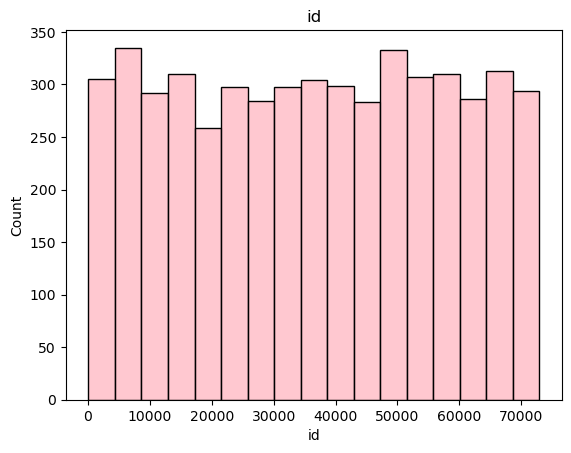

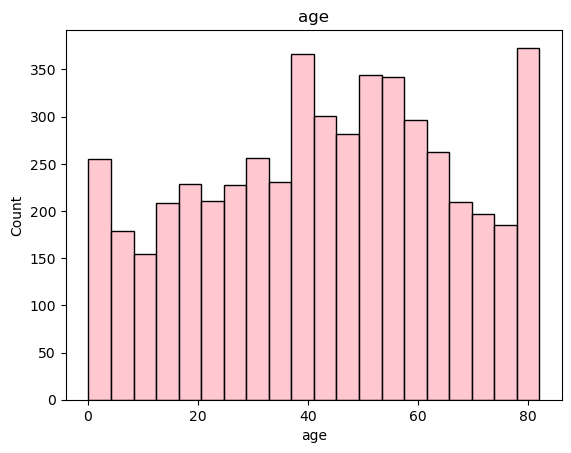

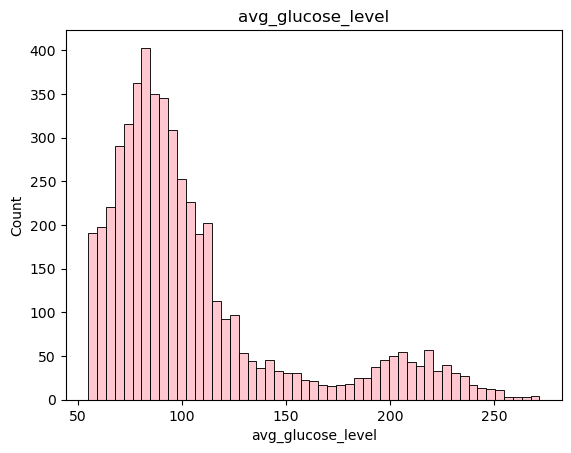

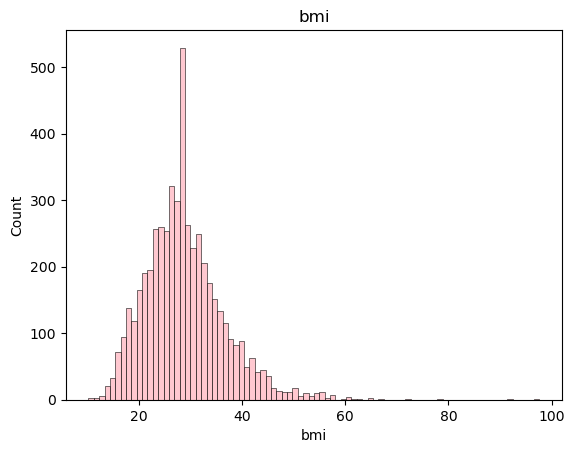

In [20]:
#Visualization
for col in num_cols:
    sns.histplot(x=df[col], data=df, color="lightpink").set(title=col)
    plt.show(block=True)

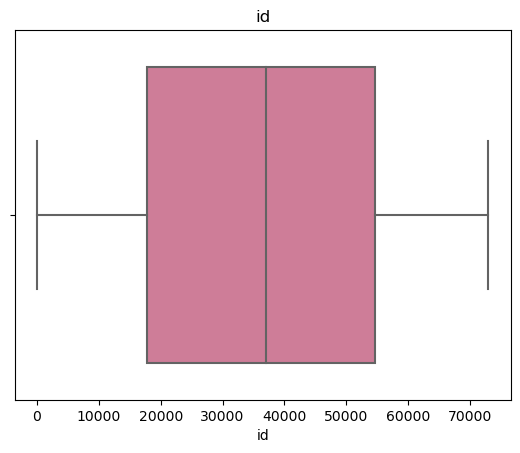

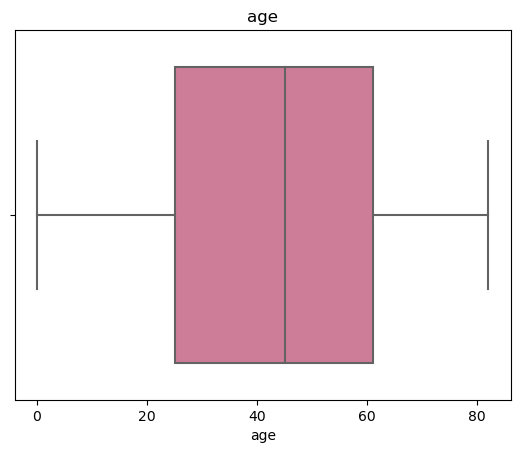

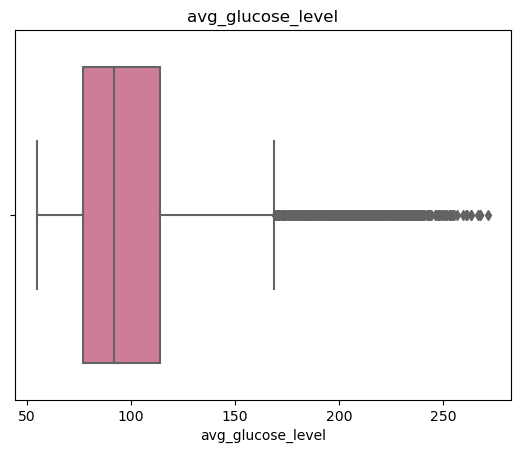

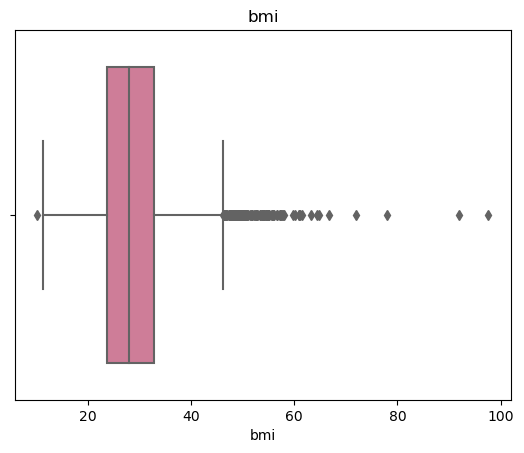

In [21]:
for col in num_cols:
    sns.boxplot(x=df[col], data=df, color="palevioletred").set(title=col)
    plt.show(block=True)

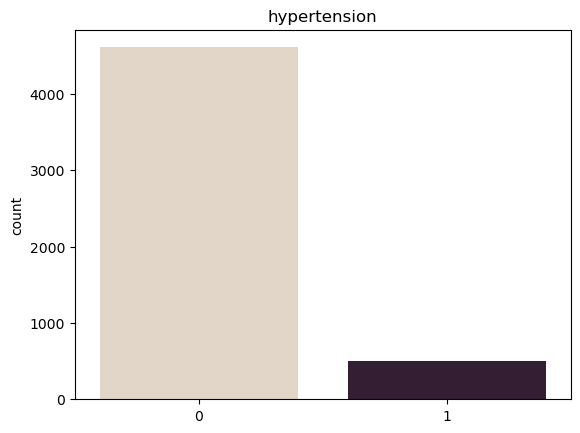

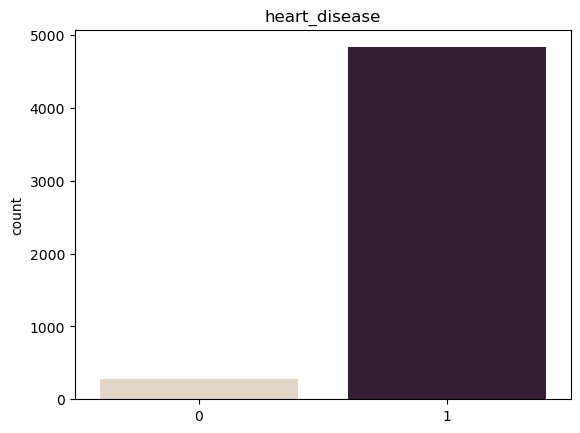

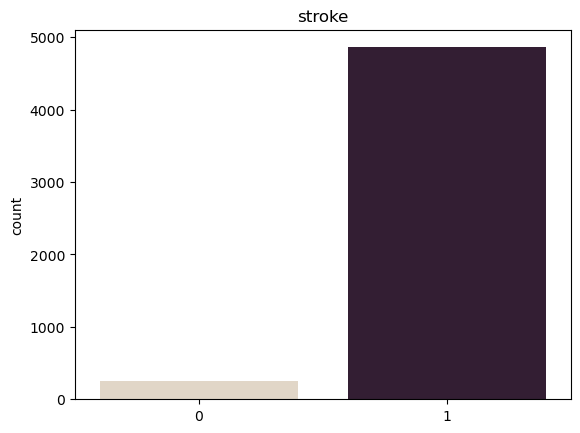

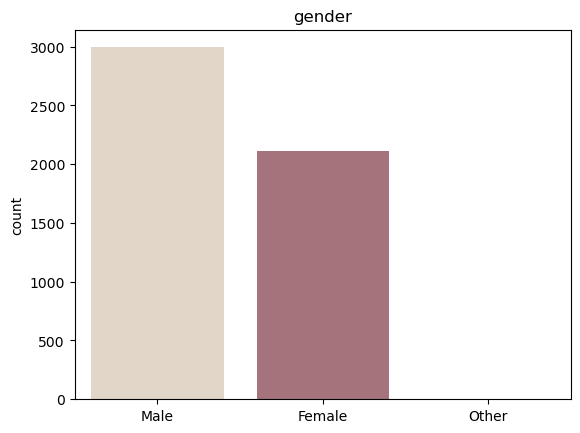

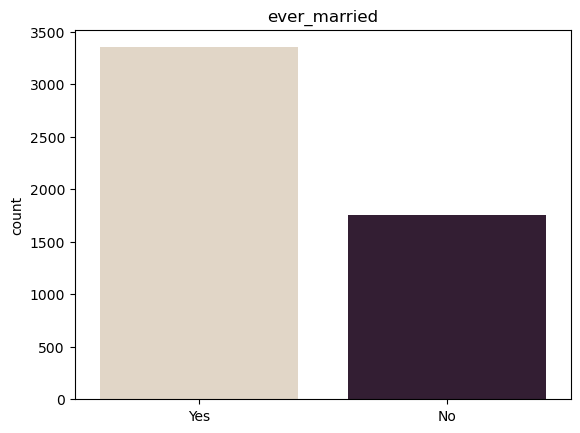

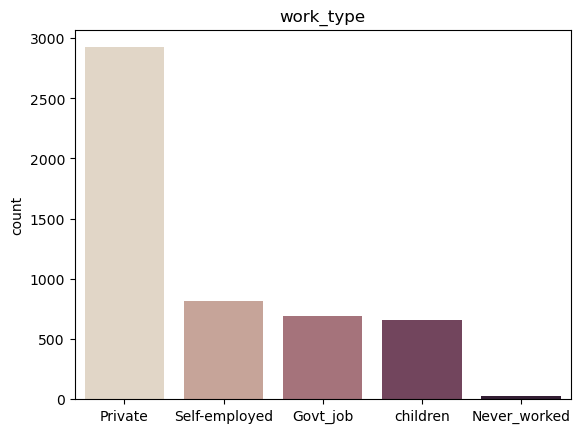

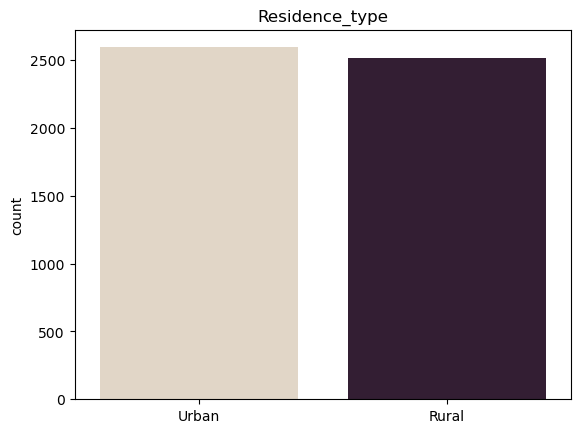

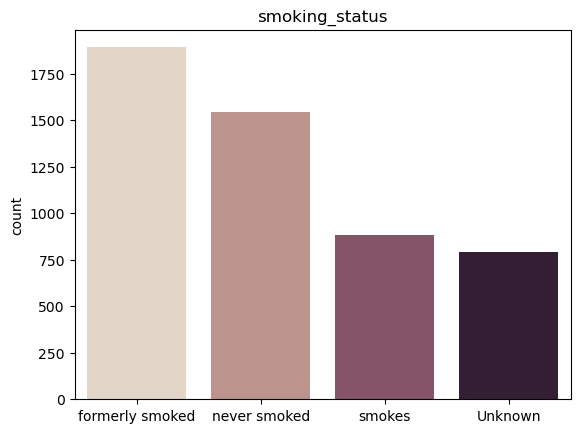

In [22]:
#Analyzing Categorical Variables
for col in cat_cols: 
    sns.barplot(x = df[col].unique(), y = df[col].value_counts(), palette="ch:.25").set(title=col)
    plt.show(block=True)

In [23]:
df_v = df.copy()

df_v["bmi_cat"] = pd.cut(df["bmi"], bins = [0, 18.5, 25, 30, 1000], labels = ["Underweight", "Ideal", "Overweight", "Obesity"])
df_v["age_cat"] = pd.cut(df["age"], bins = [0, 16, 45, 60, 200], labels = ["Child", "Young Adult","Mid Adult", "Elderly"])
df_v["glucose_cat"] = pd.cut(df["avg_glucose_level"], bins = [0, 90, 160, 230, 500], labels = ["Low", "Normal", "High", "Very High"])

In [24]:
#Data Cleaning
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

id : [ 9046 51676 31112 ... 19723 37544 44679]
gender : ['Male' 'Female' 'Other']
age : [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02

In [25]:
df.drop(["id"], axis = 1, inplace = True)

In [26]:
#Gender
df[df["gender"] == "Other"]

gender   age  hypertension  heart_disease ever_married work_type  \
3116  Other  26.0             0              0           No   Private   

     Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
3116          Rural             143.33  22.4  formerly smoked       0

In [27]:
df = df[df["gender"] != "Other"]

In [28]:
#Ever Married data type
df["ever_married"] = df["ever_married"].replace(["Yes", "No"], [1, 0])

In [29]:
#Encoding
columns_need_to_be_numeric = [col for col in df.columns if df[col].dtype == "object"]

df1 = pd.get_dummies(df, columns_need_to_be_numeric)
df1.head()

age  hypertension  heart_disease  ever_married  avg_glucose_level   bmi  \
0  67.0             0              1             1             228.69  36.6   
1  61.0             0              0             1             202.21  28.1   
2  80.0             0              1             1             105.92  32.5   
3  49.0             0              0             1             171.23  34.4   
4  79.0             1              0             1             174.12  24.0   

   stroke  gender_Female  gender_Male  work_type_Govt_job  \
0       1          False         True               False   
1       1           True        False               False   
2       1          False         True               False   
3       1           True        False               False   
4       1           True        False               False   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False                     True   
2                   False               True                    False   
3                   False               True                    False   
4                   False              False                     True   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0               False                 False                  True   
1               False                  True                 False   
2               False                  True                 False   
3               False                 False                  True   
4               False                  True                 False   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                   False                            True   
1                   False                           False   
2                   False                           False   
3                   False                           False   
4                   False                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                  False  
1                         True                  False  
2                         True                  False  
3                        False                   True  
4                         True                  False

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5109 non-null   float64
 1   hypertension                    5109 non-null   int64  
 2   heart_disease                   5109 non-null   int64  
 3   ever_married                    5109 non-null   int64  
 4   avg_glucose_level               5109 non-null   float64
 5   bmi                             5109 non-null   float64
 6   stroke                          5109 non-null   int64  
 7   gender_Female                   5109 non-null   bool   
 8   gender_Male                     5109 non-null   bool   
 9   work_type_Govt_job              5109 non-null   bool   
 10  work_type_Never_worked          5109 non-null   bool   
 11  work_type_Private               5109 non-null   bool   
 12  work_type_Self-employed         5109 no

In [31]:
columns_need_scaling = [col for col in df1.columns if df1[col].max() > 1]

scaler = StandardScaler()
df1[columns_need_scaling] = scaler.fit_transform(df1[columns_need_scaling])
df1.head()

age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  1.051242             0              1             1           2.706450   
1  0.785889             0              0             1           2.121652   
2  1.626174             0              1             1          -0.004867   
3  0.255182             0              0             1           1.437473   
4  1.581949             1              0             1           1.501297   

        bmi  stroke  gender_Female  gender_Male  work_type_Govt_job  \
0  1.004893       1          False         True               False   
1 -0.099142       1           True        False               False   
2  0.472358       1          False         True               False   
3  0.719142       1           True        False               False   
4 -0.631677       1           True        False               False   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False                     True   
2                   False               True                    False   
3                   False               True                    False   
4                   False              False                     True   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0               False                 False                  True   
1               False                  True                 False   
2               False                  True                 False   
3               False                 False                  True   
4               False                  True                 False   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                   False                            True   
1                   False                           False   
2                   False                           False   
3                   False                           False   
4                   False                           False   

   smoking_status_never smoked  smoking_status_smokes  
0                        False                  False  
1                         True                  False  
2                         True                  False  
3                        False                   True  
4                         True                  False

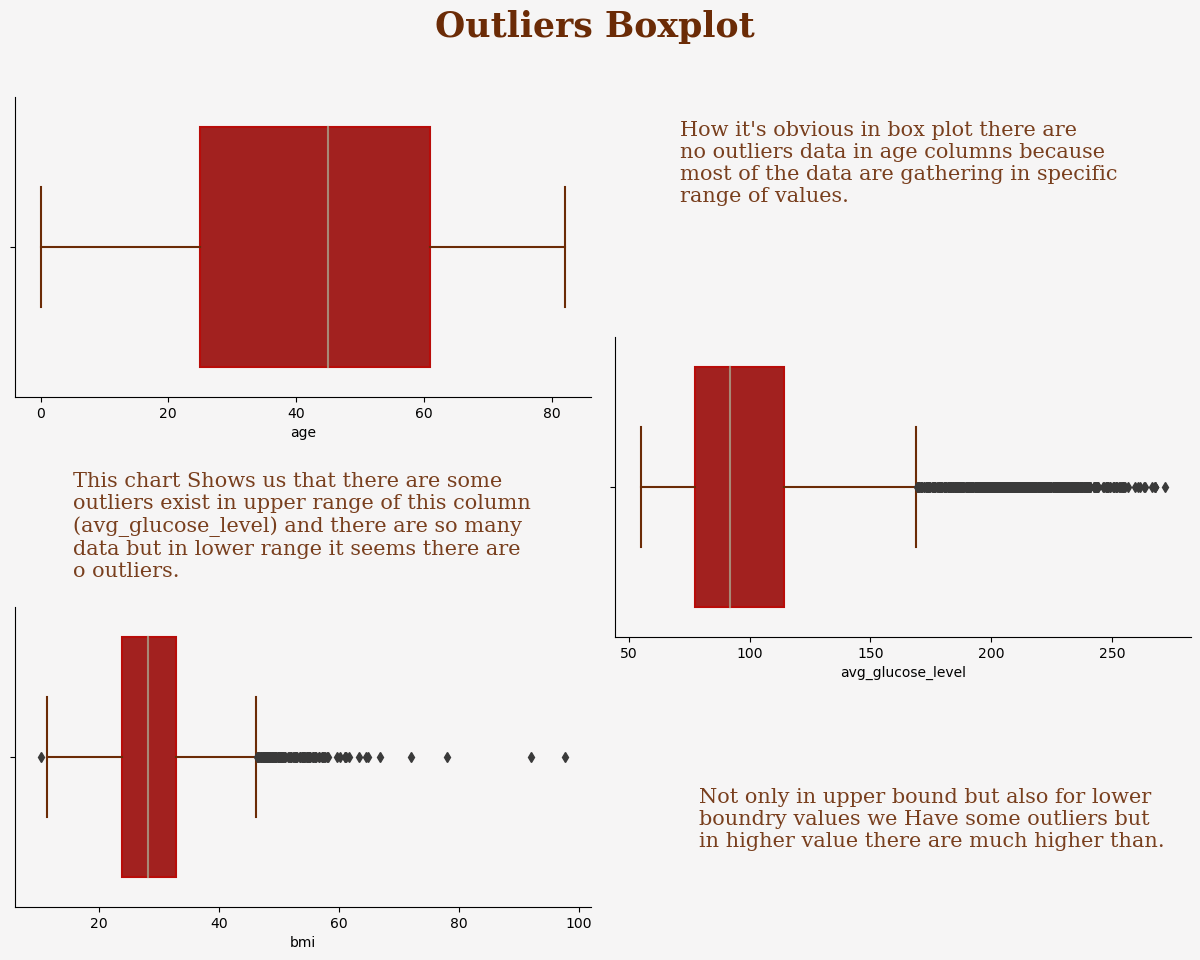

In [32]:
"""
Outliers
What is Outlier -
An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. 
In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. 
Before abnormal observations can be singled out, it is necessary to characterize normal observations.
I used two different method for handling this issue and I will show both of their result and impact of each one on distribution
of the original data. Winsorization Log
"""

fig = plt.figure(figsize=(12, 6))

ax = [None for _ in range(3)]


 # x, y, dx, dy
ax[0] = fig.add_axes([0.,0.6,0.48,0.5])
sns.boxplot(x="age", data=df, ax=ax[0], color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax[0].text(100, -0.15, "How it's obvious in box plot there are\nno outliers data in age columns because\nmost of the data are gathering in specific\nrange of values.",  {"font": "Serif", "fontsize": 15, "weight":"normal", "color":colors[1]}, alpha=0.9)
ax[1] = fig.add_axes([0.5,0.2,0.48,0.5])
sns.boxplot(x="avg_glucose_level", data=df, ax=ax[1], color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax[1].text(-180, 0.30, "This chart Shows us that there are some\noutliers exist in upper range of this column\n(avg_glucose_level) and there are so many\ndata but in lower range it seems there are\no outliers.",  {"font": "Serif", "fontsize": 15, "weight":"normal", "color":colors[1]}, alpha=0.9)
ax[2] = fig.add_axes([0.,-0.25,0.48,0.5])
sns.boxplot(x="bmi", data=df, ax=ax[2], color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax[2].text(120, 0.30, "Not only in upper bound but also for lower\nboundry values we Have some outliers but\nin higher value there are much higher than.",  {"font": "Serif", "fontsize": 15, "weight":"normal", "color":colors[1]}, alpha=0.9)
fig.set_facecolor('#f6f5f5')
for ax in ax: 
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top']:
        ax.spines[loc].set_visible(False)
fig.text(0.35, 1.2, "Outliers Boxplot", {"fontsize":25, "fontweight":'bold', "color":colors[1], "font":"Serif"})
plt.tight_layout()
plt.show()

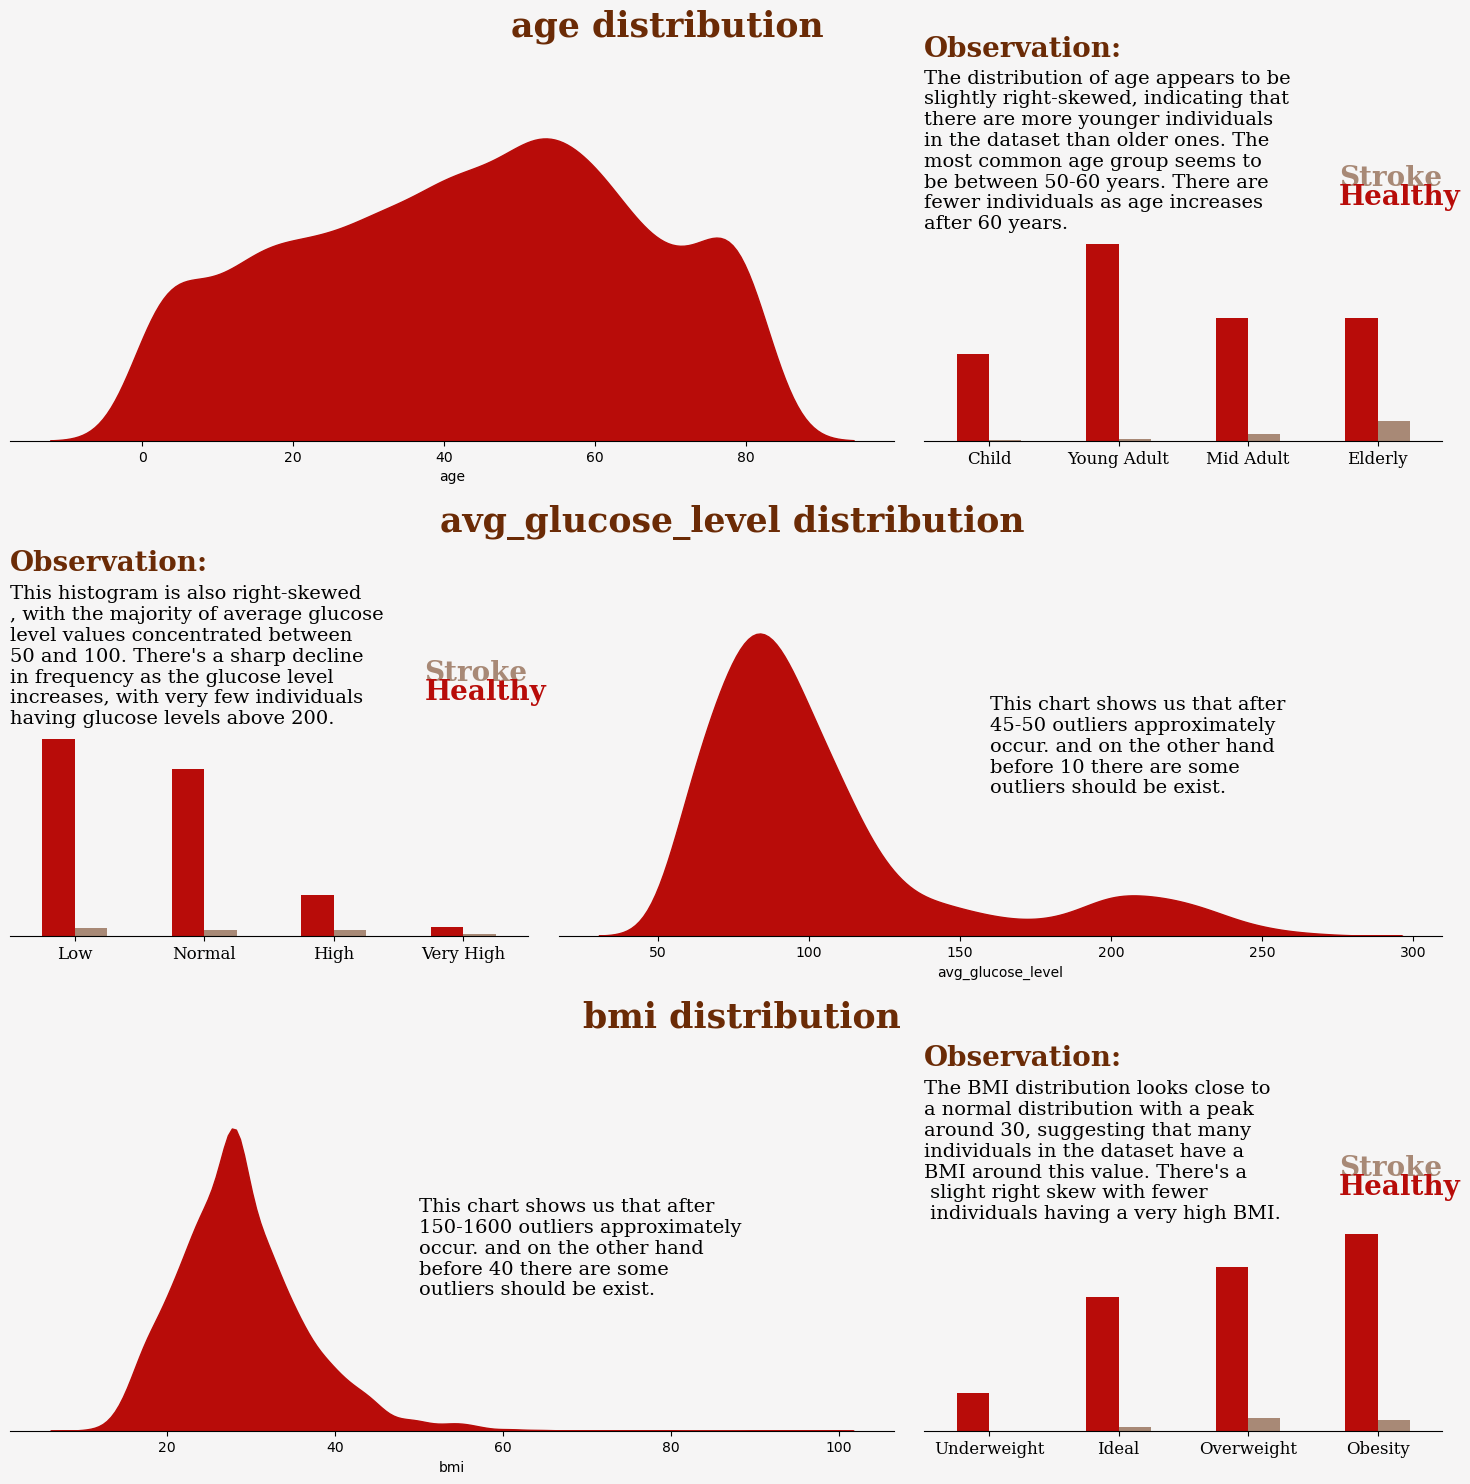

In [33]:
def processing_plot(axes, axes1):
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor('#f6f5f5')
        for loc in ['left', 'right', 'top', 'bottom']:
            ax.spines[loc].set_visible(False)
    for ax in axes1:
        ax.set_facecolor('#f6f5f5')
        ax.set_yticks([])
        ax.set_ylabel("")
        for loc in ['right', 'top', "left"]:
            ax.spines[loc].set_visible(False)

# Create the figure and subplots
fig = plt.figure(figsize=(15, 15))

gs0 = gridspec.GridSpec(3, 1, figure=fig)
new_df = df.copy()


# First set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.35, 0.75, "age distribution", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:5])
sns.kdeplot(data = df, x = 'age', shade = True,  alpha = 1, color =colors[0] )

# ax1.text(-24, 0.021, "Observation:", {'font': 'Serif', 'fontsize': '18', 'weight': 'bold', 'color': colors[1]})
# ax1.text(-24, 0.011, f"The distribution of age appears to be\nslightly right-skewed, indicating that\nthere are more younger individuals\nin the dataset than older ones. The\nmost common age group seems to \nbe between 50-60 years. There are\nfewer individuals as age increases\nafter 60 years.", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2 = fig.add_subplot(gs[1:2, 5:8])
ax2.text(0.0, 1.7, "Observation:", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[1]})
ax2.text(0.0, -0.1, f"The distribution of age appears to be\nslightly right-skewed, indicating that\nthere are more younger individuals\nin the dataset than older ones. The\nmost common age group seems to \nbe between 50-60 years. There are\nfewer individuals as age increases\nafter 60 years.", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.8, 0.35, "Stroke", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[2]})
ax2.text(0.8, 0.15, "Healthy", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[0]})
ax3 = fig.add_subplot(gs[2:, 5:8])
table = pd.crosstab(index = df_v["age_cat"], columns = df_v["stroke"])
table.plot(kind="bar", edgecolor = None, color = [colors[0], colors[2]], ax = ax3)
ax3.legend().set_visible(False)
ax3.set_xlabel("")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 0, ha = "center", **{"font": "Serif", "fontsize": 12, "weight" : "normal"})

processing_plot([ax0, ax2], [ax1, ax3])



# Second set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.3, 0.75, "avg_glucose_level distribution", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:2, 0:3])
ax1.text(0.0, 1.5, "Observation:", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[1]})
ax1.text(0.0, -0.1, f"This histogram is also right-skewed\n, with the majority of average glucose\nlevel values concentrated between\n50 and 100. There's a sharp decline\nin frequency as the glucose level\nincreases, with very few individuals\nhaving glucose levels above 200.", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax1.text(0.8, 0.35, "Stroke", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[2]})
ax1.text(0.8, 0.15, "Healthy", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[0]})
ax2 = fig.add_subplot(gs[2:, 0:3])
table = pd.crosstab(index = df_v["glucose_cat"], columns = df_v["stroke"])
table.plot(kind="bar", edgecolor = None, color = [colors[0], colors[2]], ax = ax2)
ax2.legend().set_visible(False)
ax2.set_xlabel("")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 0, ha = "center", **{"font": "Serif", "fontsize": 12, "weight" : "normal"})

ax3 = fig.add_subplot(gs[1:, 3:8])
sns.kdeplot(data = df, x = 'avg_glucose_level', shade = True,  alpha = 1, color =colors[0] )
ax3.text(160, 0.0075, f"This chart shows us that after\n45-50 outliers approximately\noccur. and on the other hand\nbefore 10 there are some\noutliers should be exist.", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
processing_plot([ax0, ax1], [ax3, ax2])




# Third set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[2])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.4, 0.75, "bmi distribution", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:5])
sns.kdeplot(data = df, x = 'bmi', shade = True,  alpha = 1, color =colors[0] )
ax1.text(50, 0.03, f"This chart shows us that after\n150-1600 outliers approximately\noccur. and on the other hand\nbefore 40 there are some\noutliers should be exist.", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2 = fig.add_subplot(gs[1:2, 5:8])
ax2.text(0.0, 1.5, "Observation:", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[1]})
ax2.text(0.0, -0.1, f"The BMI distribution looks close to\na normal distribution with a peak\naround 30, suggesting that many\nindividuals in the dataset have a\nBMI around this value. There's a\n slight right skew with fewer\n individuals having a very high BMI.", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.8, 0.35, "Stroke", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[2]})
ax2.text(0.8, 0.15, "Healthy", {'font': 'Serif', 'fontsize': '20', 'weight': 'bold', 'color': colors[0]})
ax3 = fig.add_subplot(gs[2:, 5:8])
table = pd.crosstab(index = df_v["bmi_cat"], columns = df_v["stroke"])
table.plot(kind="bar", edgecolor = None, color = [colors[0], colors[2]], ax = ax3)
ax3.legend().set_visible(False)
ax3.set_xlabel("")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 0, ha = "center", **{"font": "Serif", "fontsize": 12, "weight" : "normal"})

processing_plot([ax0, ax2], [ax1, ax3])

# Apply processing_plot function to customize subplots
processing_plot([ax0, ax2], [ax1, ax3])
fig.patch.set_facecolor('#f6f5f5')
# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
#Log Normalization
new_df = df1.copy()
new_df['age_log'] = np.log1p(df1['age'])
new_df['avg_glucose_level_log'] = np.log1p(df1['avg_glucose_level'])
new_df['bmi_log'] = np.log1p(df1['bmi'])

In [35]:
new_df1 = df1.copy()
new_df1['Age_winsorized'] = winsorize(df1['age'], limits=[0.05, 0.05])
new_df1['avg_glucose_level_winsorized'] = winsorize(df1['avg_glucose_level'], limits=[0, 0.15])
new_df1['bmi_winsorized'] = winsorize(df1['bmi'], limits=[0.05, 0.05])

In [36]:
new_df1.drop(['age', "avg_glucose_level", "bmi"], axis = 1, inplace = True)
new_df.head()

age  hypertension  heart_disease  ever_married  avg_glucose_level  \
0  1.051242             0              1             1           2.706450   
1  0.785889             0              0             1           2.121652   
2  1.626174             0              1             1          -0.004867   
3  0.255182             0              0             1           1.437473   
4  1.581949             1              0             1           1.501297   

        bmi  stroke  gender_Female  gender_Male  work_type_Govt_job  ...  \
0  1.004893       1          False         True               False  ...   
1 -0.099142       1           True        False               False  ...   
2  0.472358       1          False         True               False  ...   
3  0.719142       1           True        False               False  ...   
4 -0.631677       1           True        False               False  ...   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0               False                 False                  True   
1               False                  True                 False   
2               False                  True                 False   
3               False                 False                  True   
4               False                  True                 False   

   smoking_status_Unknown  smoking_status_formerly smoked  \
0                   False                            True   
1                   False                           False   
2                   False                           False   
3                   False                           False   
4                   False                           False   

   smoking_status_never smoked  smoking_status_smokes   age_log  \
0                        False                  False  0.718445   
1                         True                  False  0.579916   
2                         True                  False  0.965528   
3                        False                   True  0.227281   
4                         True                  False  0.948544   

   avg_glucose_level_log   bmi_log  
0               1.310075  0.695591  
1               1.138362 -0.104408  
2              -0.004879  0.386865  
3               0.890962  0.541826  
4               0.916810 -0.998795  

[5 rows x 23 columns]

In [37]:
#Solving data bias
def outliers(attr, df1):
    Q1 = df1[attr].quantile(0.25)
    Q2 = df1[attr].quantile(0.5)
    Q3 = df1[attr].quantile(0.75)
    
    IQR = Q3 - Q1 #Interquartile Range
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    return df1[(df1[attr] < lower_bound) | (df1[attr]>upper_bound)]

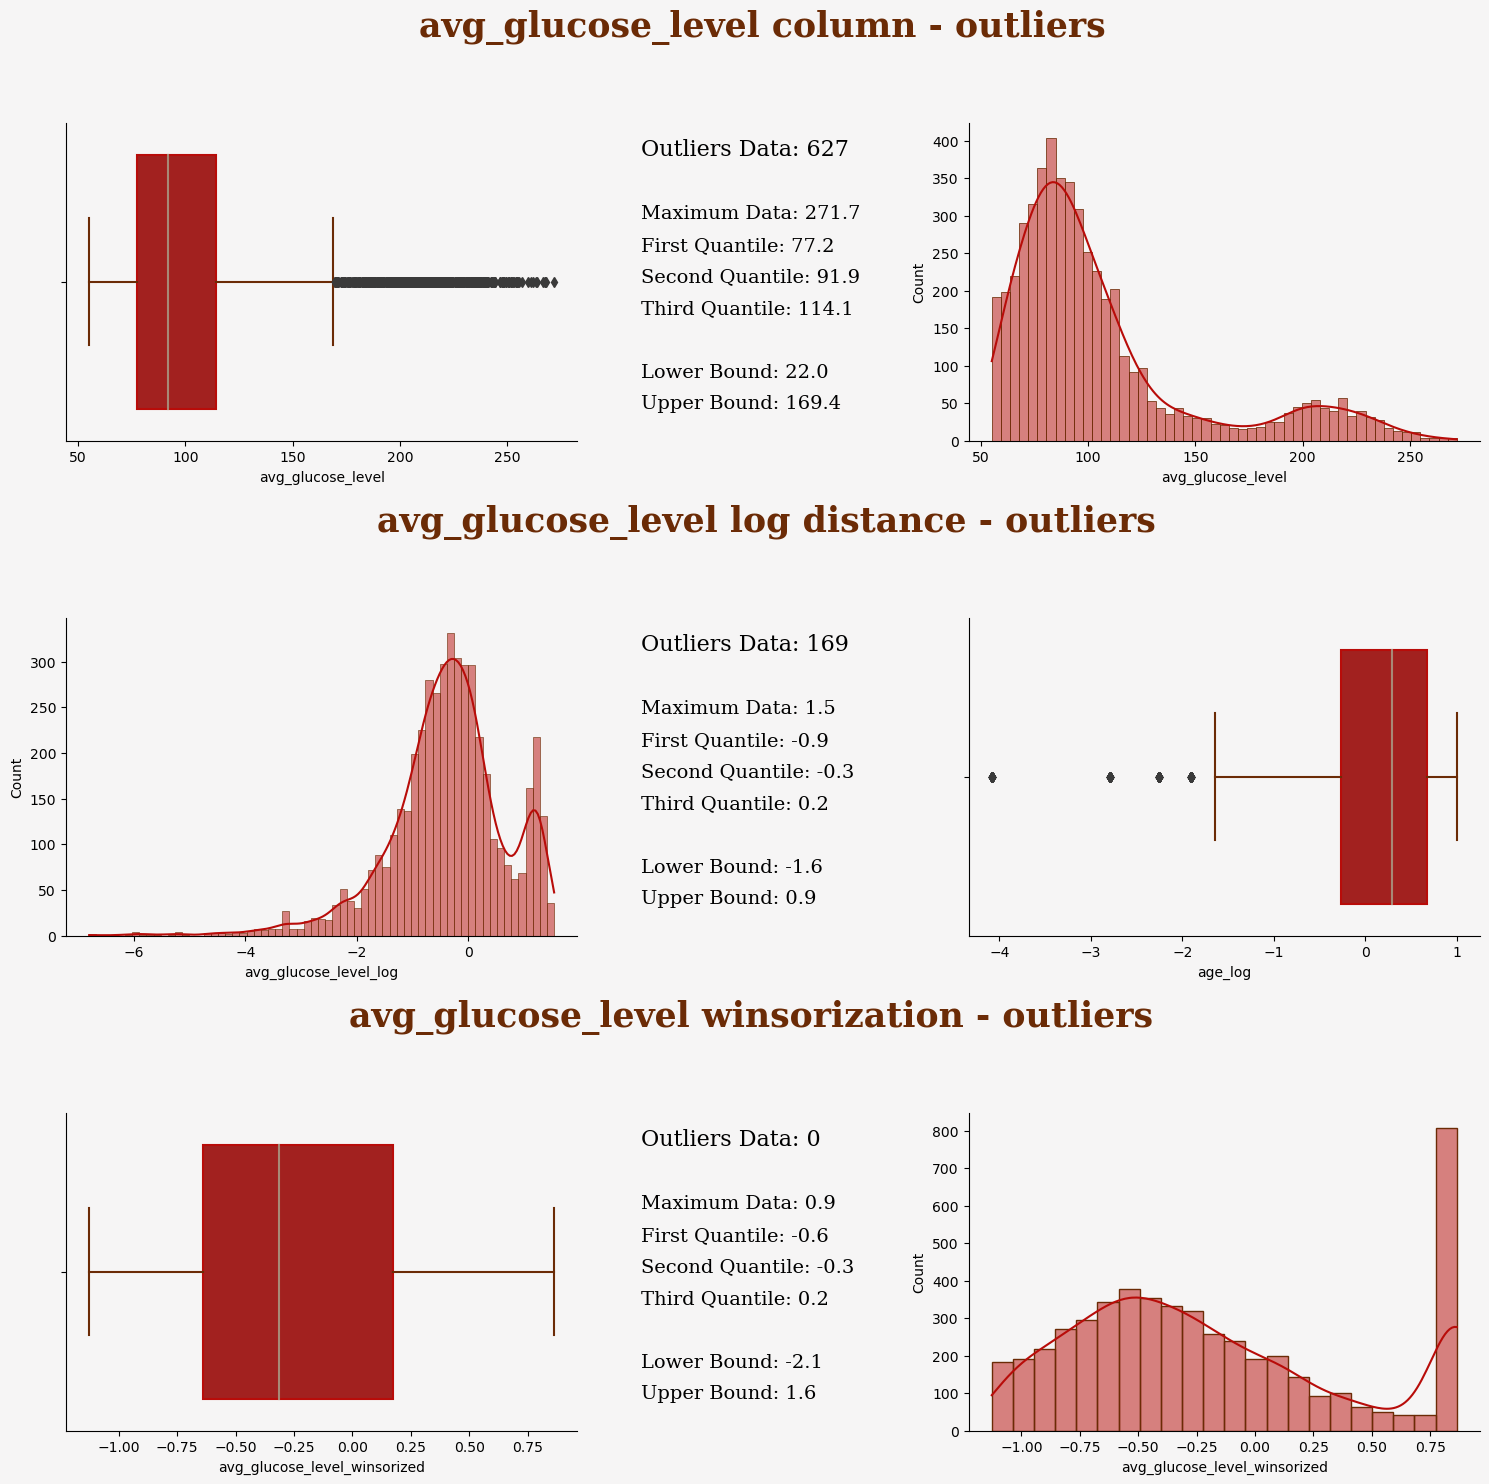

In [38]:
def processing_plot(axes, axes1):
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor('#f6f5f5')
        for loc in ['left', 'right', 'top', 'bottom']:
            ax.spines[loc].set_visible(False)
    for ax in axes1:
        ax.set_facecolor('#f6f5f5')
        for loc in ['right', 'top']:
            ax.spines[loc].set_visible(False)

# Create the figure and subplots
fig = plt.figure(figsize=(15, 15))

gs0 = gridspec.GridSpec(3, 1, figure=fig)



# First set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.25, 0.75, "avg_glucose_level column - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.boxplot(x="avg_glucose_level", data=df, ax=ax1, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('avg_glucose_level', df))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {round(df['avg_glucose_level'].max(), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {round(df.avg_glucose_level.quantile(0.25), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {round(df.avg_glucose_level.quantile(0.5), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {round(df.avg_glucose_level.quantile(0.75), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(df.avg_glucose_level.quantile(0.25) - (1.5 * (df.avg_glucose_level.quantile(0.75) - df.avg_glucose_level.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(df.avg_glucose_level.quantile(0.75) + (1.5 * (df.avg_glucose_level.quantile(0.75) - df.avg_glucose_level.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.histplot(x="avg_glucose_level", data=df, kde=True, ax=ax3, color=colors[0], 
             edgecolor=colors[1])
processing_plot([ax0, ax2], [ax1, ax3])



# Second set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.22, 0.75, "avg_glucose_level log distance - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.histplot(x="avg_glucose_level_log", data=new_df, kde=True, ax=ax1, color=colors[0], 
             edgecolor=colors[1])
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('avg_glucose_level_log', new_df))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {round(new_df['avg_glucose_level_log'].max(), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {round(new_df.avg_glucose_level_log.quantile(0.25), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {round(new_df.avg_glucose_level_log.quantile(0.5), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {round(new_df.avg_glucose_level_log.quantile(0.75), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(new_df.avg_glucose_level_log.quantile(0.25) - (1.5 * (new_df.avg_glucose_level_log.quantile(0.75) - new_df.age_log.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(new_df.avg_glucose_level_log.quantile(0.75) + (1.5 * (new_df.avg_glucose_level_log.quantile(0.75) - new_df.age_log.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.boxplot(x="age_log", data=new_df, ax=ax3, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
processing_plot([ax0, ax2], [ax1, ax3])




# Third set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[2])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.2, 0.75, "avg_glucose_level winsorization - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.boxplot(x="avg_glucose_level_winsorized", data=new_df1, ax=ax1, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('avg_glucose_level_winsorized', new_df1))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {round(new_df1['avg_glucose_level_winsorized'].max(), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {round(new_df1.avg_glucose_level_winsorized.quantile(0.25), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {round(new_df1.avg_glucose_level_winsorized.quantile(0.5), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {round(new_df1.avg_glucose_level_winsorized.quantile(0.75), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(new_df1.avg_glucose_level_winsorized.quantile(0.25) - (1.5 * (new_df1.avg_glucose_level_winsorized.quantile(0.75) - new_df1.Age_winsorized.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(new_df1.avg_glucose_level_winsorized.quantile(0.75) + (1.5 * (new_df1.avg_glucose_level_winsorized.quantile(0.75) - new_df1.Age_winsorized.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.histplot(x="avg_glucose_level_winsorized", data=new_df1, kde=True, ax=ax3, color=colors[0], 
             edgecolor=colors[1])

# Apply processing_plot function to customize subplots
processing_plot([ax0, ax2], [ax1, ax3])
fig.patch.set_facecolor('#f6f5f5')
# Adjust layout
plt.tight_layout()
plt.show()


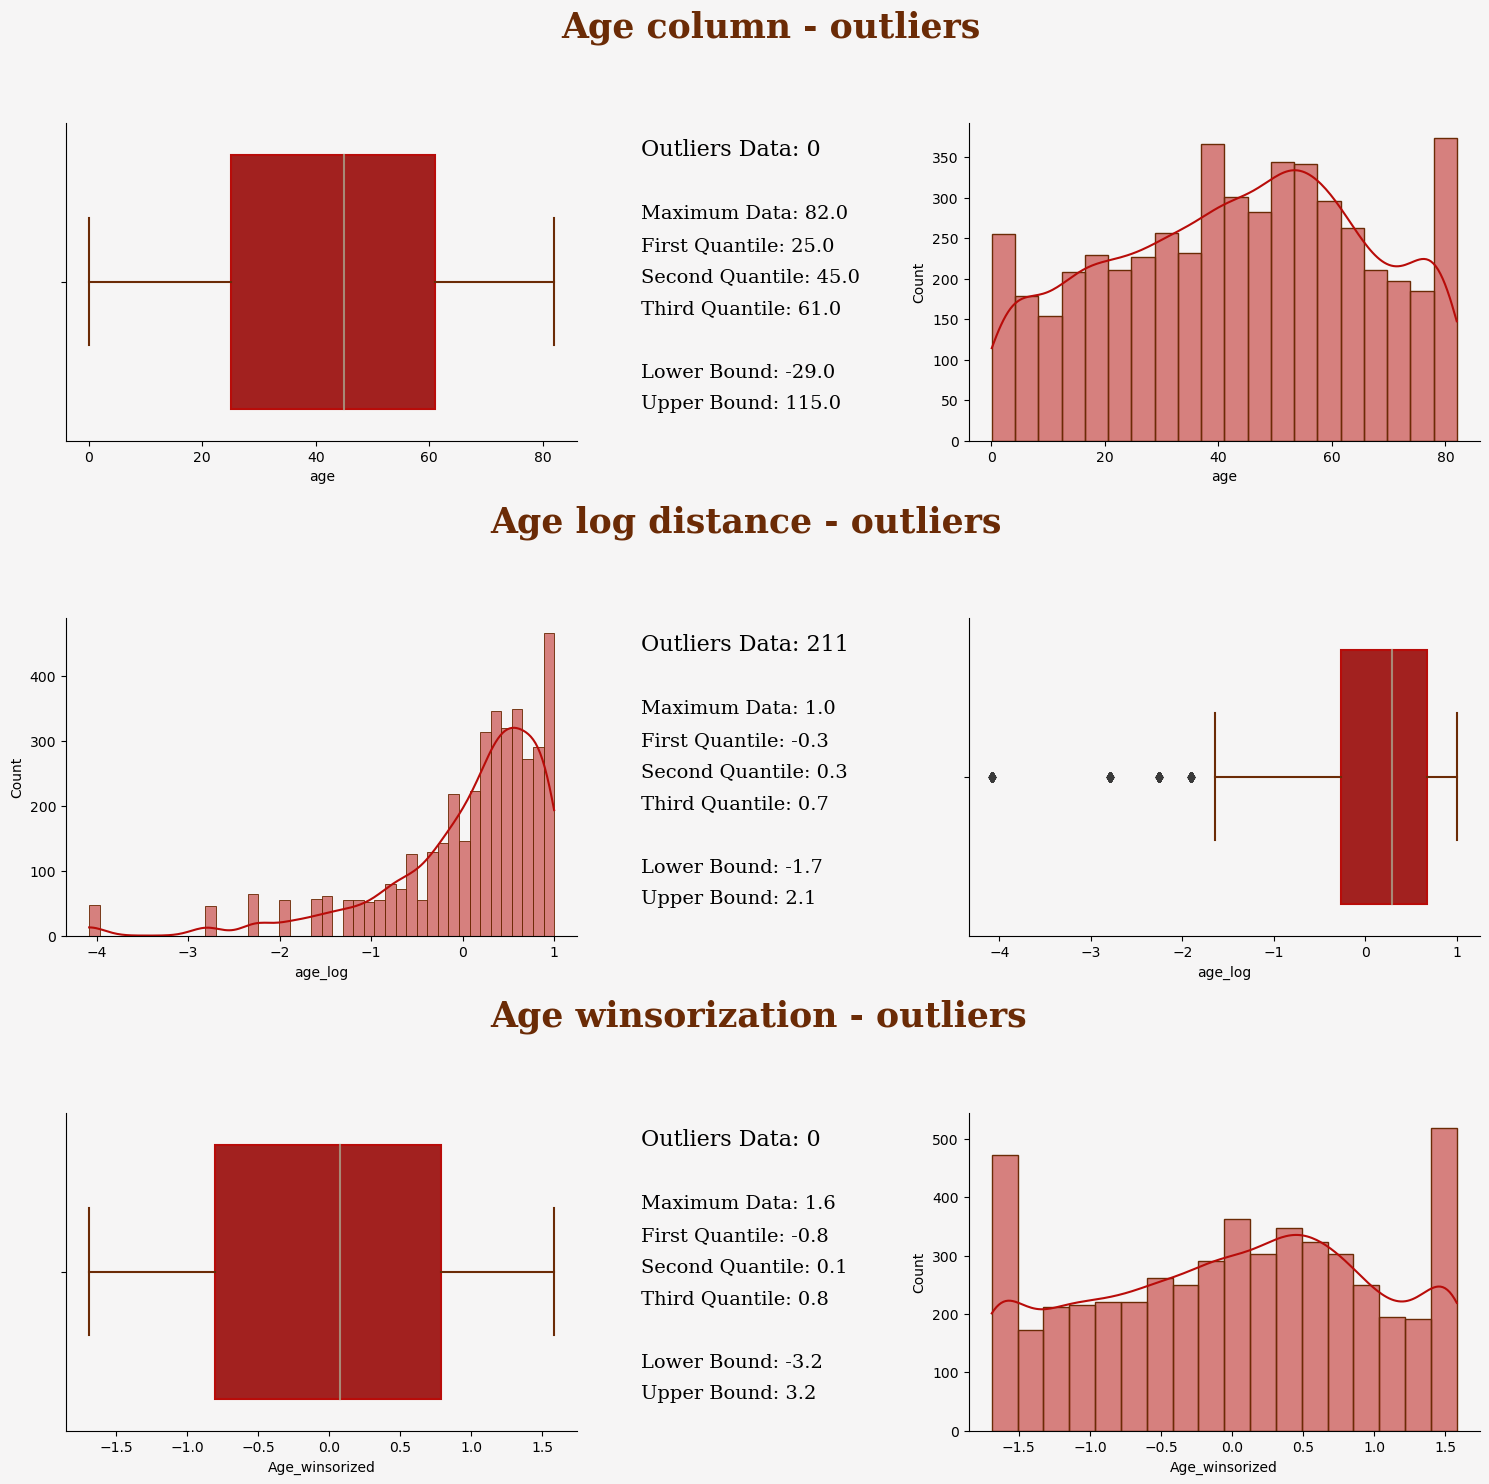

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process and customize each subplot
def processing_plot(axes, axes1):
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor('#f6f5f5')
        for loc in ['left', 'right', 'top', 'bottom']:
            ax.spines[loc].set_visible(False)
    for ax in axes1:
        ax.set_facecolor('#f6f5f5')
        for loc in ['right', 'top']:
            ax.spines[loc].set_visible(False)

# Create the figure and subplots
fig = plt.figure(figsize=(15, 15))

gs0 = gridspec.GridSpec(3, 1, figure=fig)



# First set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.35, 0.75, "Age column - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.boxplot(x="age", data=df, ax=ax1, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('age', df))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {df['age'].max()}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {df.age.quantile(0.25)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {df.age.quantile(0.5)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {df.age.quantile(0.75)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {df.age.quantile(0.25) - (1.5 * (df.age.quantile(0.75) - df.age.quantile(0.25)))}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {df.age.quantile(0.75) + (1.5 * (df.age.quantile(0.75) - df.age.quantile(0.25)))}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.histplot(x="age", data=df, kde=True, ax=ax3, color=colors[0], 
             edgecolor=colors[1])
processing_plot([ax0, ax2], [ax1, ax3])



# Second set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.3, 0.75, "Age log distance - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.histplot(x="age_log", data=new_df, kde=True, ax=ax1, color=colors[0], 
             edgecolor=colors[1])
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('age_log', new_df))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {round(new_df['age_log'].max(), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {round(new_df.age_log.quantile(0.25), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {round(new_df.age_log.quantile(0.5), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {round(new_df.age_log.quantile(0.75), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(new_df.age_log.quantile(0.25) - (1.5 * (new_df.age_log.quantile(0.75) - new_df.age_log.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(new_df.age_log.quantile(0.75) + (1.5 * (new_df.age_log.quantile(0.75) - new_df.age_log.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.boxplot(x="age_log", data=new_df, ax=ax3, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
processing_plot([ax0, ax2], [ax1, ax3])




# Third set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[2])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.3, 0.75, "Age winsorization - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.boxplot(x="Age_winsorized", data=new_df1, ax=ax1, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('Age_winsorized', new_df1))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {round(new_df1['Age_winsorized'].max(), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {round(new_df1.Age_winsorized.quantile(0.25), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {round(new_df1.Age_winsorized.quantile(0.5), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {round(new_df1.Age_winsorized.quantile(0.75), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(new_df1.Age_winsorized.quantile(0.25) - (1.5 * (new_df1.Age_winsorized.quantile(0.75) - new_df1.Age_winsorized.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(new_df1.Age_winsorized.quantile(0.75) + (1.5 * (new_df1.Age_winsorized.quantile(0.75) - new_df1.Age_winsorized.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.histplot(x="Age_winsorized", data=new_df1, kde=True, ax=ax3, color=colors[0], 
             edgecolor=colors[1])

# Apply processing_plot function to customize subplots
processing_plot([ax0, ax2], [ax1, ax3])
fig.patch.set_facecolor('#f6f5f5')
# Adjust layout
plt.tight_layout()
plt.show()


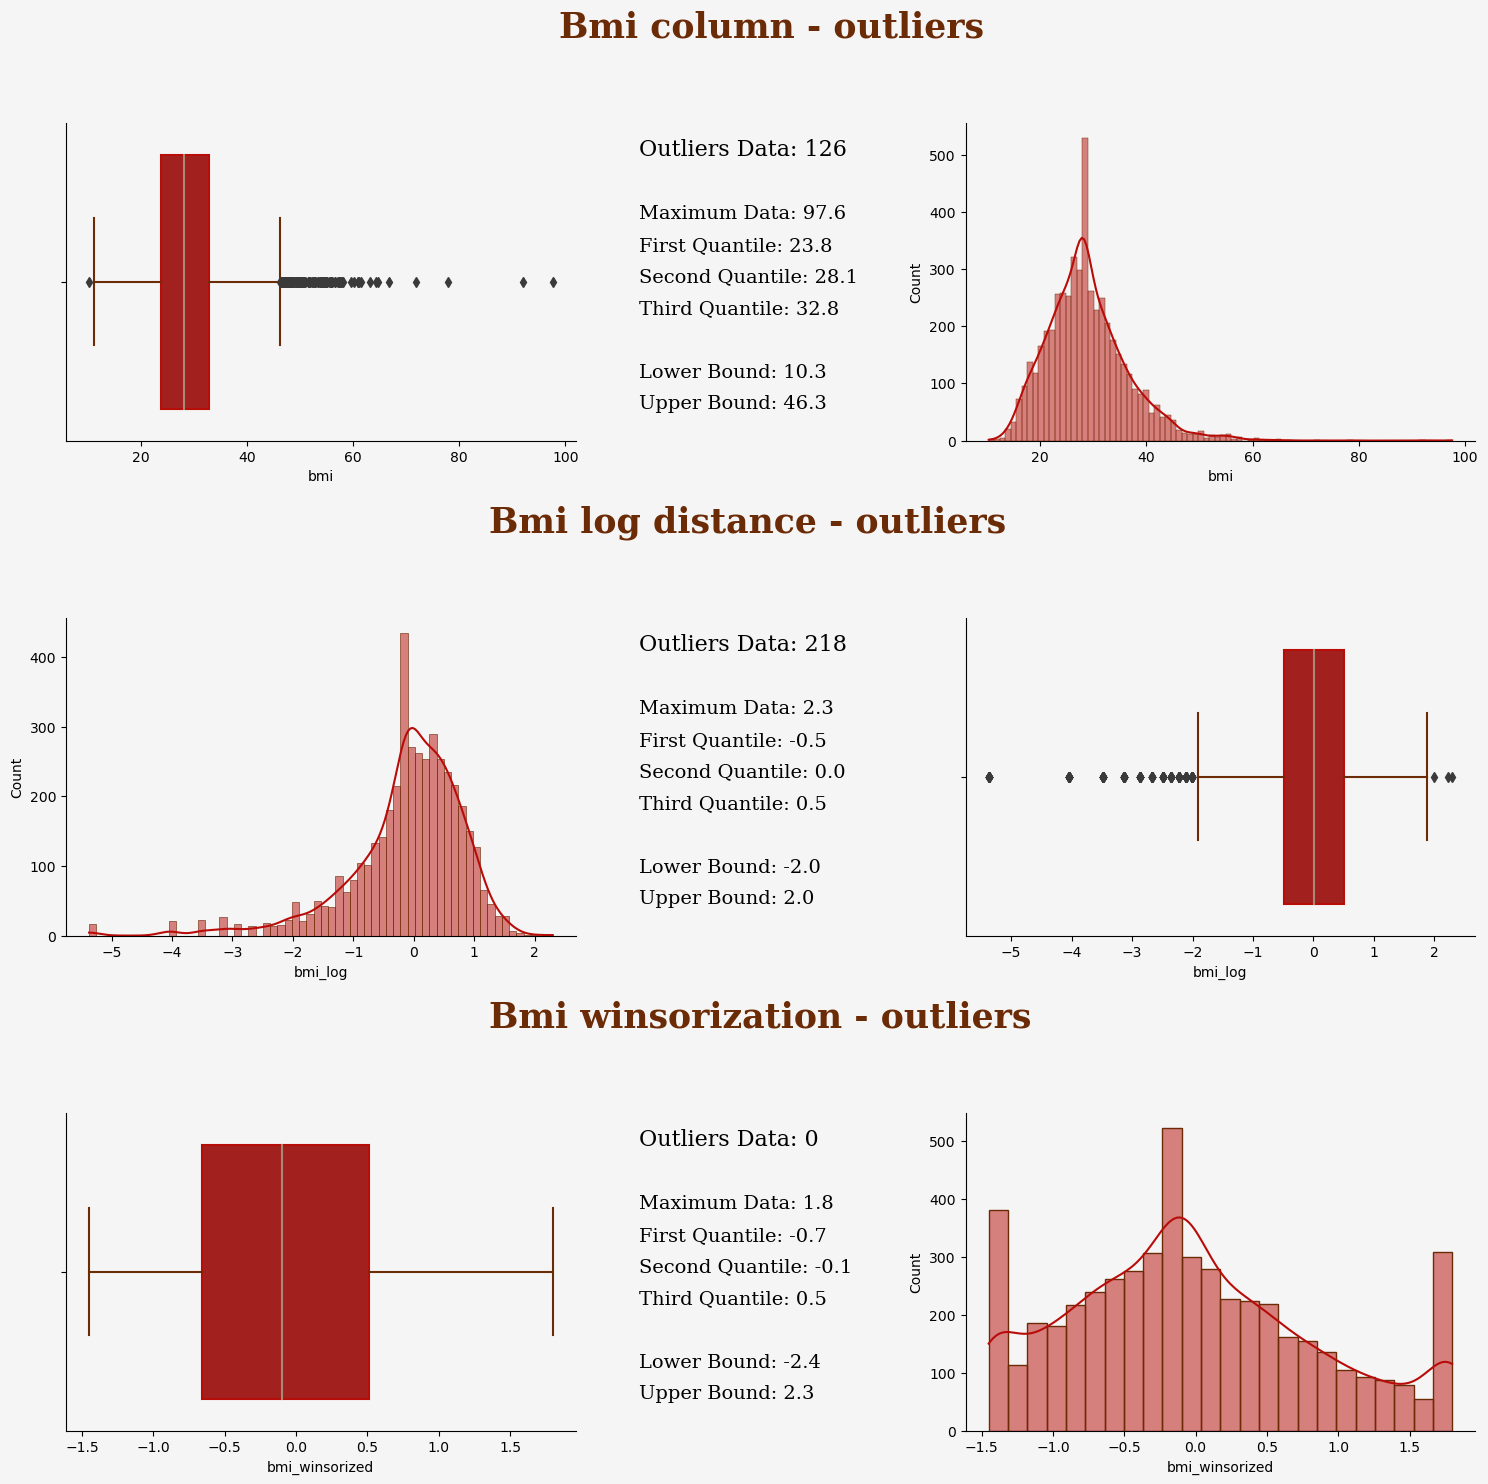

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to process and customize each subplot
def processing_plot(axes, axes1):
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_facecolor('#f6f5f5')
        for loc in ['left', 'right', 'top', 'bottom']:
            ax.spines[loc].set_visible(False)
    for ax in axes1:
        ax.set_facecolor('#f6f5f5')
        for loc in ['right', 'top']:
            ax.spines[loc].set_visible(False)

# Create the figure and subplots
fig = plt.figure(figsize=(15, 15))

gs0 = gridspec.GridSpec(3, 1, figure=fig)



# First set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.35, 0.75, "Bmi column - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.boxplot(x="bmi", data=df, ax=ax1, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('bmi', df))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {df['bmi'].max()}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {df.bmi.quantile(0.25)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {df.bmi.quantile(0.5)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {df.bmi.quantile(0.75)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(df.bmi.quantile(0.25) - (1.5 * (df.bmi.quantile(0.75) - df.bmi.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(df.bmi.quantile(0.75) + (1.5 * (df.bmi.quantile(0.75) - df.bmi.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.histplot(x="bmi", data=df, kde=True, ax=ax3, color=colors[0], 
             edgecolor=colors[1])
processing_plot([ax0, ax2], [ax1, ax3])



# Second set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.3, 0.75, "Bmi log distance - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.histplot(x="bmi_log", data=new_df, kde=True, ax=ax1, color=colors[0], 
             edgecolor=colors[1])
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('bmi_log', new_df))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {round(new_df['bmi_log'].max(), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {round(new_df.bmi_log.quantile(0.25), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {round(new_df.bmi_log.quantile(0.5), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {round(new_df.bmi_log.quantile(0.75), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(new_df.bmi_log.quantile(0.25) - (1.5 * (new_df.bmi_log.quantile(0.75) - new_df.bmi_log.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(new_df.bmi_log.quantile(0.75) + (1.5 * (new_df.bmi_log.quantile(0.75) - new_df.bmi_log.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.boxplot(x="bmi_log", data=new_df, ax=ax3, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
processing_plot([ax0, ax2], [ax1, ax3])




# Third set of subplots
gs = gridspec.GridSpecFromSubplotSpec(4, 8, subplot_spec=gs0[2])
ax0 = fig.add_subplot(gs[0, :])
ax0.text(0.3, 0.75, "Bmi winsorization - outliers", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': colors[1]})
ax1 = fig.add_subplot(gs[1:, 0:3])
sns.boxplot(x="bmi_winsorized", data=new_df1, ax=ax1, color=colors[0],
            boxprops=dict(edgecolor=colors[0]),  # Customize box border color
            whiskerprops=dict(color=colors[1]),  # Customize whisker color
            capprops=dict(color=colors[1]),  # Customize cap color
            medianprops=dict(color=colors[2]))
ax2 = fig.add_subplot(gs[1:, 3:5])
ax2.text(0.1, 0.9, f"Outliers Data: {len(outliers('bmi_winsorized', new_df1))}", {"font": "Serif", "fontsize" : "16", "weight": "normal"})
ax2.text(0.1, 0.7, f"Maximum Data: {round(new_df1['bmi_winsorized'].max(), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.6, f"First Quantile: {round(new_df1.bmi_winsorized.quantile(0.25), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.5, f"Second Quantile: {round(new_df1.bmi_winsorized.quantile(0.5), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.4, f"Third Quantile: {round(new_df1.bmi_winsorized.quantile(0.75), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.2, f"Lower Bound: {round(new_df1.bmi_winsorized.quantile(0.25) - (1.5 * (new_df1.bmi_winsorized.quantile(0.75) - new_df1.bmi_winsorized.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax2.text(0.1, 0.1, f"Upper Bound: {round(new_df1.bmi_winsorized.quantile(0.75) + (1.5 * (new_df1.bmi_winsorized.quantile(0.75) - new_df1.bmi_winsorized.quantile(0.25))), 1)}", {"font": "Serif", "fontsize" : "14", "weight": "normal"})
ax3 = fig.add_subplot(gs[1:, 5:8])
sns.histplot(x="bmi_winsorized", data=new_df1, kde=True, ax=ax3, color=colors[0], 
             edgecolor=colors[1])

# Apply processing_plot function to customize subplots
processing_plot([ax0, ax2], [ax1, ax3])
fig.patch.set_facecolor('#f6f5f5')
# Adjust layout
plt.tight_layout()
plt.show()


In [41]:
#distribution draw
from pywaffle import Waffle

In [42]:
df_v.age_cat.unique()

['Elderly', 'Mid Adult', 'Young Adult', 'Child']
Categories (4, object): ['Child' < 'Young Adult' < 'Mid Adult' < 'Elderly']

In [43]:
df.head()

gender   age  hypertension  heart_disease  ever_married      work_type  \
0    Male  67.0             0              1             1        Private   
1  Female  61.0             0              0             1  Self-employed   
2    Male  80.0             0              1             1        Private   
3  Female  49.0             0              0             1        Private   
4  Female  79.0             1              0             1  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             202.21  28.1     never smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1

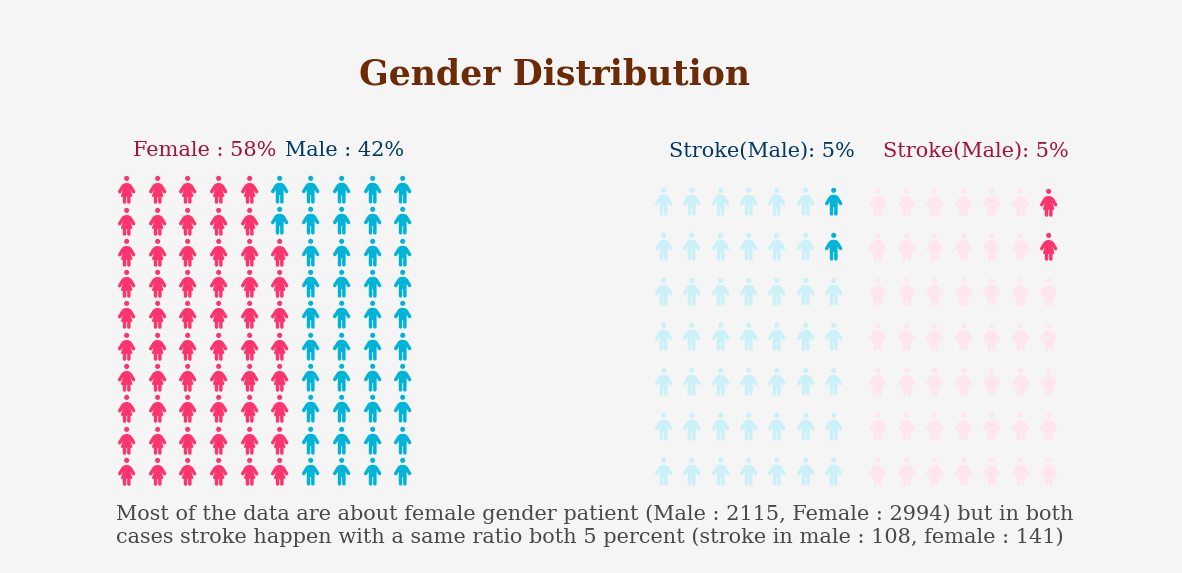

In [44]:
female = df1[df1['gender_Female'] == 1]
male = df1[df1['gender_Male'] == 1]

male_stroke = male[male["stroke"] == 1]
female_stroke = female[female["stroke"] == 1]

female_num = int(len(female) / (len(female) + len(male))*100)
male_num = 100 - female_num

male_stroke_num = int((len(male_stroke) / len(male))*100)
female_stroke_num = int((len(female_stroke) / len(female))*100)

fig = plt.figure(figsize=(15, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(8, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.3,0.5, f"Gender Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':colors[1]})
ax1 = fig.add_subplot(gs[2:6, 1:4])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[female_num, male_num],
    colors=["#fe346e", "#00b4d8"],
    icons=["female", "male"],
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax1.text(0.05, 1.05, f"Female : {female_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#a4133c"})
ax1.text(0.55, 1.05, f"Male : {male_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#013a63"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - male_stroke_num, male_stroke_num],
    colors=["#caf0f8", "#00b4d8"],
    icons="male",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.075, 1.05, f"Stroke(Male): {male_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#013a63"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - female_stroke_num, female_stroke_num],
    colors=["#ffe5ec", "#fe346e"],
    icons="female",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke(Male): {male_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#a4133c"})
ax4 = fig.add_subplot(gs[6:7, 0:10])
ax4.text(0.1, 0.3, f"Most of the data are about female gender patient (Male : {len(male)}, Female : {len(female)}) but in both\ncases stroke happen with a same ratio both 5 percent (stroke in male : {len(male_stroke)}, female : {len(female_stroke)})", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')
axes = [ax0, ax1, ax2, ax3, ax4]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        


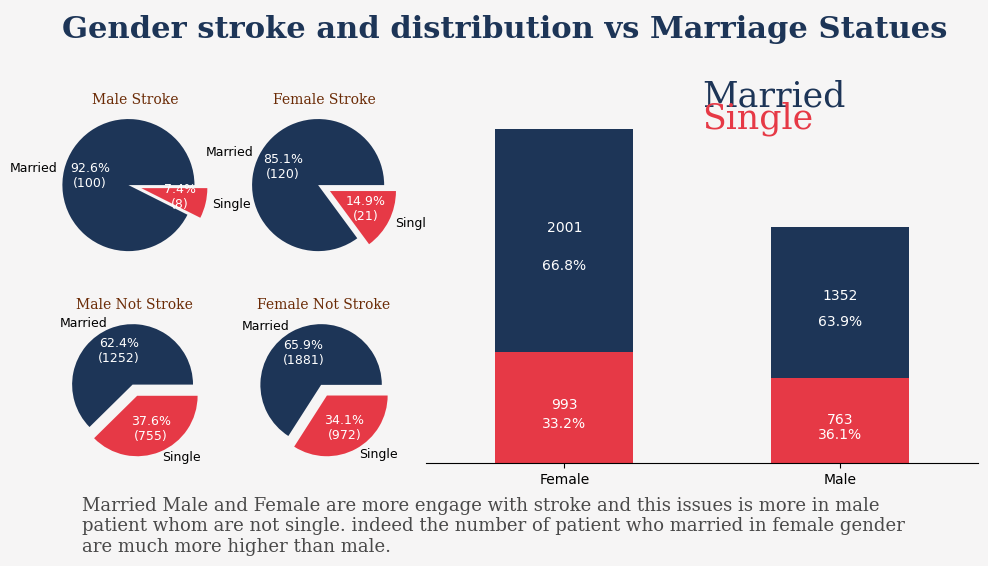

In [45]:
fig = plt.figure(figsize=(12, 20))
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct/100.0*total))
        return '{:.1f}%\n({:d})'.format(pct,count)
    return my_format        
stroke = df1[df1["stroke"] == 1]
healthy = df1[df1["stroke"] == 0]

male_stroke = stroke[stroke["gender_Male"] == 1]
male_healthy = healthy[healthy["gender_Male"] == 1]
female_stroke = stroke[stroke["gender_Female"] == 1]
female_healthy = healthy[healthy["gender_Female"] == 1]

gs = gridspec.GridSpecFromSubplotSpec(9,10, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.015, 0.7, "Gender stroke and distribution vs Marriage Statues",{'font': 'Serif', 'fontsize': '22','weight':'bold', 'color':"#1d3557"})
ax1 = fig.add_subplot(gs[2:5, 0:2])
plt.pie(male_stroke["ever_married"].value_counts(), colors = ["#1d3557", "#e63946"], labels = ["Married", "Single"], explode = (0, 0.2), autopct=autopct_format(male_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Male Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax1.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax2 = fig.add_subplot(gs[6:9, 0:2])
plt.pie(male_healthy["ever_married"].value_counts(), colors = ["#1d3557", "#e63946"], labels = ["Married", "Single"], explode = (0, 0.2),  autopct=autopct_format(male_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Male Not Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax2.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax3 = fig.add_subplot(gs[2:5, 2:4])
plt.pie(female_stroke["ever_married"].value_counts(), colors= ["#1d3557", "#e63946"], labels = ["Married", "Single"], explode = (0, 0.2),  autopct=autopct_format(female_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Female Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax3.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[6:9, 2:4])
plt.pie(female_healthy["ever_married"].value_counts(), colors = ["#1d3557", "#e63946"], labels = ["Married", "Single"], explode = (0, 0.2),  autopct=autopct_format(female_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Female Not Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax4.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[2:, 4:])
table = pd.crosstab(index = df["gender"], columns = df["ever_married"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#e63946", "#1d3557"], ax = ax4, legend=False)
ax4.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax4.set_facecolor('#f6f5f5')
ax4.set_yticks([])
ax4.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        ax4.text(i, (sum(row[:j]) + value / 1.7), f"{value}", ha="center", va="top", color="white")
        percentage = value / total * 100
        ax4.text(i, (sum(row[:j]) + value / 2.4), f"{percentage:.1f}%", ha="center", va="top", color="white")

ax4.text(0.5, 3200, "Married", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax4.text(0.5, 3000, "Single", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#e63946"})
for loc in ['right', 'top', "left"]:
    ax4.spines[loc].set_visible(False)
ax4.text(-1.75, -800, "Married Male and Female are more engage with stroke and this issues is more in male\npatient whom are not single. indeed the number of patient who married in female gender\nare much more higher than male.", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
# ax5 = fig.add_subplot(gs[10:, :])
# ax5.set_facecolor('None')
axes = [ax0, ax1, ax2, ax3]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)


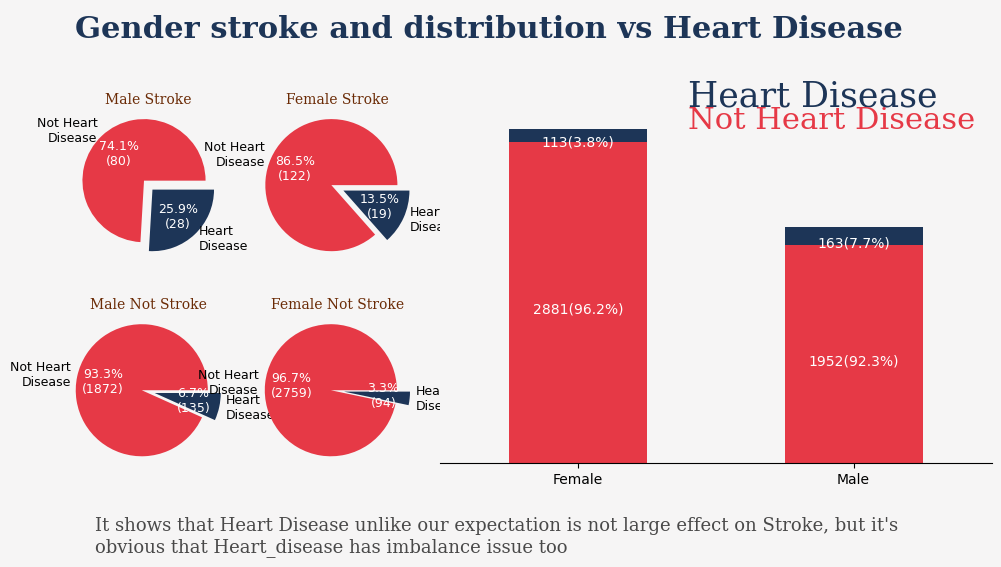

In [46]:
fig = plt.figure(figsize=(12, 20))
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct/100.0*total))
        return '{:.1f}%\n({:d})'.format(pct,count)
    return my_format        
stroke = df1[df1["stroke"] == 1]
healthy = df1[df1["stroke"] == 0]

male_stroke = stroke[stroke["gender_Male"] == 1]
male_healthy = healthy[healthy["gender_Male"] == 1]
female_stroke = stroke[stroke["gender_Female"] == 1]
female_healthy = healthy[healthy["gender_Female"] == 1]

gs = gridspec.GridSpecFromSubplotSpec(9,10, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.015, 0.7, "Gender stroke and distribution vs Heart Disease",{'font': 'Serif', 'fontsize': '22','weight':'bold', 'color':"#1d3557"})
ax1 = fig.add_subplot(gs[2:5, 0:2])
plt.pie(male_stroke["heart_disease"].value_counts(), colors = ["#e63946", "#1d3557"], labels = ["Not Heart\nDisease", "Heart\nDisease"], explode = (0, 0.2), autopct=autopct_format(male_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Male Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax1.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax2 = fig.add_subplot(gs[6:9, 0:2])
plt.pie(male_healthy["heart_disease"].value_counts(), colors = ["#e63946", "#1d3557"], labels = ["Not Heart\nDisease", "Heart\nDisease"], explode = (0, 0.2),  autopct=autopct_format(male_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Male Not Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax2.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax3 = fig.add_subplot(gs[2:5, 2:4])
plt.pie(female_stroke["heart_disease"].value_counts(), colors= ["#e63946", "#1d3557"], labels = ["Not Heart\nDisease", "Heart\nDisease"], explode = (0, 0.2),  autopct=autopct_format(female_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Female Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax3.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[6:9, 2:4])
plt.pie(female_healthy["heart_disease"].value_counts(), colors = ["#e63946", "#1d3557"], labels = ["Not Heart\nDisease", "Heart\nDisease"], explode = (0, 0.2),  autopct=autopct_format(female_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Female Not Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax4.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[2:, 4:])
table = pd.crosstab(index = df["gender"], columns = df["heart_disease"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#e63946", "#1d3557"], ax = ax4, legend=False)
ax4.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax4.set_facecolor('#f6f5f5')
ax4.set_yticks([])
ax4.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax4.text(i, (sum(row[:j]) + value / 2), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax4.text(0.4, 3200, "Heart Disease", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax4.text(0.4, 3000, "Not Heart Disease", {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#e63946"})
for loc in ['right', 'top', "left"]:
    ax4.spines[loc].set_visible(False)
ax4.text(-1.75, -800, "It shows that Heart Disease unlike our expectation is not large effect on Stroke, but it's\nobvious that Heart_disease has imbalance issue too", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
# ax5 = fig.add_subplot(gs[10:, :])
# ax5.set_facecolor('None')
axes = [ax0, ax1, ax2, ax3]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)


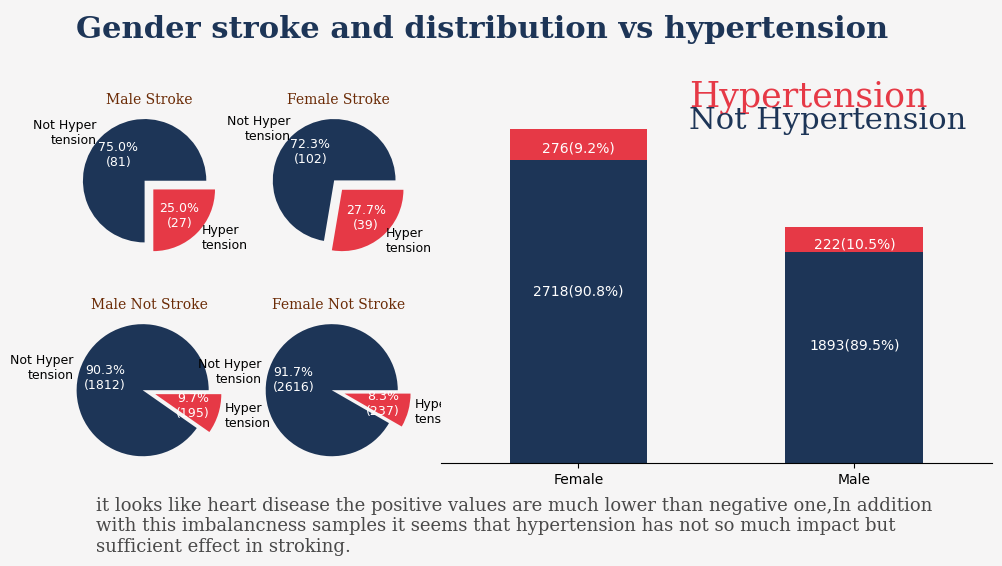

In [47]:

fig = plt.figure(figsize=(12, 20))
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct/100.0*total))
        return '{:.1f}%\n({:d})'.format(pct,count)
    return my_format        
stroke = df1[df1["stroke"] == 1]
healthy = df1[df1["stroke"] == 0]

male_stroke = stroke[stroke["gender_Male"] == 1]
male_healthy = healthy[healthy["gender_Male"] == 1]
female_stroke = stroke[stroke["gender_Female"] == 1]
female_healthy = healthy[healthy["gender_Female"] == 1]
labels = ["Not Hyper\ntension", "Hyper\ntension"]
gs = gridspec.GridSpecFromSubplotSpec(9,10, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.015, 0.7, "Gender stroke and distribution vs hypertension",{'font': 'Serif', 'fontsize': '22','weight':'bold', 'color':"#1d3557"})
ax1 = fig.add_subplot(gs[2:5, 0:2])
plt.pie(male_stroke["hypertension"].value_counts(), colors = ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2), autopct=autopct_format(male_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Male Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax1.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax2 = fig.add_subplot(gs[6:9, 0:2])
plt.pie(male_healthy["hypertension"].value_counts(), colors = ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2),  autopct=autopct_format(male_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Male Not Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax2.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax3 = fig.add_subplot(gs[2:5, 2:4])
plt.pie(female_stroke["hypertension"].value_counts(), colors= ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2),  autopct=autopct_format(female_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Female Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax3.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[6:9, 2:4])
plt.pie(female_healthy["hypertension"].value_counts(), colors = ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2),  autopct=autopct_format(female_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Female Not Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax4.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[2:, 4:])
table = pd.crosstab(index = df["gender"], columns = df["hypertension"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946"], ax = ax4, legend=False)
ax4.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax4.set_facecolor('#f6f5f5')
ax4.set_yticks([])
ax4.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax4.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax4.text(0.4, 3200, "Hypertension", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#e63946"})
ax4.text(0.4, 3000, "Not Hypertension", {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#1d3557"})
for loc in ['right', 'top', "left"]:
    ax4.spines[loc].set_visible(False)
ax4.text(-1.75, -800, "it looks like heart disease the positive values are much lower than negative one,In addition\nwith this imbalancness samples it seems that hypertension has not so much impact but\nsufficient effect in stroking.", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
# ax5 = fig.add_subplot(gs[10:, :])
# ax5.set_facecolor('None')
axes = [ax0, ax1, ax2, ax3]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)


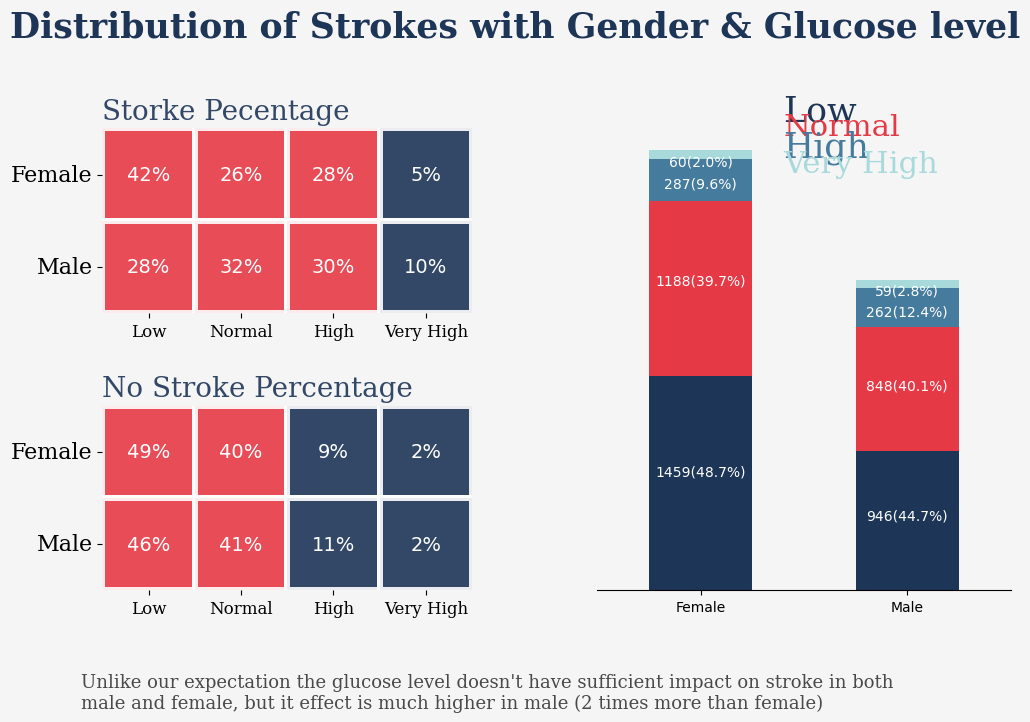

In [48]:
import matplotlib
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df_v[df_v['stroke']==0]
stroke = df_v[df_v['stroke']==1]

gender_order = ['Female','Male']
glucose_order = ['Low', 'Normal', 'High', 'Very High']


col1 = ["#1d3557","#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#1d3557","#e63946"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['glucose_cat']],normalize='index').loc[gender_order,glucose_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['glucose_cat']], normalize='index').loc[gender_order,glucose_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(-1, -1., 'Distribution of Strokes with Gender & Glucose level', {'font':'Serif', 'color':'#1d3557', 'weight':'bold','size':25})
ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#1d3557", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#1d3557", 'size':20}, alpha =0.9)

ax0.set_xticklabels(glucose_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax1.set_xticklabels(glucose_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax0.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
ax1.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
table = pd.crosstab(index = df["gender"], columns = df_v["glucose_cat"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946", "#457b9d", "#A8DADC"], ax = ax2, legend=False)
ax2.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')
ax2.set_yticks([])
ax2.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax2.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax2.text(0.4, 3200, "Low", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax2.text(0.4, 3100, "Normal", {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#e63946"})
ax2.text(0.4, 2950, "High", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#457b9d"})
ax2.text(0.4, 2850, "Very High", {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#A8DADC"})
ax2.text(-3, -800, "Unlike our expectation the glucose level doesn't have sufficient impact on stroke in both\nmale and female, but it effect is much higher in male (2 times more than female)", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)

for loc in ['right', 'top', "left"]:
    ax2.spines[loc].set_visible(False)

for loc in ['right', 'top',"left"]:
    ax2.spines[loc].set_visible(False)
ax2.set_facecolor("#f6f5f5")
ax2.set_yticks([])
axes = [ax0, ax1]
for ix, ax in enumerate(axes):
    ax.set_xlabel("") # to remove x ticks
    ax.set_ylabel("") # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)

fig.show()

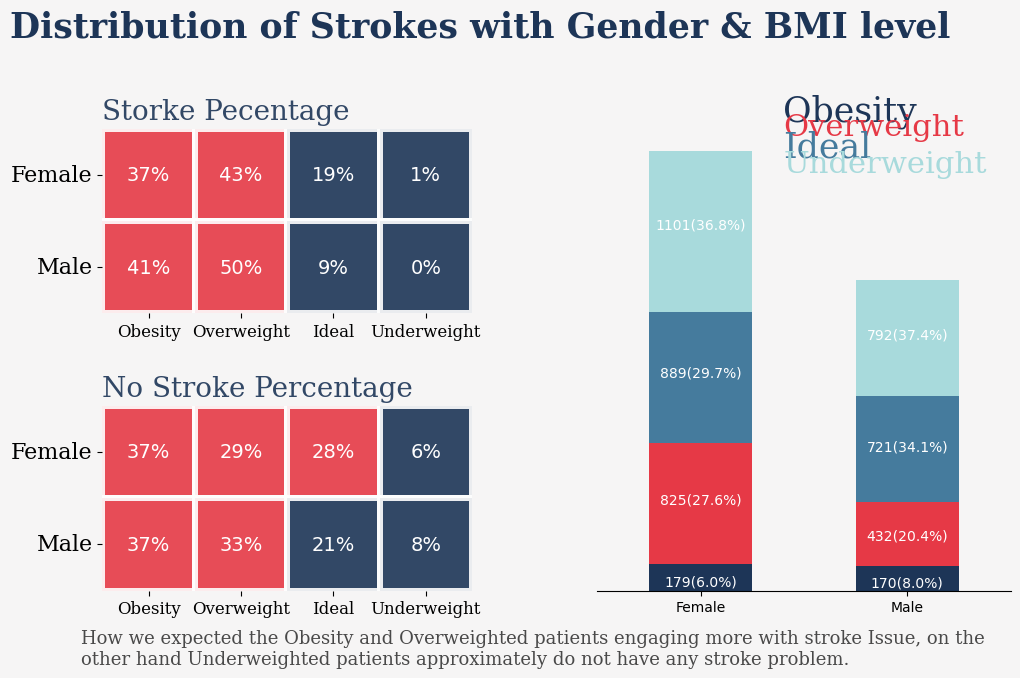

In [49]:
import matplotlib
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df_v[df_v['stroke']==0]
stroke = df_v[df_v['stroke']==1]

gender_order = ['Female','Male']
bmi_order = ['Obesity', 'Overweight', 'Ideal', 'Underweight']


col1 = ["#1d3557","#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#1d3557","#e63946"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['bmi_cat']],normalize='index').loc[gender_order,bmi_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['bmi_cat']], normalize='index').loc[gender_order,bmi_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(-1, -1., 'Distribution of Strokes with Gender & BMI level', {'font':'Serif', 'color':'#1d3557', 'weight':'bold','size':25})
ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#1d3557", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#1d3557", 'size':20}, alpha =0.9)

ax0.set_xticklabels(bmi_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax1.set_xticklabels(bmi_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax0.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
ax1.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
table = pd.crosstab(index = df["gender"], columns = df_v["bmi_cat"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946", "#457b9d", "#A8DADC"], ax = ax2, legend=False)
ax2.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')
ax2.set_yticks([])
ax2.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax2.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax2.text(0.4, 3200, bmi_order[0], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax2.text(0.4, 3100, bmi_order[1], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#e63946"})
ax2.text(0.4, 2950, bmi_order[2], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#457b9d"})
ax2.text(0.4, 2850, bmi_order[3], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#A8DADC"})
ax2.text(-3, -500, "How we expected the Obesity and Overweighted patients engaging more with stroke Issue, on the\nother hand Underweighted patients approximately do not have any stroke problem.", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)

for loc in ['right', 'top', "left"]:
    ax2.spines[loc].set_visible(False)

for loc in ['right', 'top',"left"]:
    ax2.spines[loc].set_visible(False)
ax2.set_facecolor("#f6f5f5")
ax2.set_yticks([])
axes = [ax0, ax1]
for ix, ax in enumerate(axes):
    ax.set_xlabel("") # to remove x ticks
    ax.set_ylabel("") # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)

fig.show()

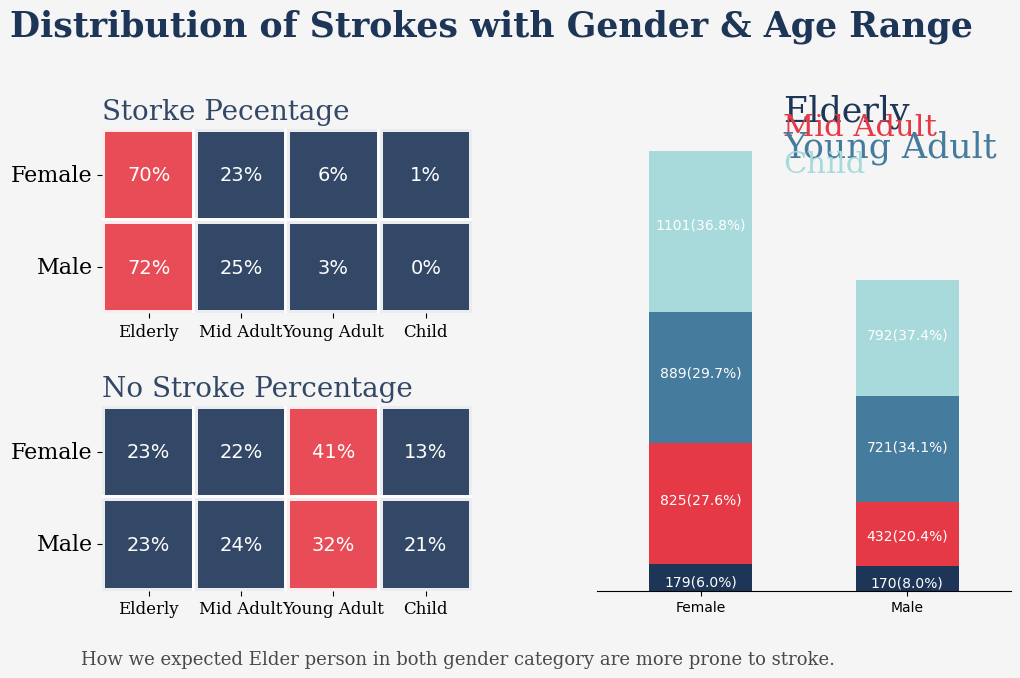

In [50]:
import matplotlib
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df_v[df_v['stroke']==0]
stroke = df_v[df_v['stroke']==1]

gender_order = ['Female','Male']
age_order = ['Elderly', 'Mid Adult', 'Young Adult', 'Child']


col1 = ["#1d3557","#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#1d3557","#e63946"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['age_cat']],normalize='index').loc[gender_order,age_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['age_cat']], normalize='index').loc[gender_order,age_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(-1, -1., 'Distribution of Strokes with Gender & Age Range', {'font':'Serif', 'color':'#1d3557', 'weight':'bold','size':25})
ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#1d3557", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#1d3557", 'size':20}, alpha =0.9)

ax0.set_xticklabels(age_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax1.set_xticklabels(age_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax0.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
ax1.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
table = pd.crosstab(index = df["gender"], columns = df_v["bmi_cat"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946", "#457b9d", "#A8DADC"], ax = ax2, legend=False)
ax2.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')
ax2.set_yticks([])
ax2.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax2.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax2.text(0.4, 3200, age_order[0], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax2.text(0.4, 3100, age_order[1], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#e63946"})
ax2.text(0.4, 2950, age_order[2], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#457b9d"})
ax2.text(0.4, 2850, age_order[3], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#A8DADC"})
ax2.text(-3, -500, "How we expected Elder person in both gender category are more prone to stroke.", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)

for loc in ['right', 'top', "left"]:
    ax2.spines[loc].set_visible(False)

for loc in ['right', 'top',"left"]:
    ax2.spines[loc].set_visible(False)
ax2.set_facecolor("#f6f5f5")
ax2.set_yticks([])
axes = [ax0, ax1]
for ix, ax in enumerate(axes):
    ax.set_xlabel("") # to remove x ticks
    ax.set_ylabel("") # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)

fig.show()

In [51]:
df_v["smoking_status"].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

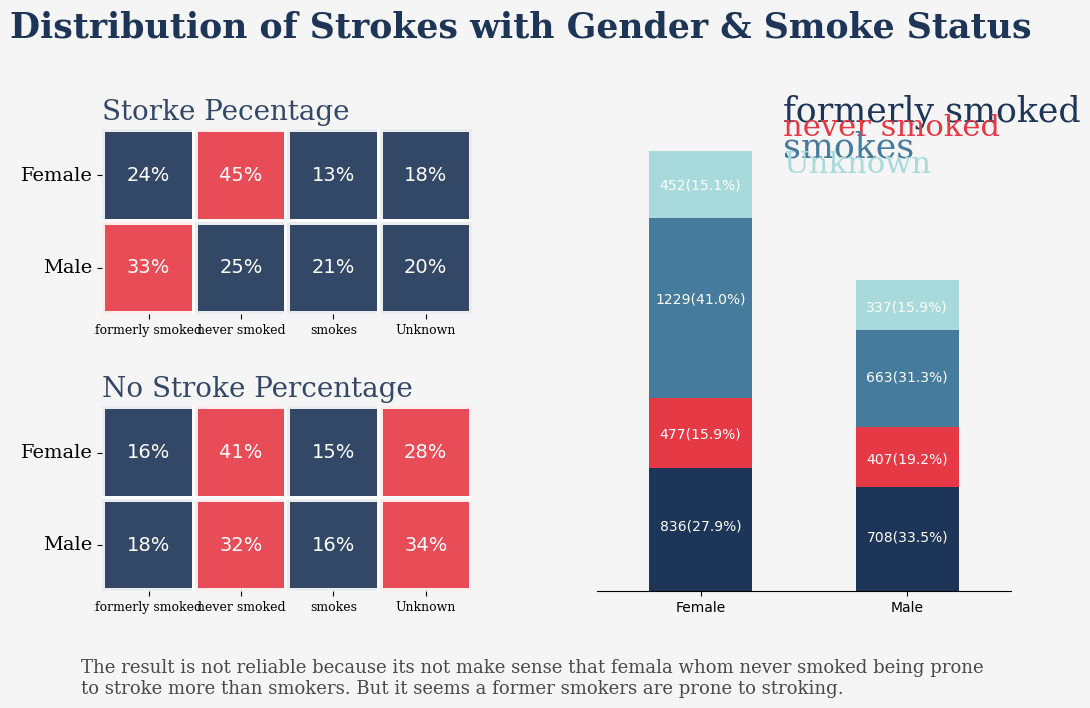

In [52]:
import matplotlib
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df_v[df_v['stroke']==0]
stroke = df_v[df_v['stroke']==1]

gender_order = ['Female','Male']
smoke_order = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']


col1 = ["#1d3557","#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#1d3557","#e63946"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['gender'],[stroke['smoking_status']],normalize='index').loc[gender_order,smoke_order]
no_stroke = pd.crosstab(healthy['gender'],[healthy['smoking_status']], normalize='index').loc[gender_order,smoke_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(-1, -1., 'Distribution of Strokes with Gender & Smoke Status', {'font':'Serif', 'color':'#1d3557', 'weight':'bold','size':25})
ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#1d3557", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#1d3557", 'size':20}, alpha =0.9)

ax0.set_xticklabels(smoke_order, fontdict={'font':'serif', 'color':'black', 'size':9}, rotation=0)
ax1.set_xticklabels(smoke_order, fontdict={'font':'serif', 'color':'black', 'size':9}, rotation=0)
ax0.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':14}, rotation=0)
ax1.set_yticklabels(gender_order, fontdict={'font':'serif', 'color':'black', 'size':14}, rotation=0)

table = pd.crosstab(index = df["gender"], columns = df_v["smoking_status"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946", "#457b9d", "#A8DADC"], ax = ax2, legend=False)
ax2.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')
ax2.set_yticks([])
ax2.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax2.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax2.text(0.4, 3200, smoke_order[0], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax2.text(0.4, 3100, smoke_order[1], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#e63946"})
ax2.text(0.4, 2950, smoke_order[2], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#457b9d"})
ax2.text(0.4, 2850, smoke_order[3], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#A8DADC"})
ax2.text(-3, -700, "The result is not reliable because its not make sense that femala whom never smoked being prone\nto stroke more than smokers. But it seems a former smokers are prone to stroking.", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)

for loc in ['right', 'top', "left"]:
    ax2.spines[loc].set_visible(False)

for loc in ['right', 'top',"left"]:
    ax2.spines[loc].set_visible(False)
ax2.set_facecolor("#f6f5f5")
ax2.set_yticks([])
axes = [ax0, ax1]
for ix, ax in enumerate(axes):
    ax.set_xlabel("") # to remove x ticks
    ax.set_ylabel("") # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)

fig.show()

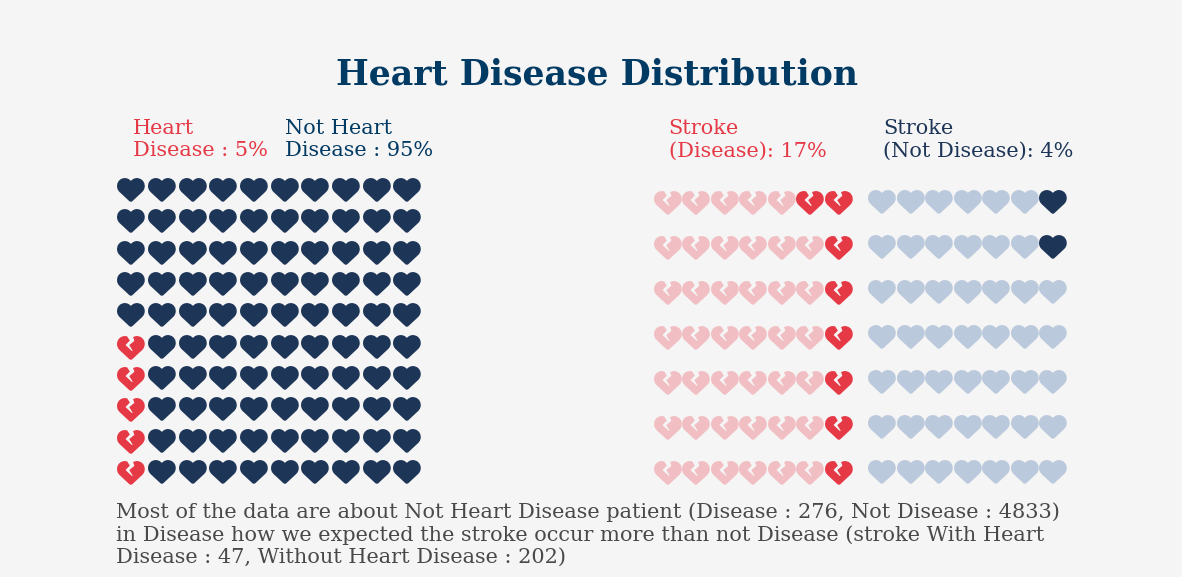

In [53]:
disease = df1[df1['heart_disease'] == 1]
notdisease = df1[df1['heart_disease'] == 0]

disease_stroke = disease[disease["stroke"] == 1]
notdisease_stroke = notdisease[notdisease["stroke"] == 1]

disease_num = int(len(disease) / (len(disease) + len(notdisease))*100)
notdisease_num = 100 - disease_num

disease_stroke_num = int((len(disease_stroke) / len(disease))*100)
notdisease_stroke_num = int((len(notdisease_stroke) / len(notdisease))*100)

fig = plt.figure(figsize=(15, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(8, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.28,0.5, f"Heart Disease Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:6, 1:4])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[disease_num, notdisease_num],
    colors=["#E63946", "#1d3557"],
    icons=["heart-crack", "heart"],
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax1.text(0.05, 1.05, f"Heart\nDisease : {disease_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax1.text(0.55, 1.05, f"Not Heart\nDisease : {notdisease_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#013a63"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - disease_stroke_num, disease_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="heart-crack",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.075, 1.05, f"Stroke\n(Disease): {disease_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - notdisease_stroke_num, notdisease_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="heart",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke\n(Not Disease): {notdisease_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[6:7, 0:10])
ax4.text(0.1, 0.0, f"Most of the data are about Not Heart Disease patient (Disease : {len(disease)}, Not Disease : {len(notdisease)})\nin Disease how we expected the stroke occur more than not Disease (stroke With Heart\nDisease : {len(disease_stroke)}, Without Heart Disease : {len(notdisease_stroke)})", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')
axes = [ax0, ax1, ax2, ax3, ax4]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        


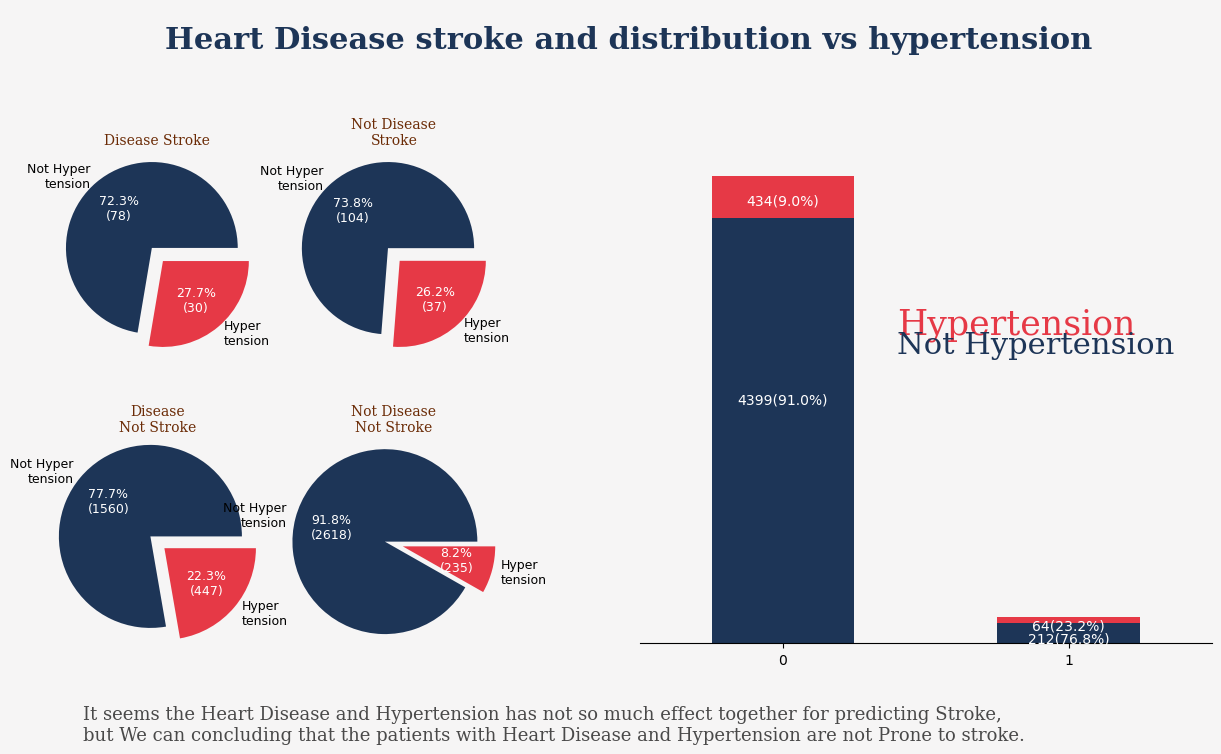

In [54]:
fig = plt.figure(figsize=(15, 28))
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        count = int(round(pct/100.0*total))
        return '{:.1f}%\n({:d})'.format(pct,count)
    return my_format        
stroke = df1[df1["stroke"] == 1]
healthy = df1[df1["stroke"] == 0]

disease_stroke = stroke[stroke["heart_disease"] == 1]
disease_healthy = healthy[healthy["heart_disease"] == 1]
notdisease_stroke = stroke[stroke["heart_disease"] == 0]
notdisease_healthy = healthy[healthy["heart_disease"] == 0]

labels = ["Not Hyper\ntension", "Hyper\ntension"]
gs = gridspec.GridSpecFromSubplotSpec(9,10, subplot_spec=gs0[1])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.10, 0.7, "Heart Disease stroke and distribution vs hypertension",{'font': 'Serif', 'fontsize': '22','weight':'bold', 'color':"#1d3557"})
ax1 = fig.add_subplot(gs[2:5, 0:2])
plt.pie(disease_stroke["hypertension"].value_counts(), colors = ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2), autopct=autopct_format(male_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Disease Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax1.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax2 = fig.add_subplot(gs[6:9, 0:2])
plt.pie(disease_healthy["hypertension"].value_counts(), colors = ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2),  autopct=autopct_format(male_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Disease\nNot Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax2.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax3 = fig.add_subplot(gs[2:5, 2:4])
plt.pie(notdisease_stroke["hypertension"].value_counts(), colors= ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2),  autopct=autopct_format(female_stroke["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Not Disease\nStroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax3.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[6:9, 2:4])
plt.pie(notdisease_healthy["hypertension"].value_counts(), colors = ["#1d3557", "#e63946"], labels = labels, explode = (0, 0.2),  autopct=autopct_format(female_healthy["ever_married"].value_counts()), textprops={'color': "white", "fontsize": 9})
plt.axis("equal")
plt.title("Not Disease\nNot Stroke", color=colors[1], fontsize = 12, font = "Serif")
texts = ax4.texts
texts[0].set_color('black')
texts[2].set_color('black')
ax4 = fig.add_subplot(gs[2:, 5:])
table = pd.crosstab(index = df["heart_disease"], columns = df["hypertension"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946"], ax = ax4, legend=False)
ax4.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax4.set_facecolor('#f6f5f5')
ax4.set_yticks([])
ax4.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    for j, value in enumerate(row):
        percentage = value / total * 100
        ax4.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax4.text(0.4, 3200, "Hypertension", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#e63946"})
ax4.text(0.4, 3000, "Not Hypertension", {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#1d3557"})
for loc in ['right', 'top', "left"]:
    ax4.spines[loc].set_visible(False)
ax4.text(-2.45, -1000, "It seems the Heart Disease and Hypertension has not so much effect together for predicting Stroke,\nbut We can concluding that the patients with Heart Disease and Hypertension are not Prone to stroke.", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
# ax5 = fig.add_subplot(gs[10:, :])
# ax5.set_facecolor('None')
axes = [ax0, ax1, ax2, ax3]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)


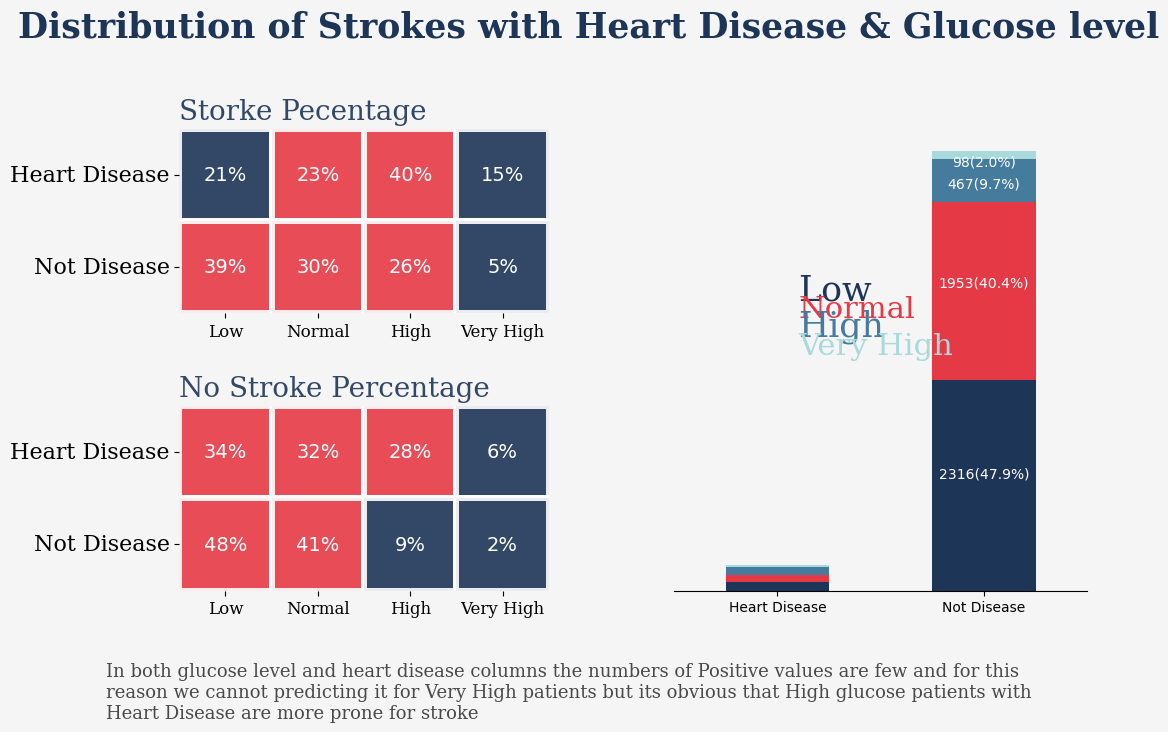

In [55]:
df_v["heart_disease"] = df_v["heart_disease"].replace([1, 0], ["Heart Disease", "Not Disease"])
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df_v[df_v['stroke']==0]
stroke = df_v[df_v['stroke']==1]

disease_order = ['Heart Disease','Not Disease']
glucose_order = ['Low', 'Normal', 'High', 'Very High']


col1 = ["#1d3557","#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#1d3557","#e63946"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['heart_disease'],[stroke['glucose_cat']],normalize='index').loc[disease_order,glucose_order]
no_stroke = pd.crosstab(healthy['heart_disease'],[healthy['glucose_cat']], normalize='index').loc[disease_order,glucose_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(-1.75, -1, 'Distribution of Strokes with Heart Disease & Glucose level', {'font':'Serif', 'color':'#1d3557', 'weight':'bold','size':25})
ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#1d3557", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#1d3557", 'size':20}, alpha =0.9)

ax0.set_xticklabels(glucose_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax1.set_xticklabels(glucose_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax0.set_yticklabels(disease_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
ax1.set_yticklabels(disease_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
table = pd.crosstab(index = df_v["heart_disease"], columns = df_v["glucose_cat"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946", "#457b9d", "#A8DADC"], ax = ax2, legend=False)
ax2.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')
ax2.set_yticks([])
ax2.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    if i != 0:
        for j, value in enumerate(row):
            percentage = value / total * 100
            ax2.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax2.text(0.1, 3200, "Low", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax2.text(0.1, 3000, "Normal", {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#e63946"})
ax2.text(0.1, 2800, "High", {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#457b9d"})
ax2.text(0.1, 2600, "Very High", {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#A8DADC"})
ax2.text(-3.25, -1400, "In both glucose level and heart disease columns the numbers of Positive values are few and for this\nreason we cannot predicting it for Very High patients but its obvious that High glucose patients with\nHeart Disease are more prone for stroke", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)

for loc in ['right', 'top', "left"]:
    ax2.spines[loc].set_visible(False)

for loc in ['right', 'top',"left"]:
    ax2.spines[loc].set_visible(False)
ax2.set_facecolor("#f6f5f5")
ax2.set_yticks([])
axes = [ax0, ax1]
for ix, ax in enumerate(axes):
    ax.set_xlabel("") # to remove x ticks
    ax.set_ylabel("") # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)

fig.show()

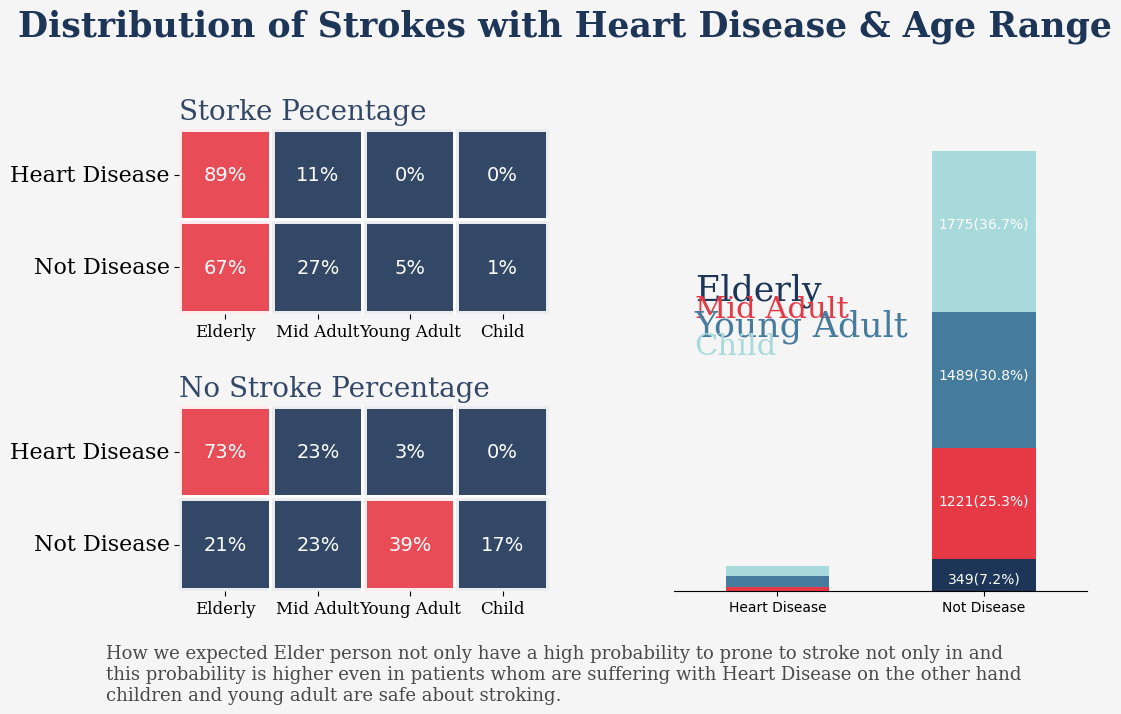

In [56]:
import matplotlib
fig = plt.figure(figsize=(12,6), dpi = 100)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.25, hspace=0.5)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[1,0])
ax2 = fig.add_subplot(gs[:,1])

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')


# ever_married, gender, residence, heart_disease and work_type

healthy = df_v[df_v['stroke']==0]
stroke = df_v[df_v['stroke']==1]

disease_order = ['Heart Disease','Not Disease']
age_order = ['Elderly', 'Mid Adult', 'Young Adult', 'Child']


col1 = ["#1d3557","#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N = 256)
col2 = ["#1d3557","#e63946"]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2)

stroke = pd.crosstab(stroke['heart_disease'],[stroke['age_cat']],normalize='index').loc[disease_order,age_order]
no_stroke = pd.crosstab(healthy['heart_disease'],[healthy['age_cat']], normalize='index').loc[disease_order,age_order]

sns.heatmap(ax=ax0, data=stroke, linewidths= 0,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col1,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)

sns.heatmap(ax=ax1, data=no_stroke, linewidths=0, 
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=3, cmap = col2,annot=True, fmt='1.0%',annot_kws={"fontsize":14}, alpha = 0.9)


ax0.text(-1.75, -1., 'Distribution of Strokes with Heart Disease & Age Range', {'font':'Serif', 'color':'#1d3557', 'weight':'bold','size':25})
ax0.text(0,-0.1,'Storke Pecentage ', {'font':'serif', 'color':"#1d3557", 'size':20},alpha = 0.9)
ax1.text(0,-0.1,'No Stroke Percentage', {'font':'serif', 'color':"#1d3557", 'size':20}, alpha =0.9)

ax0.set_xticklabels(age_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax1.set_xticklabels(age_order, fontdict={'font':'serif', 'color':'black', 'size':12})
ax0.set_yticklabels(disease_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
ax1.set_yticklabels(disease_order, fontdict={'font':'serif', 'color':'black', 'size':16}, rotation=0)
table = pd.crosstab(index = df_v["heart_disease"], columns = df_v["bmi_cat"])
table.plot(kind="bar", stacked=True, edgecolor = "None", color = ["#1d3557", "#e63946", "#457b9d", "#A8DADC"], ax = ax2, legend=False)
ax2.set_xticklabels(table.index, rotation=0)
fig.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')
ax2.set_yticks([])
ax2.set_xlabel("")
for i, (index, row) in enumerate(table.iterrows()):
    total = sum(row)
    if i!=0:
        for j, value in enumerate(row):
            percentage = value / total * 100
            ax2.text(i, (sum(row[:j]) + value / 1.7), f"{value}({percentage:.1f}%)", ha="center", va="top", color="white")
        

ax2.text(-0.4, 3200, age_order[0], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#1d3557"})
ax2.text(-0.4, 3000, age_order[1], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#e63946"})
ax2.text(-0.4, 2800, age_order[2], {'font': 'Serif', 'fontsize': '25','weight':'normal', 'color':"#457b9d"})
ax2.text(-0.4, 2600, age_order[3], {'font': 'Serif', 'fontsize': '22','weight':'normal', 'color':"#A8DADC"})
ax2.text(-3.25, -1200, "How we expected Elder person not only have a high probability to prone to stroke not only in and\nthis probability is higher even in patients whom are suffering with Heart Disease on the other hand\nchildren and young adult are safe about stroking.", {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)

for loc in ['right', 'top', "left"]:
    ax2.spines[loc].set_visible(False)

for loc in ['right', 'top',"left"]:
    ax2.spines[loc].set_visible(False)
ax2.set_facecolor("#f6f5f5")
ax2.set_yticks([])
axes = [ax0, ax1]
for ix, ax in enumerate(axes):
    ax.set_xlabel("") # to remove x ticks
    ax.set_ylabel("") # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)

fig.show()

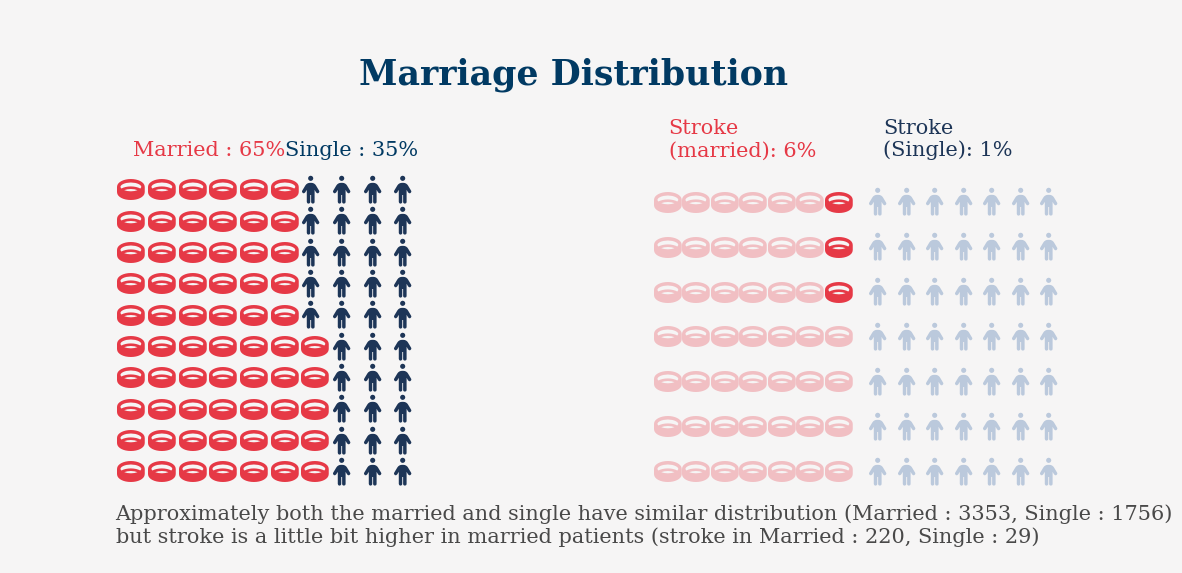

In [57]:
married = df1[df1['ever_married'] == 1]
single = df1[df1['ever_married'] == 0]

married_stroke = married[married["stroke"] == 1]
single_stroke = single[single["stroke"] == 1]

married_num = int(len(married) / (len(married) + len(single))*100)
single_num = 100 - married_num

married_stroke_num = int((len(married_stroke) / len(married))*100)
single_stroke_num = int((len(single_stroke) / len(single))*100)

fig = plt.figure(figsize=(15, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(8, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.3,0.5, f"Marriage Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:6, 1:4])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[married_num, single_num],
    colors=["#E63946", "#1d3557"],
    icons=["ring", "person"],
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax1.text(0.05, 1.05, f"Married : {married_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax1.text(0.55, 1.05, f"Single : {single_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#013a63"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - married_stroke_num, married_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="ring",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.075, 1.05, f"Stroke\n(married): {married_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - single_stroke_num, single_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="person",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke\n(Single): {single_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[6:7, 0:10])
ax4.text(0.1, 0.3, f"Approximately both the married and single have similar distribution (Married : {len(married)}, Single : {len(single)})\nbut stroke is a little bit higher in married patients (stroke in Married : {len(married_stroke)}, Single : {len(single_stroke)})", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')
axes = [ax0, ax1, ax2, ax3, ax4]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        


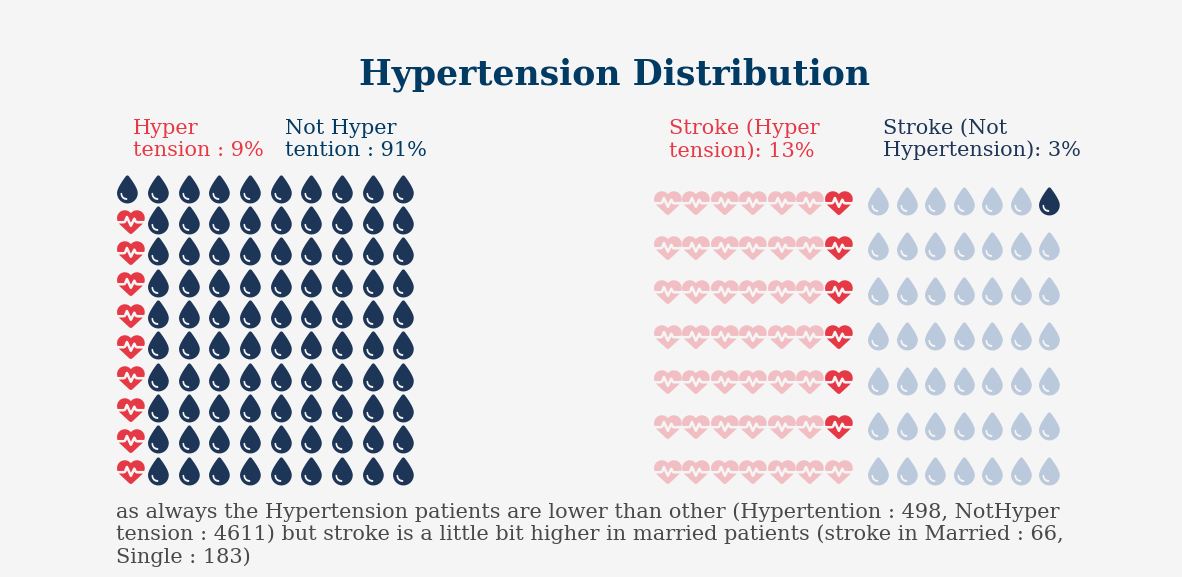

In [58]:
married = df1[df1['hypertension'] == 1]
single = df1[df1['hypertension'] == 0]

married_stroke = married[married["stroke"] == 1]
single_stroke = single[single["stroke"] == 1]

married_num = int(len(married) / (len(married) + len(single))*100)
single_num = 100 - married_num

married_stroke_num = int((len(married_stroke) / len(married))*100)
single_stroke_num = int((len(single_stroke) / len(single))*100)

fig = plt.figure(figsize=(15, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(8, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.3,0.5, f"Hypertension Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:6, 1:4])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[married_num, single_num],
    colors=["#E63946", "#1d3557"],
    icons=["heart-pulse", "droplet"],
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax1.text(0.05, 1.05, f"Hyper\ntension : {married_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax1.text(0.55, 1.05, f"Not Hyper\ntention : {single_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#013a63"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - married_stroke_num, married_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="heart-pulse",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.075, 1.05, f"Stroke (Hyper\ntension): {married_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - single_stroke_num, single_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="droplet",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 20,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke (Not\nHypertension): {single_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[6:7, 0:10])
ax4.text(0.1, 0.0, f"as always the Hypertension patients are lower than other (Hypertention : {len(married)}, NotHyper\ntension : {len(single)}) but stroke is a little bit higher in married patients (stroke in Married : {len(married_stroke)},\nSingle : {len(single_stroke)})", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')
axes = [ax0, ax1, ax2, ax3, ax4]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        


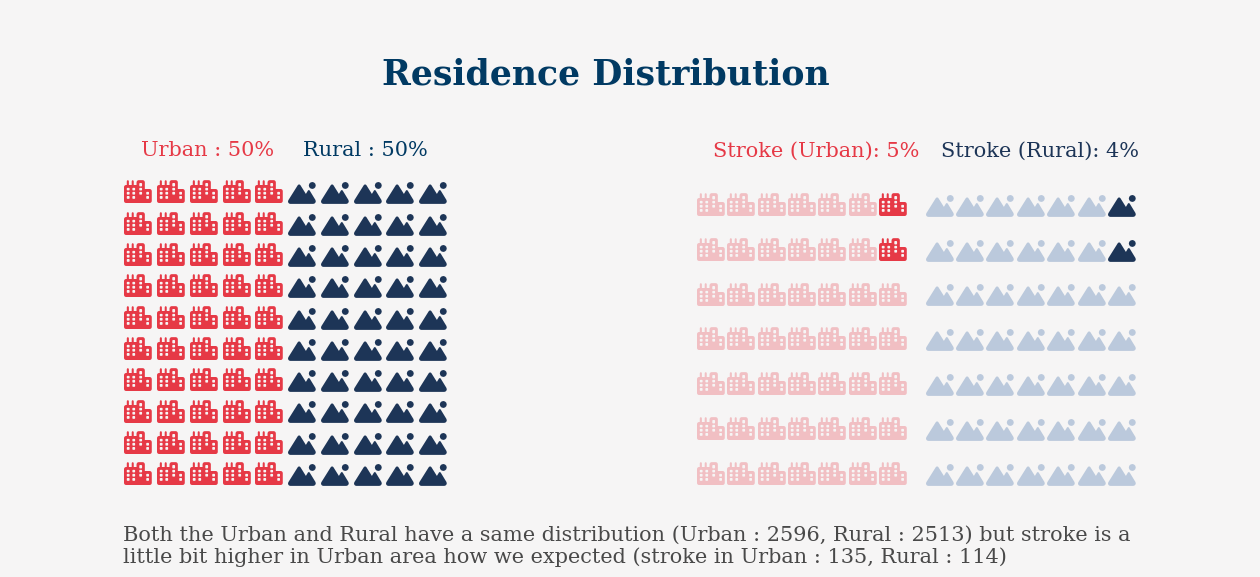

In [59]:
urban = df[df['Residence_type'] == "Urban"]
rural = df[df['Residence_type'] == "Rural"]

urban_stroke = urban[urban["stroke"] == 1]
rural_stroke = rural[rural["stroke"] == 1]

urban_num = int(len(urban) / (len(urban) + len(rural))*100)
rural_num = 100 - urban_num

urban_stroke_num = int((len(urban_stroke) / len(urban))*100)
rural_stroke_num = int((len(rural_stroke) / len(rural))*100)

fig = plt.figure(figsize=(16, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(8, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:2, :])
ax0.text(0.3,0.5, f"Residence Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:6, 1:4])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[urban_num, rural_num],
    colors=["#E63946", "#1d3557"],
    icons=["city", "mountain-sun"],
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax1.text(0.05, 1.05, f"Urban : {urban_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax1.text(0.55, 1.05, f"Rural : {rural_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#013a63"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - urban_stroke_num, urban_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="city",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.075, 1.05, f"Stroke (Urban): {urban_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - rural_stroke_num, rural_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="mountain-sun",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke (Rural): {rural_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[6:7, 0:10])
ax4.text(0.1, 0.0, f"Both the Urban and Rural have a same distribution (Urban : {len(urban)}, Rural : {len(rural)}) but stroke is a\nlittle bit higher in Urban area how we expected (stroke in Urban : {len(urban_stroke)}, Rural : {len(rural_stroke)})", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')
axes = [ax0, ax1, ax2, ax3, ax4]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        


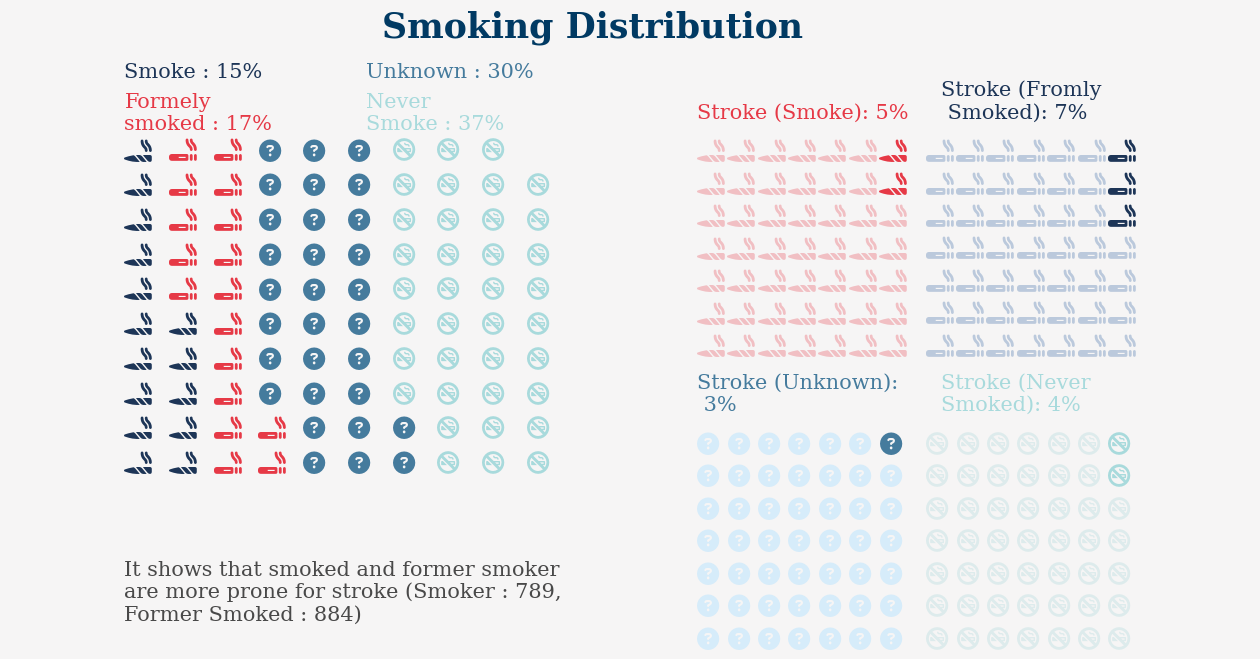

In [60]:
smokes = df[df['smoking_status'] == "smokes"]
formerly_smoked = df[df['smoking_status'] == "formerly smoked"]
Unknown = df[df['smoking_status'] == "Unknown"]
never_smoked = df[df['smoking_status'] == "never smoked"]

smokes_stroke = smokes[smokes["stroke"] == 1]
formerly_smoked_stroke = formerly_smoked[formerly_smoked["stroke"] == 1]
Unknown_stroke = Unknown[Unknown["stroke"] == 1]
never_smoked_stroke = never_smoked[never_smoked["stroke"] == 1]

smokes_num = int(len(smokes) / (len(df))*100)
formerly_smoked_num = int(len(formerly_smoked) / (len(df))*100)
Unknown_num = int(len(Unknown) / (len(df))*100)
never_smoked_num = int(len(never_smoked) / (len(df))*100)

smokes_stroke_num = int((len(smokes_stroke) / len(smokes))*100)
formerly_smoked_stroke_num = int((len(formerly_smoked_stroke) / len(formerly_smoked))*100)
Unknown_stroke_num = int((len(Unknown_stroke) / len(Unknown))*100)
never_smoked_stroke_num = int((len(never_smoked_stroke) / len(never_smoked))*100)
fig = plt.figure(figsize=(16, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(11, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:1, :])
ax0.text(0.3,0.5, f"Smoking Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:8, 1:5])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[smokes_num, formerly_smoked_num, Unknown_num, never_smoked_num],
    colors=["#1d3557", "#e63946", "#457b9d", "#A8DADC"],
    icons=["joint", "smoking", "circle-question", "ban-smoking"],
    icon_size = 16,
    plot_anchor = "C",
)
ax1.text(0, 1.15, f"Smoke : {smokes_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax1.text(0, 1.0, f"Formely\nsmoked : {formerly_smoked_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#e63946"})
ax1.text(0.55, 1.15, f"Unknown : {Unknown_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})
ax1.text(0.55, 1.0, f"Never\nSmoke : {never_smoked_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - smokes_stroke_num, smokes_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="joint",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.0, 1.05, f"Stroke (Smoke): {smokes_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - formerly_smoked_stroke_num, formerly_smoked_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="smoking",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke (Fromly\n Smoked): {formerly_smoked_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[8:10, 1:6])
ax4.text(0.0, -0.3, f"It shows that smoked and former smoker\nare more prone for stroke (Smoker : {len(smokes)},\nFormer Smoked : {len(formerly_smoked)})", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')

ax5 = fig.add_subplot(gs[7:11, 6:8])
Waffle.make_waffle(
    ax=ax5,
    rows=7,
    columns=7,
    values=[100 - Unknown_stroke_num, Unknown_stroke_num],
    colors=["#D6ECFA", "#457b9d"],
    icons="circle-question",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax5.text(0.0, 1.05, f"Stroke (Unknown):\n {Unknown_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})

ax6 = fig.add_subplot(gs[7:11, 8:10])
Waffle.make_waffle(
    ax=ax6,
    rows=7,
    columns=7,
    values=[100 - never_smoked_stroke_num, never_smoked_stroke_num],
    colors=["#DDEBEC", "#A8DADC"],
    icons="ban-smoking",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax6.text(0.075, 1.05, f"Stroke (Never\nSmoked): {never_smoked_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        


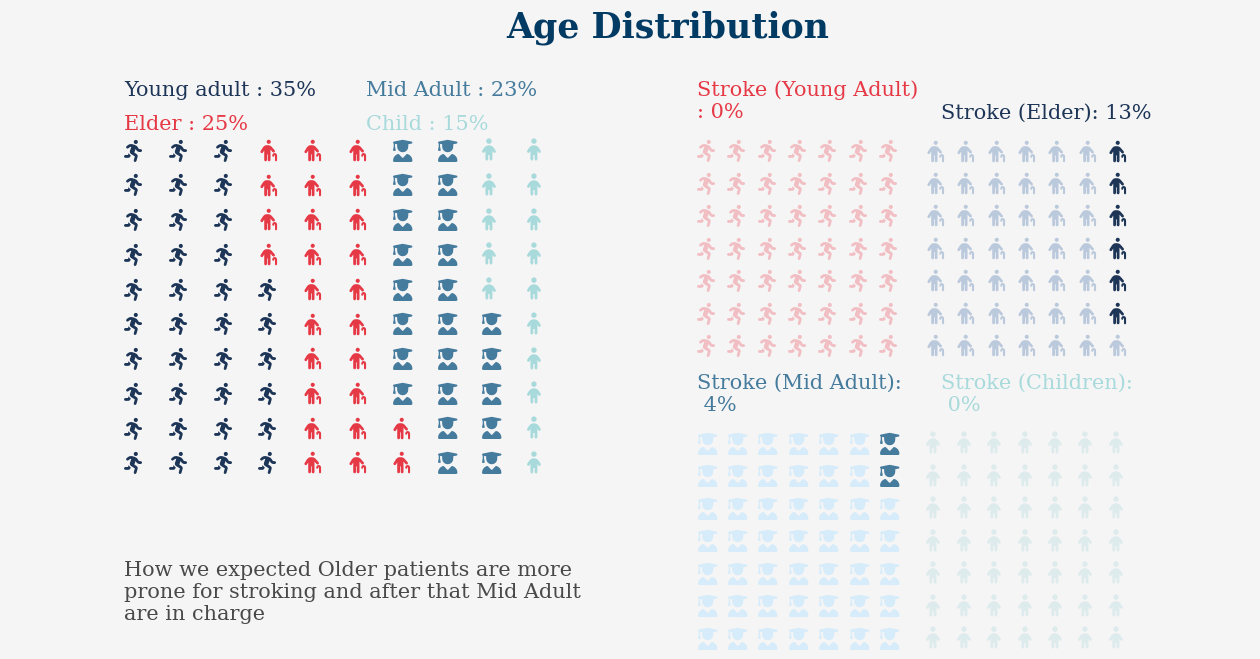

In [61]:
Young_Adult = df_v[df_v['age_cat'] == "Young Adult"]
Elderly = df_v[df_v['age_cat'] == "Elderly"]
Mid_Adult = df_v[df_v['age_cat'] == "Mid Adult"]
Child = df_v[df_v['age_cat'] == "Child"]

Young_Adult_stroke = Young_Adult[Young_Adult["stroke"] == 1]
Elderly_stroke = Elderly[Elderly["stroke"] == 1]
Mid_Adult_stroke = Mid_Adult[Mid_Adult["stroke"] == 1]
Child_stroke = Child[Child["stroke"] == 1]

Young_Adult_num = int(len(Young_Adult) / (len(df))*100)
Elderly_num = int(len(Elderly) / (len(df))*100)
Mid_Adult_num = int(len(Mid_Adult) / (len(df))*100)
Child_num = int(len(Child) / (len(df))*100)

Young_Adult_stroke_num = int((len(Young_Adult_stroke) / len(Young_Adult))*100)
Elderly_stroke_num = int((len(Elderly_stroke) / len(Elderly))*100)
Mid_Adult_stroke_num = int((len(Mid_Adult_stroke) / len(Mid_Adult))*100)
Child_stroke_num = int((len(Child_stroke) / len(Child))*100)

fig = plt.figure(figsize=(16, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(11, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:1, :])
ax0.text(0.4,0.5, f"Age Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:8, 1:5])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[Young_Adult_num, Elderly_num, Mid_Adult_num, Child_num],
    colors=["#1d3557", "#e63946", "#457b9d", "#A8DADC"],
    icons=["person-running", "person-cane", "user-graduate", "child"],
    icon_size = 16,
    plot_anchor = "C",
)
ax1.text(0, 1.1, f"Young adult : {Young_Adult_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax1.text(0, 1.0, f"Elder : {Elderly_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#e63946"})
ax1.text(0.55, 1.1, f"Mid Adult : {Mid_Adult_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})
ax1.text(0.55, 1.0, f"Child : {Child_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - Young_Adult_stroke_num, Young_Adult_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="person-running",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.0, 1.05, f"Stroke (Young Adult)\n: {Young_Adult_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - Elderly_stroke_num, Elderly_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="person-cane",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke (Elder): {Elderly_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[8:10, 1:6])
ax4.text(0.0, -0.3, f"How we expected Older patients are more\nprone for stroking and after that Mid Adult\nare in charge", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')

ax5 = fig.add_subplot(gs[7:11, 6:8])
Waffle.make_waffle(
    ax=ax5,
    rows=7,
    columns=7,
    values=[100 - Mid_Adult_stroke_num, Mid_Adult_stroke_num],
    colors=["#D6ECFA", "#457b9d"],
    icons="user-graduate",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax5.text(0.0, 1.05, f"Stroke (Mid Adult):\n {Mid_Adult_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})

ax6 = fig.add_subplot(gs[7:11, 8:10])
Waffle.make_waffle(
    ax=ax6,
    rows=7,
    columns=7,
    values=[100 - Child_stroke_num, Child_stroke_num],
    colors=["#DDEBEC", "#A8DADC"],
    icons="child",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax6.text(0.075, 1.05, f"Stroke (Children):\n {Child_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        

        

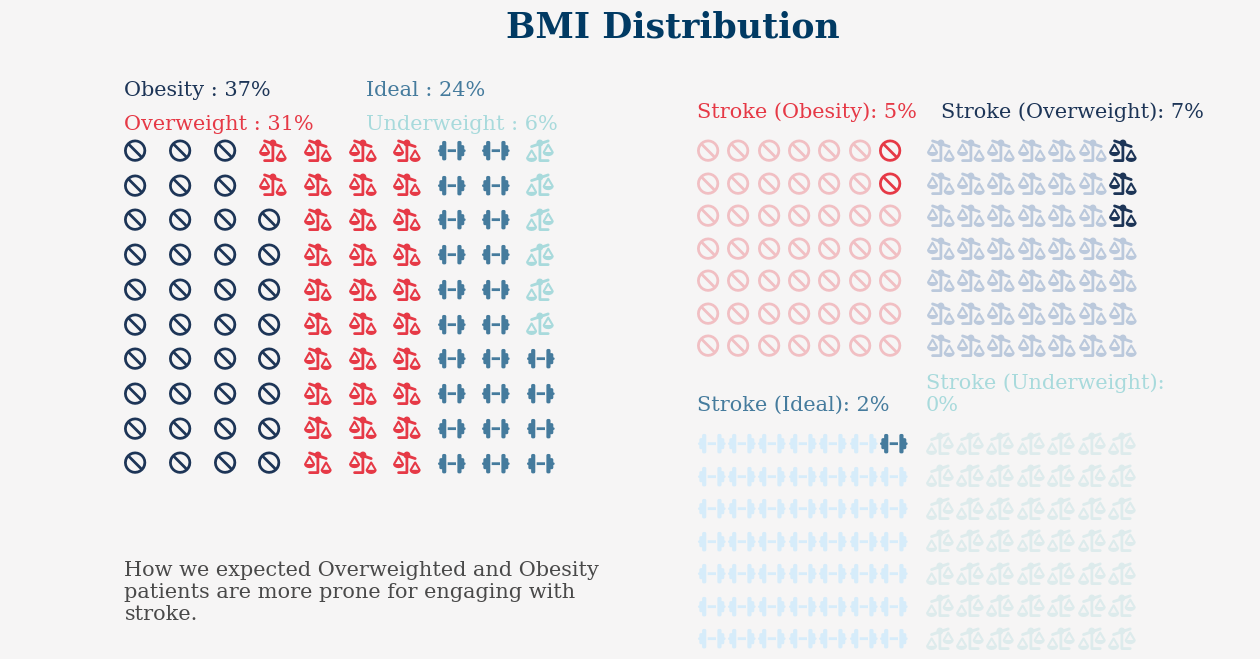

In [62]:
obesity = df_v[df_v['bmi_cat'] == "Obesity"]
overweight = df_v[df_v['bmi_cat'] == "Overweight"]
ideal = df_v[df_v['bmi_cat'] == "Ideal"]
underweight = df_v[df_v['bmi_cat'] == "Underweight"]

obesity_stroke = obesity[obesity["stroke"] == 1]
overweight_stroke = overweight[overweight["stroke"] == 1]
ideal_stroke = ideal[ideal["stroke"] == 1]
underweight_stroke = underweight[underweight["stroke"] == 1]

obesity_num = int(len(obesity) / (len(df))*100)
overweight_num = int(len(overweight) / (len(df))*100)
ideal_num = int(len(ideal) / (len(df))*100)
underweight_num = int(len(underweight) / (len(df))*100)

obesity_stroke_num = int((len(obesity_stroke) / len(obesity))*100)
overweight_stroke_num = int((len(overweight_stroke) / len(overweight))*100)
ideal_stroke_num = int((len(ideal_stroke) / len(ideal))*100)
underweight_stroke_num = int((len(underweight_stroke) / len(underweight))*100)

fig = plt.figure(figsize=(16, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(11, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:1, :])
ax0.text(0.4,0.5, f"BMI Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:8, 1:5])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[obesity_num, overweight_num, ideal_num, underweight_num],
    colors=["#1d3557", "#e63946", "#457b9d", "#A8DADC"],
    icons=["ban", "scale-unbalanced-flip", "dumbbell", "scale-unbalanced"],
    icon_size = 16,
    plot_anchor = "C",
)
ax1.text(0, 1.1, f"Obesity : {obesity_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax1.text(0, 1.0, f"Overweight : {overweight_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#e63946"})
ax1.text(0.55, 1.1, f"Ideal : {ideal_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})
ax1.text(0.55, 1.0, f"Underweight : {underweight_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - obesity_stroke_num, obesity_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="ban",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.0, 1.05, f"Stroke (Obesity): {obesity_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - overweight_stroke_num, overweight_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="scale-unbalanced-flip",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke (Overweight): {overweight_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[8:10, 1:6])
ax4.text(0.0, -0.3, f"How we expected Overweighted and Obesity\npatients are more prone for engaging with\nstroke.", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')

ax5 = fig.add_subplot(gs[7:11, 6:8])
Waffle.make_waffle(
    ax=ax5,
    rows=7,
    columns=7,
    values=[100 - ideal_stroke_num, ideal_stroke_num],
    colors=["#D6ECFA", "#457b9d"],
    icons="dumbbell",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax5.text(0.0, 1.05, f"Stroke (Ideal): {ideal_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})

ax6 = fig.add_subplot(gs[7:11, 8:10])
Waffle.make_waffle(
    ax=ax6,
    rows=7,
    columns=7,
    values=[100 - underweight_stroke_num, underweight_stroke_num],
    colors=["#DDEBEC", "#A8DADC"],
    icons="scale-unbalanced",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax6.text(0., 1.05, f"Stroke (Underweight):\n{underweight_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        


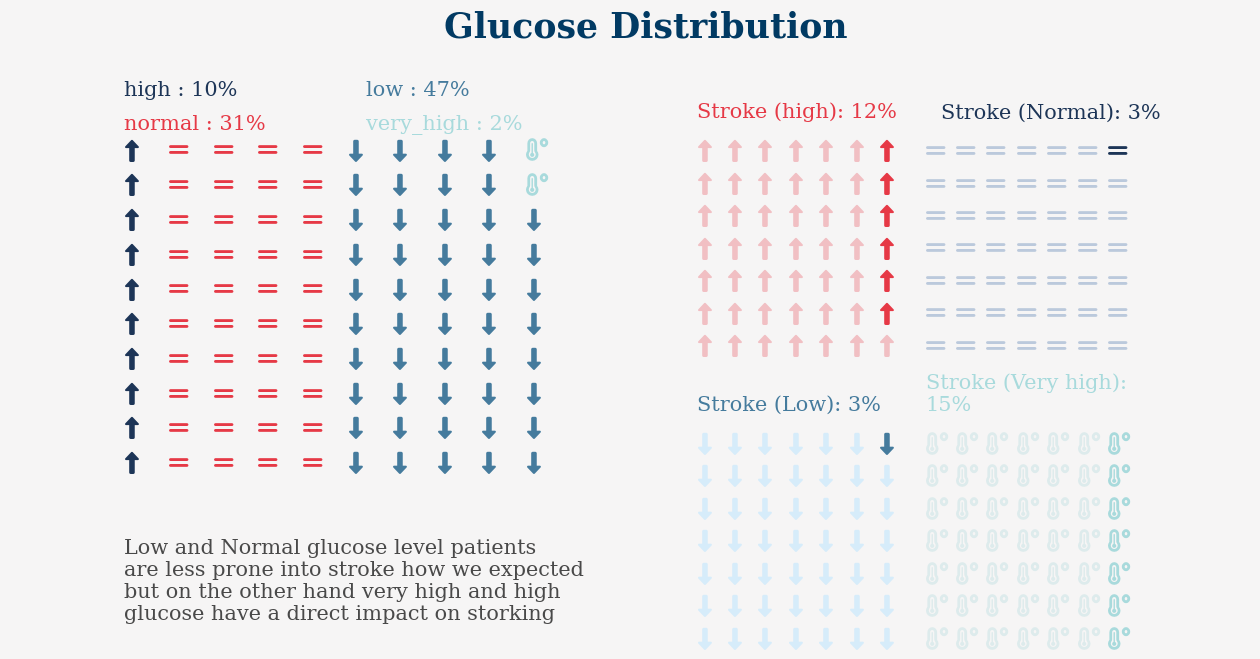

In [63]:
high = df_v[df_v['glucose_cat'] == "High"]
normal = df_v[df_v['glucose_cat'] == "Normal"]
low = df_v[df_v['glucose_cat'] == "Low"]
very_high = df_v[df_v['glucose_cat'] == "Very High"]

high_stroke = high[high["stroke"] == 1]
normal_stroke = normal[normal["stroke"] == 1]
low_stroke = low[low["stroke"] == 1]
very_high_stroke = very_high[very_high["stroke"] == 1]

high_num = int(len(high) / (len(df))*100)
normal_num = int(len(normal) / (len(df))*100)
low_num = int(len(low) / (len(df))*100)
very_high_num = int(len(very_high) / (len(df))*100)

high_stroke_num = int((len(high_stroke) / len(high))*100)
normal_stroke_num = int((len(normal_stroke) / len(normal))*100)
low_stroke_num = int((len(low_stroke) / len(low))*100)
very_high_stroke_num = int((len(very_high_stroke) / len(very_high))*100)

fig = plt.figure(figsize=(16, 28))
def processing_plot(axes):
    for ix, ax in enumerate(axes):
        ax.set_title('ax[{}]'.format(ix + 4 * gs_index)) # Update the title to reflect the position
        ax.set_xticks([]) # to remove x ticks
        ax.set_yticks([])
gs0 = gridspec.GridSpec(3, 1, figure=fig)
gs = gridspec.GridSpecFromSubplotSpec(11, 11, subplot_spec=gs0[0])
ax0 = fig.add_subplot(gs[0:1, :])
ax0.text(0.35,0.5, f"Glucose Distribution" ,{'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})
ax1 = fig.add_subplot(gs[2:8, 1:5])
Waffle.make_waffle(
    ax=ax1,
    rows=10,
    columns=10,
    values=[high_num, normal_num, low_num, very_high_num],
    colors=["#1d3557", "#e63946", "#457b9d", "#A8DADC"],
    icons=["up-long", "grip-lines", "down-long", "temperature-high"],
    icon_size = 16,
    plot_anchor = "C",
)
ax1.text(0, 1.1, f"high : {high_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax1.text(0, 1.0, f"normal : {overweight_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#e63946"})
ax1.text(0.55, 1.1, f"low : {low_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})
ax1.text(0.55, 1.0, f"very_high : {very_high_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})
ax2 = fig.add_subplot(gs[2:6, 6:8])
Waffle.make_waffle(
    ax=ax2,
    rows=7,
    columns=7,
    values=[100 - high_stroke_num, high_stroke_num],
    colors=["#F1BFC3", "#E63946"],
    icons="up-long",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax2.text(0.0, 1.05, f"Stroke (high): {high_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#E63946"})
ax3 = fig.add_subplot(gs[2:6, 8:10])
Waffle.make_waffle(
    ax=ax3,
    rows=7,
    columns=7,
    values=[100 - normal_stroke_num, normal_stroke_num],
    colors=["#BBC9DC", "#1d3557"],
    icons="grip-lines",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax3.text(0.075, 1.05, f"Stroke (Normal): {normal_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#1d3557"})
ax4 = fig.add_subplot(gs[8:10, 1:6])
ax4.text(0.0, -0.3, f"Low and Normal glucose level patients\nare less prone into stroke how we expected\nbut on the other hand very high and high\nglucose have a direct impact on storking", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"black"}, alpha = 0.7)
fig.set_facecolor('#f6f5f5')

ax5 = fig.add_subplot(gs[7:11, 6:8])
Waffle.make_waffle(
    ax=ax5,
    rows=7,
    columns=7,
    values=[100 - low_stroke_num, low_stroke_num],
    colors=["#D6ECFA", "#457b9d"],
    icons="down-long",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax5.text(0.0, 1.05, f"Stroke (Low): {low_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#457b9d"})

ax6 = fig.add_subplot(gs[7:11, 8:10])
Waffle.make_waffle(
    ax=ax6,
    rows=7,
    columns=7,
    values=[100 - very_high_stroke_num, very_high_stroke_num],
    colors=["#DDEBEC", "#A8DADC"],
    icons="temperature-high",
    interval_ratio_y = 0.1,
    interval_ratio_x = 0.1,
    icon_size = 16,
    plot_anchor = "C",
    figsize = (3, 3)
)
ax6.text(0., 1.05, f"Stroke (Very high):\n{very_high_stroke_num}%", {'font': 'Serif', 'fontsize': '15','weight':'normal', 'color':"#A8DADC"})

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6]
for ix, ax in enumerate(axes):
    ax.set_xticks([]) # to remove x ticks
    ax.set_yticks([]) # to remove y ticks
    ax.set_facecolor('#f6f5f5')
    for loc in ['right', 'top',"left", "bottom"]:
        ax.spines[loc].set_visible(False)
        

In [64]:
#Modeling and Tuning
"""
评估，accuracy table，排名次，选最好的出来做grid，solve imbalance，hypermeter那个是random的，model loop， Train 和 Test dataset
，list accuracy f1 score so on
， 删feature，GUI
"""
X = new_df1.drop(["stroke"], axis = 1)
y = new_df1["stroke"]


In [65]:
models = [('CBC', CatBoostClassifier()),
          ("RF", RandomForestClassifier()),
          ("XGBoost", XGBClassifier())]

Learning rate set to 0.018793
0:	learn: 0.6608233	total: 150ms	remaining: 2m 30s
1:	learn: 0.6351419	total: 153ms	remaining: 1m 16s
2:	learn: 0.6110946	total: 154ms	remaining: 51.3s
3:	learn: 0.5878385	total: 156ms	remaining: 38.9s
4:	learn: 0.5676303	total: 158ms	remaining: 31.5s
5:	learn: 0.5467006	total: 161ms	remaining: 26.6s
6:	learn: 0.5245459	total: 163ms	remaining: 23.1s
7:	learn: 0.5062797	total: 165ms	remaining: 20.5s
8:	learn: 0.4838597	total: 167ms	remaining: 18.4s
9:	learn: 0.4649517	total: 170ms	remaining: 16.8s
10:	learn: 0.4480390	total: 172ms	remaining: 15.5s
11:	learn: 0.4332707	total: 174ms	remaining: 14.4s
12:	learn: 0.4204681	total: 176ms	remaining: 13.4s
13:	learn: 0.4033891	total: 178ms	remaining: 12.6s
14:	learn: 0.3896549	total: 181ms	remaining: 11.9s
15:	learn: 0.3779861	total: 183ms	remaining: 11.3s
16:	learn: 0.3668053	total: 185ms	remaining: 10.7s
17:	learn: 0.3552307	total: 188ms	remaining: 10.2s
18:	learn: 0.3450391	total: 190ms	remaining: 9.79s
19:	learn

186:	learn: 0.1314844	total: 582ms	remaining: 2.53s
187:	learn: 0.1313072	total: 585ms	remaining: 2.52s
188:	learn: 0.1312289	total: 587ms	remaining: 2.52s
189:	learn: 0.1311190	total: 589ms	remaining: 2.51s
190:	learn: 0.1310103	total: 592ms	remaining: 2.5s
191:	learn: 0.1308233	total: 594ms	remaining: 2.5s
192:	learn: 0.1306974	total: 596ms	remaining: 2.49s
193:	learn: 0.1305493	total: 598ms	remaining: 2.49s
194:	learn: 0.1304818	total: 600ms	remaining: 2.48s
195:	learn: 0.1303622	total: 603ms	remaining: 2.47s
196:	learn: 0.1302047	total: 605ms	remaining: 2.47s
197:	learn: 0.1300171	total: 608ms	remaining: 2.46s
198:	learn: 0.1298825	total: 610ms	remaining: 2.46s
199:	learn: 0.1297142	total: 613ms	remaining: 2.45s
200:	learn: 0.1295353	total: 615ms	remaining: 2.44s
201:	learn: 0.1294142	total: 618ms	remaining: 2.44s
202:	learn: 0.1292630	total: 620ms	remaining: 2.43s
203:	learn: 0.1291247	total: 623ms	remaining: 2.43s
204:	learn: 0.1289846	total: 625ms	remaining: 2.42s
205:	learn: 0.

356:	learn: 0.1118606	total: 981ms	remaining: 1.77s
357:	learn: 0.1116881	total: 984ms	remaining: 1.76s
358:	learn: 0.1115600	total: 986ms	remaining: 1.76s
359:	learn: 0.1114843	total: 989ms	remaining: 1.76s
360:	learn: 0.1114261	total: 991ms	remaining: 1.75s
361:	learn: 0.1112892	total: 993ms	remaining: 1.75s
362:	learn: 0.1112379	total: 996ms	remaining: 1.75s
363:	learn: 0.1111379	total: 998ms	remaining: 1.74s
364:	learn: 0.1110330	total: 1s	remaining: 1.74s
365:	learn: 0.1109342	total: 1s	remaining: 1.74s
366:	learn: 0.1108358	total: 1s	remaining: 1.73s
367:	learn: 0.1107481	total: 1.01s	remaining: 1.73s
368:	learn: 0.1106912	total: 1.01s	remaining: 1.73s
369:	learn: 0.1105859	total: 1.01s	remaining: 1.72s
370:	learn: 0.1105077	total: 1.01s	remaining: 1.72s
371:	learn: 0.1104118	total: 1.02s	remaining: 1.72s
372:	learn: 0.1102938	total: 1.02s	remaining: 1.71s
373:	learn: 0.1102652	total: 1.02s	remaining: 1.71s
374:	learn: 0.1101903	total: 1.02s	remaining: 1.71s
375:	learn: 0.1100927

531:	learn: 0.0960507	total: 1.38s	remaining: 1.22s
532:	learn: 0.0960109	total: 1.39s	remaining: 1.21s
533:	learn: 0.0959669	total: 1.39s	remaining: 1.21s
534:	learn: 0.0958426	total: 1.39s	remaining: 1.21s
535:	learn: 0.0957090	total: 1.39s	remaining: 1.21s
536:	learn: 0.0956505	total: 1.4s	remaining: 1.2s
537:	learn: 0.0955769	total: 1.4s	remaining: 1.2s
538:	learn: 0.0955335	total: 1.4s	remaining: 1.2s
539:	learn: 0.0954195	total: 1.4s	remaining: 1.2s
540:	learn: 0.0952749	total: 1.41s	remaining: 1.19s
541:	learn: 0.0951353	total: 1.41s	remaining: 1.19s
542:	learn: 0.0950630	total: 1.41s	remaining: 1.19s
543:	learn: 0.0949305	total: 1.41s	remaining: 1.18s
544:	learn: 0.0948878	total: 1.42s	remaining: 1.18s
545:	learn: 0.0948277	total: 1.42s	remaining: 1.18s
546:	learn: 0.0947451	total: 1.42s	remaining: 1.18s
547:	learn: 0.0946152	total: 1.42s	remaining: 1.17s
548:	learn: 0.0945741	total: 1.42s	remaining: 1.17s
549:	learn: 0.0945179	total: 1.43s	remaining: 1.17s
550:	learn: 0.094410

692:	learn: 0.0852657	total: 1.77s	remaining: 782ms
693:	learn: 0.0852114	total: 1.77s	remaining: 780ms
694:	learn: 0.0851410	total: 1.77s	remaining: 777ms
695:	learn: 0.0850652	total: 1.77s	remaining: 775ms
696:	learn: 0.0849874	total: 1.78s	remaining: 772ms
697:	learn: 0.0849411	total: 1.78s	remaining: 769ms
698:	learn: 0.0848580	total: 1.78s	remaining: 767ms
699:	learn: 0.0848232	total: 1.78s	remaining: 764ms
700:	learn: 0.0848023	total: 1.78s	remaining: 762ms
701:	learn: 0.0847653	total: 1.79s	remaining: 759ms
702:	learn: 0.0847032	total: 1.79s	remaining: 756ms
703:	learn: 0.0846707	total: 1.79s	remaining: 754ms
704:	learn: 0.0845515	total: 1.79s	remaining: 751ms
705:	learn: 0.0845008	total: 1.8s	remaining: 749ms
706:	learn: 0.0844717	total: 1.8s	remaining: 746ms
707:	learn: 0.0844380	total: 1.8s	remaining: 743ms
708:	learn: 0.0843496	total: 1.8s	remaining: 740ms
709:	learn: 0.0843212	total: 1.81s	remaining: 738ms
710:	learn: 0.0842296	total: 1.81s	remaining: 735ms
711:	learn: 0.08

926:	learn: 0.0731912	total: 2.36s	remaining: 186ms
927:	learn: 0.0731411	total: 2.36s	remaining: 183ms
928:	learn: 0.0730893	total: 2.36s	remaining: 180ms
929:	learn: 0.0729993	total: 2.36s	remaining: 178ms
930:	learn: 0.0729201	total: 2.37s	remaining: 175ms
931:	learn: 0.0728637	total: 2.37s	remaining: 173ms
932:	learn: 0.0728018	total: 2.37s	remaining: 170ms
933:	learn: 0.0727629	total: 2.37s	remaining: 168ms
934:	learn: 0.0726990	total: 2.38s	remaining: 165ms
935:	learn: 0.0726590	total: 2.38s	remaining: 163ms
936:	learn: 0.0726191	total: 2.38s	remaining: 160ms
937:	learn: 0.0725563	total: 2.38s	remaining: 158ms
938:	learn: 0.0725441	total: 2.38s	remaining: 155ms
939:	learn: 0.0725159	total: 2.39s	remaining: 152ms
940:	learn: 0.0724396	total: 2.39s	remaining: 150ms
941:	learn: 0.0723847	total: 2.39s	remaining: 147ms
942:	learn: 0.0723397	total: 2.39s	remaining: 145ms
943:	learn: 0.0723064	total: 2.4s	remaining: 142ms
944:	learn: 0.0722707	total: 2.4s	remaining: 140ms
945:	learn: 0.

155:	learn: 0.1361284	total: 384ms	remaining: 2.08s
156:	learn: 0.1359707	total: 386ms	remaining: 2.07s
157:	learn: 0.1358391	total: 389ms	remaining: 2.07s
158:	learn: 0.1356326	total: 391ms	remaining: 2.07s
159:	learn: 0.1355189	total: 394ms	remaining: 2.07s
160:	learn: 0.1352577	total: 396ms	remaining: 2.06s
161:	learn: 0.1350562	total: 399ms	remaining: 2.06s
162:	learn: 0.1347966	total: 401ms	remaining: 2.06s
163:	learn: 0.1346945	total: 404ms	remaining: 2.06s
164:	learn: 0.1344523	total: 406ms	remaining: 2.05s
165:	learn: 0.1342611	total: 408ms	remaining: 2.05s
166:	learn: 0.1340281	total: 411ms	remaining: 2.05s
167:	learn: 0.1339325	total: 413ms	remaining: 2.05s
168:	learn: 0.1337469	total: 416ms	remaining: 2.04s
169:	learn: 0.1335563	total: 418ms	remaining: 2.04s
170:	learn: 0.1334130	total: 421ms	remaining: 2.04s
171:	learn: 0.1332075	total: 423ms	remaining: 2.04s
172:	learn: 0.1330345	total: 425ms	remaining: 2.03s
173:	learn: 0.1328596	total: 428ms	remaining: 2.03s
174:	learn: 

389:	learn: 0.1083730	total: 958ms	remaining: 1.5s
390:	learn: 0.1082594	total: 960ms	remaining: 1.5s
391:	learn: 0.1081929	total: 963ms	remaining: 1.49s
392:	learn: 0.1081611	total: 965ms	remaining: 1.49s
393:	learn: 0.1080547	total: 967ms	remaining: 1.49s
394:	learn: 0.1080132	total: 970ms	remaining: 1.49s
395:	learn: 0.1078656	total: 973ms	remaining: 1.48s
396:	learn: 0.1077803	total: 975ms	remaining: 1.48s
397:	learn: 0.1076756	total: 993ms	remaining: 1.5s
398:	learn: 0.1075475	total: 995ms	remaining: 1.5s
399:	learn: 0.1074352	total: 998ms	remaining: 1.5s
400:	learn: 0.1073103	total: 1s	remaining: 1.5s
401:	learn: 0.1071743	total: 1s	remaining: 1.49s
402:	learn: 0.1070711	total: 1.01s	remaining: 1.49s
403:	learn: 0.1069871	total: 1.01s	remaining: 1.49s
404:	learn: 0.1068755	total: 1.01s	remaining: 1.49s
405:	learn: 0.1067948	total: 1.01s	remaining: 1.48s
406:	learn: 0.1066721	total: 1.02s	remaining: 1.48s
407:	learn: 0.1065509	total: 1.02s	remaining: 1.48s
408:	learn: 0.1064627	to

618:	learn: 0.0909217	total: 1.55s	remaining: 953ms
619:	learn: 0.0908691	total: 1.55s	remaining: 951ms
620:	learn: 0.0908071	total: 1.55s	remaining: 948ms
621:	learn: 0.0907946	total: 1.55s	remaining: 946ms
622:	learn: 0.0907421	total: 1.56s	remaining: 943ms
623:	learn: 0.0906280	total: 1.56s	remaining: 940ms
624:	learn: 0.0905694	total: 1.56s	remaining: 938ms
625:	learn: 0.0904709	total: 1.56s	remaining: 935ms
626:	learn: 0.0904259	total: 1.57s	remaining: 933ms
627:	learn: 0.0903755	total: 1.57s	remaining: 930ms
628:	learn: 0.0903270	total: 1.57s	remaining: 928ms
629:	learn: 0.0902345	total: 1.57s	remaining: 925ms
630:	learn: 0.0901818	total: 1.58s	remaining: 923ms
631:	learn: 0.0900932	total: 1.58s	remaining: 920ms
632:	learn: 0.0900390	total: 1.58s	remaining: 918ms
633:	learn: 0.0899963	total: 1.58s	remaining: 915ms
634:	learn: 0.0899231	total: 1.59s	remaining: 913ms
635:	learn: 0.0898617	total: 1.59s	remaining: 910ms
636:	learn: 0.0897952	total: 1.59s	remaining: 907ms
637:	learn: 

787:	learn: 0.0805622	total: 1.95s	remaining: 524ms
788:	learn: 0.0805037	total: 1.95s	remaining: 521ms
789:	learn: 0.0804543	total: 1.95s	remaining: 519ms
790:	learn: 0.0804334	total: 1.95s	remaining: 516ms
791:	learn: 0.0804288	total: 1.96s	remaining: 514ms
792:	learn: 0.0803954	total: 1.96s	remaining: 511ms
793:	learn: 0.0803667	total: 1.96s	remaining: 509ms
794:	learn: 0.0803625	total: 1.96s	remaining: 506ms
795:	learn: 0.0802537	total: 1.96s	remaining: 503ms
796:	learn: 0.0802001	total: 1.97s	remaining: 501ms
797:	learn: 0.0801795	total: 1.97s	remaining: 498ms
798:	learn: 0.0801406	total: 1.97s	remaining: 496ms
799:	learn: 0.0800541	total: 1.97s	remaining: 493ms
800:	learn: 0.0800209	total: 1.98s	remaining: 491ms
801:	learn: 0.0799934	total: 1.98s	remaining: 488ms
802:	learn: 0.0799069	total: 1.98s	remaining: 486ms
803:	learn: 0.0798472	total: 1.98s	remaining: 483ms
804:	learn: 0.0798364	total: 1.98s	remaining: 481ms
805:	learn: 0.0798044	total: 1.99s	remaining: 478ms
806:	learn: 

961:	learn: 0.0724909	total: 2.34s	remaining: 92.6ms
962:	learn: 0.0724215	total: 2.35s	remaining: 90.2ms
963:	learn: 0.0723874	total: 2.35s	remaining: 87.8ms
964:	learn: 0.0723422	total: 2.35s	remaining: 85.3ms
965:	learn: 0.0723038	total: 2.35s	remaining: 82.9ms
966:	learn: 0.0722603	total: 2.36s	remaining: 80.4ms
967:	learn: 0.0722280	total: 2.36s	remaining: 78ms
968:	learn: 0.0721664	total: 2.36s	remaining: 75.6ms
969:	learn: 0.0721275	total: 2.36s	remaining: 73.1ms
970:	learn: 0.0720958	total: 2.37s	remaining: 70.7ms
971:	learn: 0.0720589	total: 2.37s	remaining: 68.2ms
972:	learn: 0.0720191	total: 2.37s	remaining: 65.8ms
973:	learn: 0.0719756	total: 2.37s	remaining: 63.4ms
974:	learn: 0.0719340	total: 2.38s	remaining: 60.9ms
975:	learn: 0.0718683	total: 2.38s	remaining: 58.5ms
976:	learn: 0.0718454	total: 2.38s	remaining: 56ms
977:	learn: 0.0718170	total: 2.38s	remaining: 53.6ms
978:	learn: 0.0717704	total: 2.38s	remaining: 51.2ms
979:	learn: 0.0717175	total: 2.39s	remaining: 48.7

190:	learn: 0.1273101	total: 452ms	remaining: 1.91s
191:	learn: 0.1271444	total: 454ms	remaining: 1.91s
192:	learn: 0.1269808	total: 457ms	remaining: 1.91s
193:	learn: 0.1268548	total: 459ms	remaining: 1.91s
194:	learn: 0.1267100	total: 461ms	remaining: 1.9s
195:	learn: 0.1265895	total: 464ms	remaining: 1.9s
196:	learn: 0.1264853	total: 466ms	remaining: 1.9s
197:	learn: 0.1263300	total: 468ms	remaining: 1.9s
198:	learn: 0.1262386	total: 471ms	remaining: 1.89s
199:	learn: 0.1260655	total: 473ms	remaining: 1.89s
200:	learn: 0.1259037	total: 475ms	remaining: 1.89s
201:	learn: 0.1257311	total: 477ms	remaining: 1.89s
202:	learn: 0.1255497	total: 479ms	remaining: 1.88s
203:	learn: 0.1254158	total: 482ms	remaining: 1.88s
204:	learn: 0.1252814	total: 484ms	remaining: 1.88s
205:	learn: 0.1251293	total: 486ms	remaining: 1.87s
206:	learn: 0.1250453	total: 488ms	remaining: 1.87s
207:	learn: 0.1249400	total: 490ms	remaining: 1.87s
208:	learn: 0.1247731	total: 492ms	remaining: 1.86s
209:	learn: 0.12

362:	learn: 0.1083061	total: 843ms	remaining: 1.48s
363:	learn: 0.1082219	total: 845ms	remaining: 1.48s
364:	learn: 0.1081278	total: 848ms	remaining: 1.47s
365:	learn: 0.1080060	total: 850ms	remaining: 1.47s
366:	learn: 0.1078514	total: 852ms	remaining: 1.47s
367:	learn: 0.1077384	total: 855ms	remaining: 1.47s
368:	learn: 0.1076740	total: 857ms	remaining: 1.47s
369:	learn: 0.1075782	total: 859ms	remaining: 1.46s
370:	learn: 0.1075243	total: 861ms	remaining: 1.46s
371:	learn: 0.1074311	total: 864ms	remaining: 1.46s
372:	learn: 0.1073460	total: 866ms	remaining: 1.46s
373:	learn: 0.1072681	total: 868ms	remaining: 1.45s
374:	learn: 0.1072024	total: 871ms	remaining: 1.45s
375:	learn: 0.1071134	total: 873ms	remaining: 1.45s
376:	learn: 0.1070157	total: 875ms	remaining: 1.45s
377:	learn: 0.1069701	total: 877ms	remaining: 1.44s
378:	learn: 0.1069397	total: 879ms	remaining: 1.44s
379:	learn: 0.1068758	total: 881ms	remaining: 1.44s
380:	learn: 0.1067596	total: 883ms	remaining: 1.44s
381:	learn: 

546:	learn: 0.0925155	total: 1.25s	remaining: 1.03s
547:	learn: 0.0924260	total: 1.25s	remaining: 1.03s
548:	learn: 0.0923470	total: 1.25s	remaining: 1.03s
549:	learn: 0.0922910	total: 1.25s	remaining: 1.03s
550:	learn: 0.0922123	total: 1.26s	remaining: 1.02s
551:	learn: 0.0921717	total: 1.26s	remaining: 1.02s
552:	learn: 0.0921035	total: 1.26s	remaining: 1.02s
553:	learn: 0.0920148	total: 1.26s	remaining: 1.02s
554:	learn: 0.0919140	total: 1.27s	remaining: 1.01s
555:	learn: 0.0918599	total: 1.27s	remaining: 1.01s
556:	learn: 0.0917474	total: 1.27s	remaining: 1.01s
557:	learn: 0.0916906	total: 1.27s	remaining: 1.01s
558:	learn: 0.0916117	total: 1.28s	remaining: 1.01s
559:	learn: 0.0915427	total: 1.28s	remaining: 1s
560:	learn: 0.0914717	total: 1.28s	remaining: 1s
561:	learn: 0.0914176	total: 1.28s	remaining: 1s
562:	learn: 0.0913197	total: 1.29s	remaining: 999ms
563:	learn: 0.0912197	total: 1.29s	remaining: 997ms
564:	learn: 0.0911827	total: 1.29s	remaining: 995ms
565:	learn: 0.0911180

717:	learn: 0.0803920	total: 1.64s	remaining: 644ms
718:	learn: 0.0803326	total: 1.64s	remaining: 642ms
719:	learn: 0.0802750	total: 1.64s	remaining: 639ms
720:	learn: 0.0802179	total: 1.65s	remaining: 637ms
721:	learn: 0.0801570	total: 1.65s	remaining: 635ms
722:	learn: 0.0801070	total: 1.65s	remaining: 633ms
723:	learn: 0.0800798	total: 1.65s	remaining: 631ms
724:	learn: 0.0800205	total: 1.66s	remaining: 628ms
725:	learn: 0.0799593	total: 1.66s	remaining: 626ms
726:	learn: 0.0798894	total: 1.66s	remaining: 624ms
727:	learn: 0.0798310	total: 1.66s	remaining: 622ms
728:	learn: 0.0797723	total: 1.67s	remaining: 620ms
729:	learn: 0.0796939	total: 1.67s	remaining: 617ms
730:	learn: 0.0796560	total: 1.67s	remaining: 615ms
731:	learn: 0.0795740	total: 1.67s	remaining: 613ms
732:	learn: 0.0795127	total: 1.68s	remaining: 611ms
733:	learn: 0.0794752	total: 1.68s	remaining: 608ms
734:	learn: 0.0793893	total: 1.68s	remaining: 606ms
735:	learn: 0.0793216	total: 1.68s	remaining: 604ms
736:	learn: 

880:	learn: 0.0716775	total: 2.03s	remaining: 274ms
881:	learn: 0.0716057	total: 2.03s	remaining: 272ms
882:	learn: 0.0715506	total: 2.03s	remaining: 269ms
883:	learn: 0.0715144	total: 2.04s	remaining: 267ms
884:	learn: 0.0714610	total: 2.04s	remaining: 265ms
885:	learn: 0.0713944	total: 2.04s	remaining: 262ms
886:	learn: 0.0713587	total: 2.04s	remaining: 260ms
887:	learn: 0.0712847	total: 2.04s	remaining: 258ms
888:	learn: 0.0712192	total: 2.05s	remaining: 256ms
889:	learn: 0.0711750	total: 2.05s	remaining: 253ms
890:	learn: 0.0711572	total: 2.05s	remaining: 251ms
891:	learn: 0.0711364	total: 2.05s	remaining: 249ms
892:	learn: 0.0711072	total: 2.06s	remaining: 246ms
893:	learn: 0.0710648	total: 2.06s	remaining: 244ms
894:	learn: 0.0710293	total: 2.06s	remaining: 242ms
895:	learn: 0.0709665	total: 2.06s	remaining: 240ms
896:	learn: 0.0709189	total: 2.07s	remaining: 237ms
897:	learn: 0.0708986	total: 2.07s	remaining: 235ms
898:	learn: 0.0708414	total: 2.07s	remaining: 233ms
899:	learn: 

98:	learn: 0.1531359	total: 231ms	remaining: 2.1s
99:	learn: 0.1527832	total: 234ms	remaining: 2.1s
100:	learn: 0.1524519	total: 236ms	remaining: 2.1s
101:	learn: 0.1521660	total: 238ms	remaining: 2.09s
102:	learn: 0.1518804	total: 240ms	remaining: 2.09s
103:	learn: 0.1514614	total: 242ms	remaining: 2.09s
104:	learn: 0.1512281	total: 245ms	remaining: 2.09s
105:	learn: 0.1509575	total: 247ms	remaining: 2.09s
106:	learn: 0.1506651	total: 250ms	remaining: 2.08s
107:	learn: 0.1503169	total: 252ms	remaining: 2.08s
108:	learn: 0.1498895	total: 254ms	remaining: 2.08s
109:	learn: 0.1495602	total: 257ms	remaining: 2.08s
110:	learn: 0.1491231	total: 259ms	remaining: 2.07s
111:	learn: 0.1486235	total: 262ms	remaining: 2.08s
112:	learn: 0.1484102	total: 264ms	remaining: 2.07s
113:	learn: 0.1481117	total: 266ms	remaining: 2.07s
114:	learn: 0.1477142	total: 268ms	remaining: 2.06s
115:	learn: 0.1474338	total: 270ms	remaining: 2.06s
116:	learn: 0.1470943	total: 273ms	remaining: 2.06s
117:	learn: 0.146

276:	learn: 0.1226144	total: 620ms	remaining: 1.62s
277:	learn: 0.1225338	total: 622ms	remaining: 1.62s
278:	learn: 0.1224149	total: 625ms	remaining: 1.61s
279:	learn: 0.1223166	total: 627ms	remaining: 1.61s
280:	learn: 0.1222079	total: 630ms	remaining: 1.61s
281:	learn: 0.1221183	total: 632ms	remaining: 1.61s
282:	learn: 0.1219772	total: 634ms	remaining: 1.61s
283:	learn: 0.1219271	total: 636ms	remaining: 1.6s
284:	learn: 0.1218892	total: 639ms	remaining: 1.6s
285:	learn: 0.1217988	total: 641ms	remaining: 1.6s
286:	learn: 0.1217134	total: 644ms	remaining: 1.6s
287:	learn: 0.1216044	total: 646ms	remaining: 1.6s
288:	learn: 0.1215304	total: 648ms	remaining: 1.59s
289:	learn: 0.1213525	total: 651ms	remaining: 1.59s
290:	learn: 0.1212790	total: 653ms	remaining: 1.59s
291:	learn: 0.1212039	total: 655ms	remaining: 1.59s
292:	learn: 0.1210567	total: 657ms	remaining: 1.59s
293:	learn: 0.1209854	total: 660ms	remaining: 1.58s
294:	learn: 0.1208869	total: 662ms	remaining: 1.58s
295:	learn: 0.120

450:	learn: 0.1054923	total: 1.02s	remaining: 1.24s
451:	learn: 0.1054372	total: 1.02s	remaining: 1.24s
452:	learn: 0.1053442	total: 1.02s	remaining: 1.24s
453:	learn: 0.1052312	total: 1.02s	remaining: 1.23s
454:	learn: 0.1051083	total: 1.03s	remaining: 1.23s
455:	learn: 0.1049824	total: 1.03s	remaining: 1.23s
456:	learn: 0.1048408	total: 1.03s	remaining: 1.23s
457:	learn: 0.1047514	total: 1.03s	remaining: 1.22s
458:	learn: 0.1046513	total: 1.04s	remaining: 1.22s
459:	learn: 0.1045677	total: 1.04s	remaining: 1.22s
460:	learn: 0.1044409	total: 1.04s	remaining: 1.22s
461:	learn: 0.1043149	total: 1.04s	remaining: 1.21s
462:	learn: 0.1042177	total: 1.04s	remaining: 1.21s
463:	learn: 0.1041074	total: 1.05s	remaining: 1.21s
464:	learn: 0.1040146	total: 1.05s	remaining: 1.21s
465:	learn: 0.1038789	total: 1.05s	remaining: 1.21s
466:	learn: 0.1037629	total: 1.05s	remaining: 1.2s
467:	learn: 0.1037270	total: 1.06s	remaining: 1.2s
468:	learn: 0.1036409	total: 1.06s	remaining: 1.2s
469:	learn: 0.1

616:	learn: 0.0930296	total: 1.4s	remaining: 872ms
617:	learn: 0.0929828	total: 1.41s	remaining: 870ms
618:	learn: 0.0929198	total: 1.41s	remaining: 868ms
619:	learn: 0.0928190	total: 1.41s	remaining: 865ms
620:	learn: 0.0927615	total: 1.41s	remaining: 863ms
621:	learn: 0.0927133	total: 1.42s	remaining: 861ms
622:	learn: 0.0926707	total: 1.42s	remaining: 858ms
623:	learn: 0.0925665	total: 1.42s	remaining: 856ms
624:	learn: 0.0924937	total: 1.42s	remaining: 854ms
625:	learn: 0.0924378	total: 1.42s	remaining: 851ms
626:	learn: 0.0923627	total: 1.43s	remaining: 849ms
627:	learn: 0.0923211	total: 1.43s	remaining: 847ms
628:	learn: 0.0922544	total: 1.43s	remaining: 845ms
629:	learn: 0.0922294	total: 1.43s	remaining: 843ms
630:	learn: 0.0922066	total: 1.44s	remaining: 841ms
631:	learn: 0.0920934	total: 1.44s	remaining: 838ms
632:	learn: 0.0919873	total: 1.44s	remaining: 836ms
633:	learn: 0.0919639	total: 1.44s	remaining: 834ms
634:	learn: 0.0919063	total: 1.45s	remaining: 831ms
635:	learn: 0

784:	learn: 0.0831902	total: 1.79s	remaining: 491ms
785:	learn: 0.0831693	total: 1.8s	remaining: 489ms
786:	learn: 0.0830813	total: 1.8s	remaining: 487ms
787:	learn: 0.0830361	total: 1.8s	remaining: 484ms
788:	learn: 0.0829806	total: 1.8s	remaining: 482ms
789:	learn: 0.0829375	total: 1.8s	remaining: 480ms
790:	learn: 0.0829174	total: 1.81s	remaining: 478ms
791:	learn: 0.0828335	total: 1.81s	remaining: 476ms
792:	learn: 0.0827935	total: 1.81s	remaining: 473ms
793:	learn: 0.0827486	total: 1.81s	remaining: 471ms
794:	learn: 0.0827074	total: 1.82s	remaining: 469ms
795:	learn: 0.0826529	total: 1.82s	remaining: 467ms
796:	learn: 0.0826027	total: 1.82s	remaining: 465ms
797:	learn: 0.0825620	total: 1.82s	remaining: 462ms
798:	learn: 0.0825426	total: 1.83s	remaining: 460ms
799:	learn: 0.0824880	total: 1.83s	remaining: 458ms
800:	learn: 0.0824599	total: 1.83s	remaining: 456ms
801:	learn: 0.0824274	total: 1.84s	remaining: 453ms
802:	learn: 0.0823468	total: 1.84s	remaining: 451ms
803:	learn: 0.082

943:	learn: 0.0756965	total: 2.17s	remaining: 129ms
944:	learn: 0.0756213	total: 2.18s	remaining: 127ms
945:	learn: 0.0755310	total: 2.18s	remaining: 124ms
946:	learn: 0.0754764	total: 2.18s	remaining: 122ms
947:	learn: 0.0754113	total: 2.19s	remaining: 120ms
948:	learn: 0.0753651	total: 2.19s	remaining: 118ms
949:	learn: 0.0753383	total: 2.19s	remaining: 115ms
950:	learn: 0.0753076	total: 2.19s	remaining: 113ms
951:	learn: 0.0752871	total: 2.19s	remaining: 111ms
952:	learn: 0.0752573	total: 2.2s	remaining: 108ms
953:	learn: 0.0752278	total: 2.2s	remaining: 106ms
954:	learn: 0.0751790	total: 2.2s	remaining: 104ms
955:	learn: 0.0750922	total: 2.2s	remaining: 101ms
956:	learn: 0.0750460	total: 2.21s	remaining: 99.1ms
957:	learn: 0.0749689	total: 2.21s	remaining: 96.8ms
958:	learn: 0.0749310	total: 2.21s	remaining: 94.5ms
959:	learn: 0.0748832	total: 2.21s	remaining: 92.2ms
960:	learn: 0.0748335	total: 2.21s	remaining: 89.9ms
961:	learn: 0.0748064	total: 2.22s	remaining: 87.6ms
962:	learn

187:	learn: 0.1289839	total: 413ms	remaining: 1.78s
188:	learn: 0.1289005	total: 416ms	remaining: 1.78s
189:	learn: 0.1287510	total: 418ms	remaining: 1.78s
190:	learn: 0.1286613	total: 420ms	remaining: 1.78s
191:	learn: 0.1285307	total: 423ms	remaining: 1.78s
192:	learn: 0.1283130	total: 425ms	remaining: 1.78s
193:	learn: 0.1281365	total: 427ms	remaining: 1.77s
194:	learn: 0.1280404	total: 430ms	remaining: 1.77s
195:	learn: 0.1278533	total: 432ms	remaining: 1.77s
196:	learn: 0.1277322	total: 434ms	remaining: 1.77s
197:	learn: 0.1274900	total: 437ms	remaining: 1.77s
198:	learn: 0.1273366	total: 439ms	remaining: 1.77s
199:	learn: 0.1271415	total: 441ms	remaining: 1.76s
200:	learn: 0.1269968	total: 443ms	remaining: 1.76s
201:	learn: 0.1268148	total: 446ms	remaining: 1.76s
202:	learn: 0.1266390	total: 448ms	remaining: 1.76s
203:	learn: 0.1264533	total: 450ms	remaining: 1.75s
204:	learn: 0.1263217	total: 452ms	remaining: 1.75s
205:	learn: 0.1261404	total: 454ms	remaining: 1.75s
206:	learn: 

355:	learn: 0.1089957	total: 800ms	remaining: 1.45s
356:	learn: 0.1088825	total: 802ms	remaining: 1.45s
357:	learn: 0.1087602	total: 805ms	remaining: 1.44s
358:	learn: 0.1087307	total: 807ms	remaining: 1.44s
359:	learn: 0.1086630	total: 809ms	remaining: 1.44s
360:	learn: 0.1086111	total: 812ms	remaining: 1.44s
361:	learn: 0.1085076	total: 814ms	remaining: 1.43s
362:	learn: 0.1083793	total: 816ms	remaining: 1.43s
363:	learn: 0.1082300	total: 818ms	remaining: 1.43s
364:	learn: 0.1080924	total: 821ms	remaining: 1.43s
365:	learn: 0.1079902	total: 823ms	remaining: 1.43s
366:	learn: 0.1078608	total: 825ms	remaining: 1.42s
367:	learn: 0.1077780	total: 827ms	remaining: 1.42s
368:	learn: 0.1077182	total: 829ms	remaining: 1.42s
369:	learn: 0.1076129	total: 832ms	remaining: 1.42s
370:	learn: 0.1074581	total: 834ms	remaining: 1.41s
371:	learn: 0.1073443	total: 836ms	remaining: 1.41s
372:	learn: 0.1071960	total: 838ms	remaining: 1.41s
373:	learn: 0.1070952	total: 840ms	remaining: 1.41s
374:	learn: 

528:	learn: 0.0936392	total: 1.2s	remaining: 1.07s
529:	learn: 0.0935660	total: 1.2s	remaining: 1.07s
530:	learn: 0.0935146	total: 1.21s	remaining: 1.07s
531:	learn: 0.0934621	total: 1.21s	remaining: 1.06s
532:	learn: 0.0933525	total: 1.21s	remaining: 1.06s
533:	learn: 0.0933262	total: 1.21s	remaining: 1.06s
534:	learn: 0.0932509	total: 1.22s	remaining: 1.06s
535:	learn: 0.0932098	total: 1.22s	remaining: 1.05s
536:	learn: 0.0931457	total: 1.22s	remaining: 1.05s
537:	learn: 0.0930717	total: 1.22s	remaining: 1.05s
538:	learn: 0.0930007	total: 1.23s	remaining: 1.05s
539:	learn: 0.0929224	total: 1.23s	remaining: 1.05s
540:	learn: 0.0928657	total: 1.23s	remaining: 1.04s
541:	learn: 0.0927645	total: 1.23s	remaining: 1.04s
542:	learn: 0.0926479	total: 1.24s	remaining: 1.04s
543:	learn: 0.0925204	total: 1.24s	remaining: 1.04s
544:	learn: 0.0923809	total: 1.24s	remaining: 1.04s
545:	learn: 0.0923286	total: 1.24s	remaining: 1.03s
546:	learn: 0.0922927	total: 1.25s	remaining: 1.03s
547:	learn: 0.

769:	learn: 0.0785605	total: 1.8s	remaining: 537ms
770:	learn: 0.0784841	total: 1.8s	remaining: 535ms
771:	learn: 0.0784245	total: 1.8s	remaining: 533ms
772:	learn: 0.0783689	total: 1.82s	remaining: 535ms
773:	learn: 0.0783115	total: 1.82s	remaining: 532ms
774:	learn: 0.0782674	total: 1.82s	remaining: 530ms
775:	learn: 0.0782338	total: 1.83s	remaining: 528ms
776:	learn: 0.0781874	total: 1.83s	remaining: 526ms
777:	learn: 0.0781452	total: 1.83s	remaining: 523ms
778:	learn: 0.0780896	total: 1.84s	remaining: 521ms
779:	learn: 0.0780225	total: 1.84s	remaining: 519ms
780:	learn: 0.0779989	total: 1.84s	remaining: 517ms
781:	learn: 0.0779657	total: 1.84s	remaining: 514ms
782:	learn: 0.0779324	total: 1.85s	remaining: 512ms
783:	learn: 0.0778329	total: 1.85s	remaining: 510ms
784:	learn: 0.0778011	total: 1.85s	remaining: 508ms
785:	learn: 0.0777899	total: 1.86s	remaining: 505ms
786:	learn: 0.0777790	total: 1.86s	remaining: 503ms
787:	learn: 0.0777222	total: 1.86s	remaining: 501ms
788:	learn: 0.0

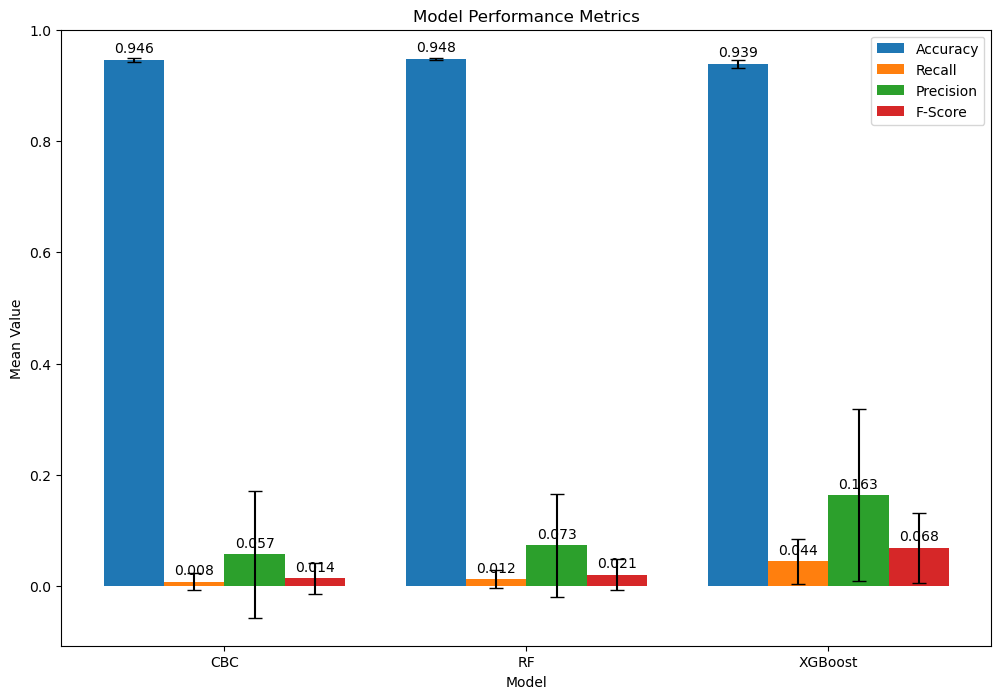

In [66]:
# Create empty lists to store results
model_names = []
accuracy_means = []
accuracy_std = []
recall_means = []
recall_std = []
precision_means = []
precision_std = []
f1_means = []
f1_std = []

# Your existing code
for name, regressor in models:
    cv = cross_validate(regressor, X, y, cv=5, scoring=["accuracy", "f1", "recall", "precision"])
    
    # Store means and standard deviations in the lists
    model_names.append(name)
    accuracy_means.append(cv["test_accuracy"].mean())
    accuracy_std.append(cv["test_accuracy"].std())
    recall_means.append(cv["test_recall"].mean())
    recall_std.append(cv["test_recall"].std())
    precision_means.append(cv["test_precision"].mean())
    precision_std.append(cv["test_precision"].std())
    f1_means.append(cv["test_f1"].mean())
    f1_std.append(cv["test_f1"].std())

# Plot a grouped bar chart with error bars and numeric values
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.2
index = np.arange(len(model_names))

bar1 = ax.bar(index - 1.5*bar_width, accuracy_means, bar_width, label='Accuracy', yerr=accuracy_std, capsize=5)
bar2 = ax.bar(index - 0.5*bar_width, recall_means, bar_width, label='Recall', yerr=recall_std, capsize=5)
bar3 = ax.bar(index + 0.5*bar_width, precision_means, bar_width, label='Precision', yerr=precision_std, capsize=5)
bar4 = ax.bar(index + 1.5*bar_width, f1_means, bar_width, label='F-Score', yerr=f1_std, capsize=5)

# Add numeric values on top of each bar
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

add_values(bar1)
add_values(bar2)
add_values(bar3)
add_values(bar4)

ax.set_xlabel('Model')
ax.set_ylabel('Mean Value')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

In [67]:
scaler = MinMaxScaler()
for col_name in new_df1.columns:
    if new_df1[col_name].nunique() > 5:
        new_df1[col_name] = scaler.fit_transform(new_df1[[col_name]])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

In [69]:
accuracy_test_values = []
accuracy_train_values = []

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

Learning rate set to 0.018793
0:	learn: 0.6601894	total: 2.8ms	remaining: 2.79s
1:	learn: 0.6344979	total: 5.35ms	remaining: 2.67s
2:	learn: 0.6098319	total: 7.48ms	remaining: 2.48s
3:	learn: 0.5860701	total: 9.96ms	remaining: 2.48s
4:	learn: 0.5650357	total: 13.2ms	remaining: 2.63s
5:	learn: 0.5439335	total: 16ms	remaining: 2.65s
6:	learn: 0.5211593	total: 19ms	remaining: 2.69s
7:	learn: 0.5022492	total: 22.1ms	remaining: 2.74s
8:	learn: 0.4789044	total: 24.5ms	remaining: 2.69s
9:	learn: 0.4597942	total: 27.3ms	remaining: 2.7s
10:	learn: 0.4422005	total: 30.2ms	remaining: 2.71s
11:	learn: 0.4273166	total: 32.7ms	remaining: 2.69s
12:	learn: 0.4142142	total: 35.1ms	remaining: 2.66s
13:	learn: 0.3969988	total: 37.6ms	remaining: 2.65s
14:	learn: 0.3835016	total: 40.2ms	remaining: 2.64s
15:	learn: 0.3714777	total: 42.3ms	remaining: 2.6s
16:	learn: 0.3604965	total: 44.7ms	remaining: 2.58s
17:	learn: 0.3498665	total: 47ms	remaining: 2.56s
18:	learn: 0.3405574	total: 49ms	remaining: 2.53s
19:

167:	learn: 0.1288995	total: 398ms	remaining: 1.97s
168:	learn: 0.1286859	total: 400ms	remaining: 1.97s
169:	learn: 0.1284729	total: 403ms	remaining: 1.97s
170:	learn: 0.1283686	total: 405ms	remaining: 1.96s
171:	learn: 0.1281995	total: 407ms	remaining: 1.96s
172:	learn: 0.1280363	total: 409ms	remaining: 1.96s
173:	learn: 0.1278967	total: 411ms	remaining: 1.95s
174:	learn: 0.1277691	total: 413ms	remaining: 1.95s
175:	learn: 0.1275565	total: 416ms	remaining: 1.95s
176:	learn: 0.1274294	total: 418ms	remaining: 1.94s
177:	learn: 0.1273110	total: 420ms	remaining: 1.94s
178:	learn: 0.1271462	total: 422ms	remaining: 1.94s
179:	learn: 0.1270113	total: 425ms	remaining: 1.93s
180:	learn: 0.1268700	total: 427ms	remaining: 1.93s
181:	learn: 0.1266763	total: 429ms	remaining: 1.93s
182:	learn: 0.1265416	total: 431ms	remaining: 1.93s
183:	learn: 0.1264737	total: 433ms	remaining: 1.92s
184:	learn: 0.1263832	total: 436ms	remaining: 1.92s
185:	learn: 0.1262182	total: 438ms	remaining: 1.92s
186:	learn: 

344:	learn: 0.1074401	total: 791ms	remaining: 1.5s
345:	learn: 0.1072964	total: 793ms	remaining: 1.5s
346:	learn: 0.1071912	total: 795ms	remaining: 1.5s
347:	learn: 0.1070596	total: 797ms	remaining: 1.49s
348:	learn: 0.1069240	total: 800ms	remaining: 1.49s
349:	learn: 0.1068374	total: 802ms	remaining: 1.49s
350:	learn: 0.1067244	total: 804ms	remaining: 1.49s
351:	learn: 0.1066410	total: 806ms	remaining: 1.48s
352:	learn: 0.1065904	total: 808ms	remaining: 1.48s
353:	learn: 0.1064908	total: 810ms	remaining: 1.48s
354:	learn: 0.1064462	total: 813ms	remaining: 1.48s
355:	learn: 0.1063096	total: 815ms	remaining: 1.47s
356:	learn: 0.1061716	total: 817ms	remaining: 1.47s
357:	learn: 0.1060897	total: 819ms	remaining: 1.47s
358:	learn: 0.1059486	total: 822ms	remaining: 1.47s
359:	learn: 0.1058655	total: 824ms	remaining: 1.46s
360:	learn: 0.1057950	total: 826ms	remaining: 1.46s
361:	learn: 0.1056997	total: 828ms	remaining: 1.46s
362:	learn: 0.1056021	total: 830ms	remaining: 1.46s
363:	learn: 0.1

517:	learn: 0.0918673	total: 1.18s	remaining: 1.1s
518:	learn: 0.0917777	total: 1.18s	remaining: 1.1s
519:	learn: 0.0917287	total: 1.19s	remaining: 1.09s
520:	learn: 0.0916135	total: 1.19s	remaining: 1.09s
521:	learn: 0.0915274	total: 1.19s	remaining: 1.09s
522:	learn: 0.0914475	total: 1.19s	remaining: 1.09s
523:	learn: 0.0913856	total: 1.19s	remaining: 1.08s
524:	learn: 0.0912726	total: 1.2s	remaining: 1.08s
525:	learn: 0.0912249	total: 1.2s	remaining: 1.08s
526:	learn: 0.0911433	total: 1.2s	remaining: 1.08s
527:	learn: 0.0911209	total: 1.2s	remaining: 1.07s
528:	learn: 0.0910379	total: 1.21s	remaining: 1.07s
529:	learn: 0.0909553	total: 1.21s	remaining: 1.07s
530:	learn: 0.0908735	total: 1.21s	remaining: 1.07s
531:	learn: 0.0907903	total: 1.21s	remaining: 1.07s
532:	learn: 0.0907225	total: 1.21s	remaining: 1.06s
533:	learn: 0.0906391	total: 1.22s	remaining: 1.06s
534:	learn: 0.0905702	total: 1.22s	remaining: 1.06s
535:	learn: 0.0904737	total: 1.22s	remaining: 1.06s
536:	learn: 0.0904

688:	learn: 0.0808782	total: 1.57s	remaining: 708ms
689:	learn: 0.0807802	total: 1.57s	remaining: 705ms
690:	learn: 0.0807094	total: 1.57s	remaining: 703ms
691:	learn: 0.0806366	total: 1.57s	remaining: 701ms
692:	learn: 0.0805831	total: 1.58s	remaining: 698ms
693:	learn: 0.0805136	total: 1.58s	remaining: 696ms
694:	learn: 0.0804918	total: 1.58s	remaining: 694ms
695:	learn: 0.0804215	total: 1.58s	remaining: 692ms
696:	learn: 0.0803749	total: 1.58s	remaining: 689ms
697:	learn: 0.0803082	total: 1.59s	remaining: 687ms
698:	learn: 0.0801832	total: 1.59s	remaining: 685ms
699:	learn: 0.0801414	total: 1.59s	remaining: 683ms
700:	learn: 0.0800768	total: 1.59s	remaining: 680ms
701:	learn: 0.0800425	total: 1.6s	remaining: 678ms
702:	learn: 0.0800017	total: 1.6s	remaining: 676ms
703:	learn: 0.0799615	total: 1.6s	remaining: 673ms
704:	learn: 0.0798811	total: 1.6s	remaining: 671ms
705:	learn: 0.0798492	total: 1.6s	remaining: 669ms
706:	learn: 0.0798204	total: 1.61s	remaining: 666ms
707:	learn: 0.079

861:	learn: 0.0719967	total: 1.96s	remaining: 314ms
862:	learn: 0.0719448	total: 1.96s	remaining: 311ms
863:	learn: 0.0718892	total: 1.96s	remaining: 309ms
864:	learn: 0.0718346	total: 1.97s	remaining: 307ms
865:	learn: 0.0718247	total: 1.97s	remaining: 305ms
866:	learn: 0.0717862	total: 1.97s	remaining: 302ms
867:	learn: 0.0717481	total: 1.97s	remaining: 300ms
868:	learn: 0.0717256	total: 1.98s	remaining: 298ms
869:	learn: 0.0716643	total: 1.98s	remaining: 296ms
870:	learn: 0.0716179	total: 1.98s	remaining: 293ms
871:	learn: 0.0715631	total: 1.98s	remaining: 291ms
872:	learn: 0.0715279	total: 1.99s	remaining: 289ms
873:	learn: 0.0714710	total: 1.99s	remaining: 287ms
874:	learn: 0.0714213	total: 1.99s	remaining: 284ms
875:	learn: 0.0713491	total: 1.99s	remaining: 282ms
876:	learn: 0.0713235	total: 1.99s	remaining: 280ms
877:	learn: 0.0712652	total: 2s	remaining: 278ms
878:	learn: 0.0712416	total: 2s	remaining: 275ms
879:	learn: 0.0712294	total: 2s	remaining: 273ms
880:	learn: 0.0711815

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Train Accuracy: 97.53%


Text(0.5, 1.0, 'CBC Train Confusion Matrix')

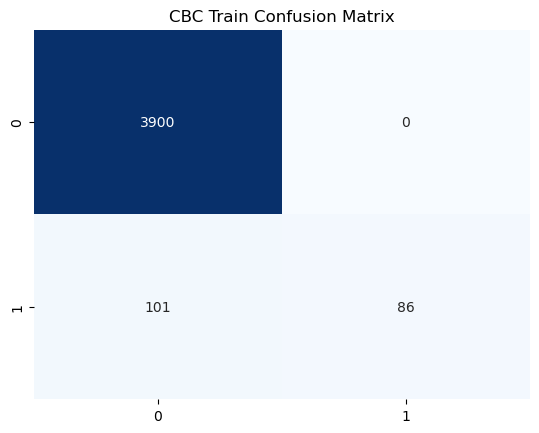

In [70]:
y_pred = cbc.predict(X_test)
y_pred_train = cbc.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
cbc_accuracy_train = round(accuracy_score(y_train, y_pred_train)* 100,2)
print(f"Train Accuracy: {cbc_accuracy_train}%")

accuracy_train_values.append(cbc_accuracy_train)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('CBC Train Confusion Matrix')

Accuracy for test :  93.64  %


Text(0.5, 1.0, 'CBC Test Confusion Matrix')

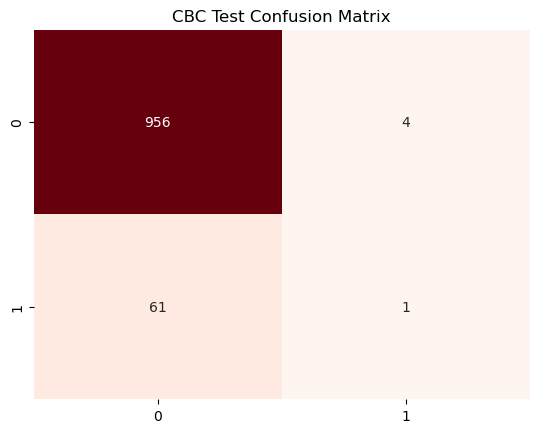

In [71]:
y_pred = cbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cbc_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy for test : ' , cbc_test_acc,' %')

accuracy_test_values.append(cbc_test_acc)
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('CBC Test Confusion Matrix')

Learning rate set to 0.018793
0:	learn: 0.6601894	total: 2.47ms	remaining: 2.47s
1:	learn: 0.6344979	total: 5.21ms	remaining: 2.6s
2:	learn: 0.6098319	total: 6.87ms	remaining: 2.28s
3:	learn: 0.5860701	total: 8.51ms	remaining: 2.12s
4:	learn: 0.5650357	total: 10.7ms	remaining: 2.12s
5:	learn: 0.5439335	total: 12.9ms	remaining: 2.15s
6:	learn: 0.5211593	total: 15.2ms	remaining: 2.16s
7:	learn: 0.5022492	total: 17.5ms	remaining: 2.16s
8:	learn: 0.4789044	total: 19.7ms	remaining: 2.17s
9:	learn: 0.4597942	total: 21.9ms	remaining: 2.17s
10:	learn: 0.4422005	total: 24.1ms	remaining: 2.16s
11:	learn: 0.4273166	total: 26.1ms	remaining: 2.15s
12:	learn: 0.4142142	total: 28.5ms	remaining: 2.17s
13:	learn: 0.3969988	total: 30.8ms	remaining: 2.17s
14:	learn: 0.3835016	total: 32.6ms	remaining: 2.14s
15:	learn: 0.3714777	total: 34.2ms	remaining: 2.1s
16:	learn: 0.3604965	total: 37ms	remaining: 2.14s
17:	learn: 0.3498665	total: 39.5ms	remaining: 2.15s
18:	learn: 0.3405574	total: 41.4ms	remaining: 2.

175:	learn: 0.1275565	total: 393ms	remaining: 1.84s
176:	learn: 0.1274294	total: 396ms	remaining: 1.84s
177:	learn: 0.1273110	total: 398ms	remaining: 1.84s
178:	learn: 0.1271462	total: 400ms	remaining: 1.83s
179:	learn: 0.1270113	total: 402ms	remaining: 1.83s
180:	learn: 0.1268700	total: 405ms	remaining: 1.83s
181:	learn: 0.1266763	total: 407ms	remaining: 1.83s
182:	learn: 0.1265416	total: 409ms	remaining: 1.83s
183:	learn: 0.1264737	total: 412ms	remaining: 1.82s
184:	learn: 0.1263832	total: 414ms	remaining: 1.82s
185:	learn: 0.1262182	total: 416ms	remaining: 1.82s
186:	learn: 0.1260141	total: 419ms	remaining: 1.82s
187:	learn: 0.1258374	total: 421ms	remaining: 1.82s
188:	learn: 0.1257348	total: 423ms	remaining: 1.81s
189:	learn: 0.1255354	total: 425ms	remaining: 1.81s
190:	learn: 0.1254489	total: 428ms	remaining: 1.81s
191:	learn: 0.1252981	total: 430ms	remaining: 1.81s
192:	learn: 0.1251264	total: 432ms	remaining: 1.81s
193:	learn: 0.1248887	total: 435ms	remaining: 1.81s
194:	learn: 

356:	learn: 0.1061716	total: 790ms	remaining: 1.42s
357:	learn: 0.1060897	total: 792ms	remaining: 1.42s
358:	learn: 0.1059486	total: 795ms	remaining: 1.42s
359:	learn: 0.1058655	total: 797ms	remaining: 1.42s
360:	learn: 0.1057950	total: 799ms	remaining: 1.41s
361:	learn: 0.1056997	total: 801ms	remaining: 1.41s
362:	learn: 0.1056021	total: 803ms	remaining: 1.41s
363:	learn: 0.1054846	total: 806ms	remaining: 1.41s
364:	learn: 0.1053941	total: 808ms	remaining: 1.41s
365:	learn: 0.1053393	total: 810ms	remaining: 1.4s
366:	learn: 0.1052181	total: 812ms	remaining: 1.4s
367:	learn: 0.1051042	total: 814ms	remaining: 1.4s
368:	learn: 0.1049995	total: 816ms	remaining: 1.4s
369:	learn: 0.1049285	total: 818ms	remaining: 1.39s
370:	learn: 0.1048528	total: 821ms	remaining: 1.39s
371:	learn: 0.1047562	total: 823ms	remaining: 1.39s
372:	learn: 0.1046515	total: 825ms	remaining: 1.39s
373:	learn: 0.1045830	total: 827ms	remaining: 1.38s
374:	learn: 0.1044321	total: 829ms	remaining: 1.38s
375:	learn: 0.10

536:	learn: 0.0904446	total: 1.19s	remaining: 1.03s
537:	learn: 0.0903710	total: 1.2s	remaining: 1.03s
538:	learn: 0.0903129	total: 1.2s	remaining: 1.02s
539:	learn: 0.0902183	total: 1.2s	remaining: 1.02s
540:	learn: 0.0901585	total: 1.2s	remaining: 1.02s
541:	learn: 0.0901160	total: 1.2s	remaining: 1.02s
542:	learn: 0.0900582	total: 1.21s	remaining: 1.01s
543:	learn: 0.0900189	total: 1.21s	remaining: 1.01s
544:	learn: 0.0899597	total: 1.21s	remaining: 1.01s
545:	learn: 0.0898949	total: 1.21s	remaining: 1.01s
546:	learn: 0.0898213	total: 1.21s	remaining: 1.01s
547:	learn: 0.0897469	total: 1.22s	remaining: 1s
548:	learn: 0.0896652	total: 1.22s	remaining: 1s
549:	learn: 0.0895581	total: 1.22s	remaining: 999ms
550:	learn: 0.0894882	total: 1.22s	remaining: 997ms
551:	learn: 0.0894333	total: 1.23s	remaining: 995ms
552:	learn: 0.0893664	total: 1.23s	remaining: 993ms
553:	learn: 0.0892686	total: 1.23s	remaining: 990ms
554:	learn: 0.0892545	total: 1.23s	remaining: 988ms
555:	learn: 0.0891751	t

709:	learn: 0.0796439	total: 1.58s	remaining: 646ms
710:	learn: 0.0796003	total: 1.58s	remaining: 644ms
711:	learn: 0.0795520	total: 1.58s	remaining: 642ms
712:	learn: 0.0794899	total: 1.59s	remaining: 639ms
713:	learn: 0.0794380	total: 1.59s	remaining: 637ms
714:	learn: 0.0793795	total: 1.59s	remaining: 635ms
715:	learn: 0.0793130	total: 1.59s	remaining: 632ms
716:	learn: 0.0792735	total: 1.6s	remaining: 630ms
717:	learn: 0.0792323	total: 1.6s	remaining: 628ms
718:	learn: 0.0792054	total: 1.6s	remaining: 626ms
719:	learn: 0.0791467	total: 1.6s	remaining: 623ms
720:	learn: 0.0791176	total: 1.6s	remaining: 621ms
721:	learn: 0.0790607	total: 1.61s	remaining: 619ms
722:	learn: 0.0789983	total: 1.61s	remaining: 617ms
723:	learn: 0.0789413	total: 1.61s	remaining: 615ms
724:	learn: 0.0788963	total: 1.61s	remaining: 612ms
725:	learn: 0.0788342	total: 1.62s	remaining: 610ms
726:	learn: 0.0787793	total: 1.62s	remaining: 608ms
727:	learn: 0.0787411	total: 1.62s	remaining: 606ms
728:	learn: 0.078

879:	learn: 0.0712294	total: 1.97s	remaining: 269ms
880:	learn: 0.0711815	total: 1.97s	remaining: 266ms
881:	learn: 0.0711445	total: 1.97s	remaining: 264ms
882:	learn: 0.0710913	total: 1.98s	remaining: 262ms
883:	learn: 0.0710575	total: 1.98s	remaining: 260ms
884:	learn: 0.0709667	total: 1.98s	remaining: 257ms
885:	learn: 0.0709031	total: 1.98s	remaining: 255ms
886:	learn: 0.0708415	total: 1.99s	remaining: 253ms
887:	learn: 0.0707850	total: 1.99s	remaining: 251ms
888:	learn: 0.0707456	total: 1.99s	remaining: 249ms
889:	learn: 0.0707229	total: 1.99s	remaining: 246ms
890:	learn: 0.0707004	total: 2s	remaining: 244ms
891:	learn: 0.0706433	total: 2s	remaining: 242ms
892:	learn: 0.0705982	total: 2s	remaining: 240ms
893:	learn: 0.0705387	total: 2s	remaining: 237ms
894:	learn: 0.0705030	total: 2s	remaining: 235ms
895:	learn: 0.0704523	total: 2s	remaining: 233ms
896:	learn: 0.0704166	total: 2.01s	remaining: 231ms
897:	learn: 0.0703656	total: 2.01s	remaining: 228ms
898:	learn: 0.0703077	total: 2

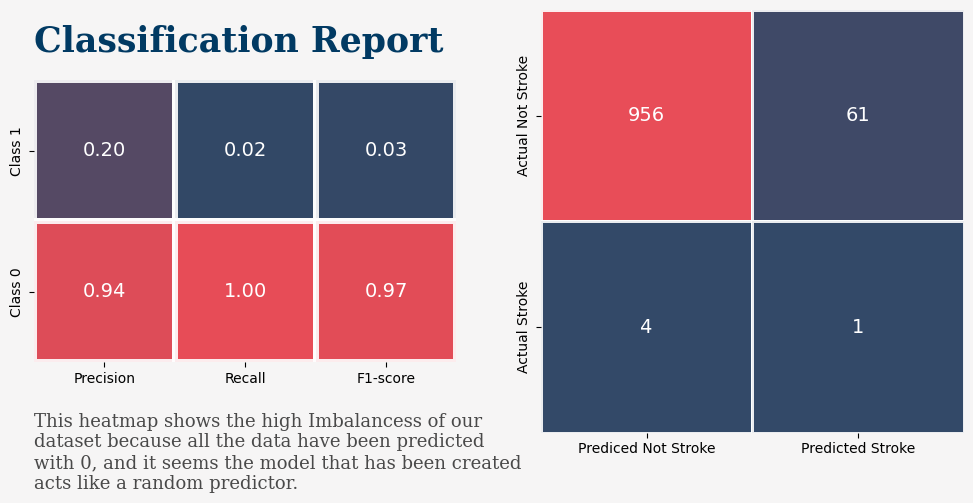

In [72]:
import matplotlib.colors

best_dt_model = CatBoostClassifier()
best_dt_model.fit(X_train, y_train)

fig = plt.figure(figsize=(12,6), dpi=100)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax0.text(0, -0.2, "Classification Report", {'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})

y_hat = best_dt_model.predict(X_test)
precision = precision_score(y_test, y_hat, average=None)
recall = recall_score(y_test, y_hat, average=None)
f1 = f1_score(y_test, y_hat, average=None)

class0 = [precision[0], recall[0], f1[0]]
class1 = [precision[1], recall[1], f1[1]]

data = [class1, class0]

conf_class0 = confusion_matrix(y_hat, y_test)[0]
conf_class1 = confusion_matrix(y_hat, y_test)[1]
conf_data = [conf_class0, conf_class1]

labels = ['Precision', 'Recall', 'F1-score']
classes = ['Class 1', 'Class 0']

col1 = ["#1d3557", "#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

sns.heatmap(ax=ax0, data=data, linewidths=3,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.2f',
            yticklabels=classes, xticklabels=labels, annot_kws={"fontsize": 14}, alpha=0.9)

sns.heatmap(ax=ax1, data=conf_data, linewidths=2,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.0f',
            yticklabels=['Actual Not Stroke', 'Actual Stroke'], xticklabels=['Prediced Not Stroke', 'Predicted Stroke'], annot_kws={"fontsize": 14}, alpha=0.9)

ax0.text(0, 2.90, "This heatmap shows the high Imbalancess of our\ndataset because all the data have been predicted\nwith 0, and it seems the model that has been created\nacts like a random predictor.",  {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
plt.show()


Train Accuracy: 99.98%


Text(0.5, 1.0, 'RFC Train Confusion Matrix')

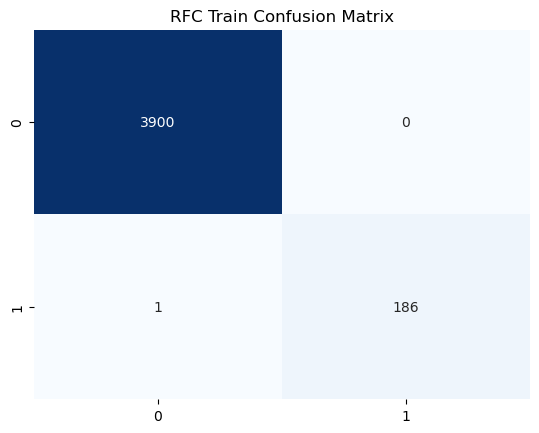

In [73]:
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
rfc_accuracy_train = round(accuracy_score(y_train, y_pred_train)* 100,2)
print(f"Train Accuracy: {rfc_accuracy_train }%")

accuracy_train_values.append(rfc_accuracy_train)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('RFC Train Confusion Matrix')

Accuracy for test :  93.74  %


Text(0.5, 1.0, 'RFC Test Confusion Matrix')

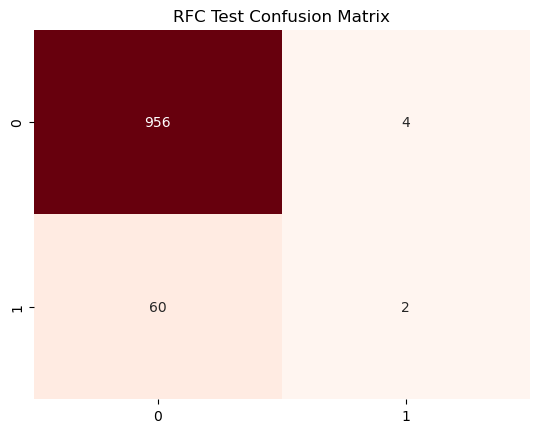

In [74]:
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
rfc_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy for test : ' , rfc_test_acc,' %')

accuracy_test_values.append(rfc_test_acc)
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('RFC Test Confusion Matrix')

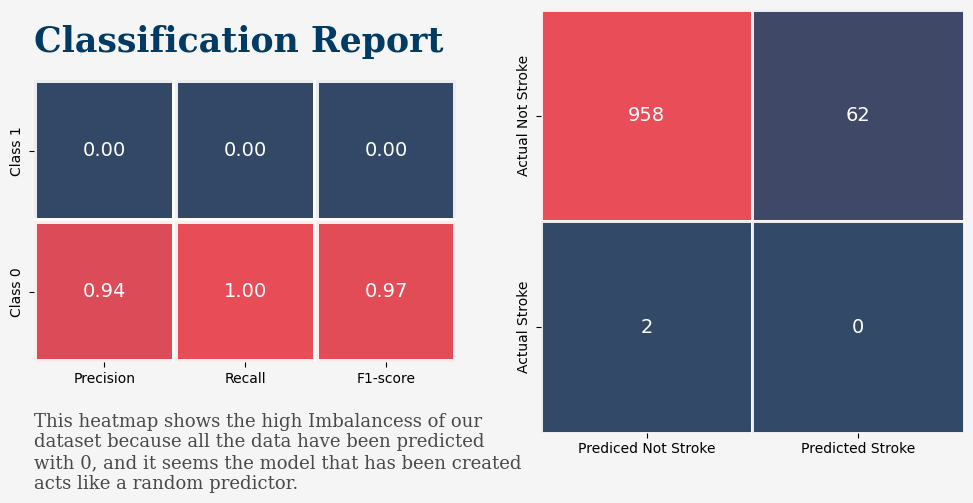

In [75]:
import matplotlib.colors

best_dt_model = RandomForestClassifier()
best_dt_model.fit(X_train, y_train)

fig = plt.figure(figsize=(12,6), dpi=100)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax0.text(0, -0.2, "Classification Report", {'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})

y_hat = best_dt_model.predict(X_test)
precision = precision_score(y_test, y_hat, average=None)
recall = recall_score(y_test, y_hat, average=None)
f1 = f1_score(y_test, y_hat, average=None)

class0 = [precision[0], recall[0], f1[0]]
class1 = [precision[1], recall[1], f1[1]]

data = [class1, class0]

conf_class0 = confusion_matrix(y_hat, y_test)[0]
conf_class1 = confusion_matrix(y_hat, y_test)[1]
conf_data = [conf_class0, conf_class1]

labels = ['Precision', 'Recall', 'F1-score']
classes = ['Class 1', 'Class 0']

col1 = ["#1d3557", "#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

sns.heatmap(ax=ax0, data=data, linewidths=3,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.2f',
            yticklabels=classes, xticklabels=labels, annot_kws={"fontsize": 14}, alpha=0.9)

sns.heatmap(ax=ax1, data=conf_data, linewidths=2,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.0f',
            yticklabels=['Actual Not Stroke', 'Actual Stroke'], xticklabels=['Prediced Not Stroke', 'Predicted Stroke'], annot_kws={"fontsize": 14}, alpha=0.9)

ax0.text(0, 2.90, "This heatmap shows the high Imbalancess of our\ndataset because all the data have been predicted\nwith 0, and it seems the model that has been created\nacts like a random predictor.",  {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
plt.show()


Train Accuracy: 99.68%


Text(0.5, 1.0, 'XGB Train Confusion Matrix')

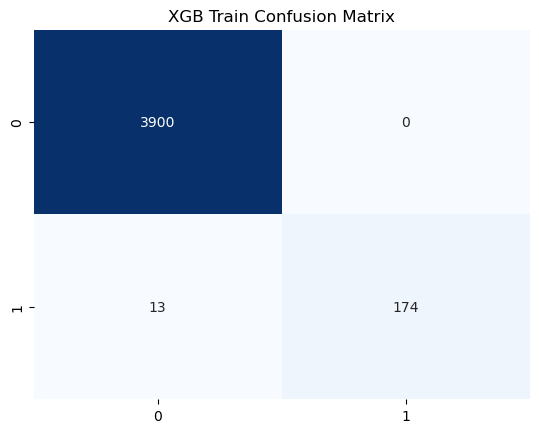

In [76]:
y_pred = xgb.predict(X_test)
y_pred_train = xgb.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
xgb_accuracy_train = round(accuracy_score(y_train, y_pred_train)* 100,2)
print(f"Train Accuracy: {xgb_accuracy_train}%")

accuracy_train_values.append(xgb_accuracy_train)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('XGB Train Confusion Matrix')

Accuracy for test :  93.35  %


Text(0.5, 1.0, 'XGB Test Confusion Matrix')

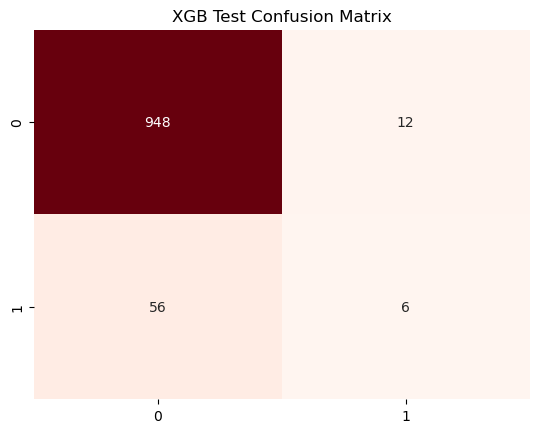

In [77]:
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
xgb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Accuracy for test : ' , xgb_test_acc,' %')

accuracy_test_values.append(xgb_test_acc)
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False,)
plt.title('XGB Test Confusion Matrix')

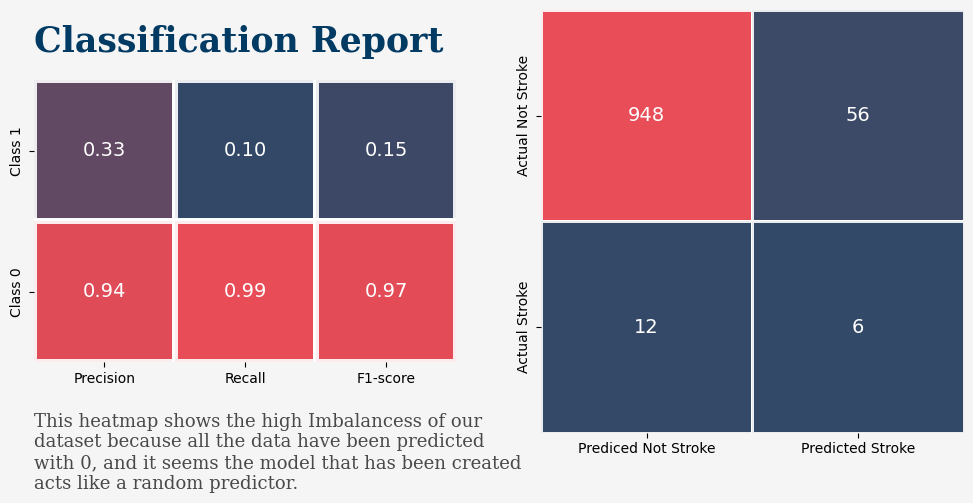

In [78]:


best_dt_model = XGBClassifier()
best_dt_model.fit(X_train, y_train)

fig = plt.figure(figsize=(12,6), dpi=100)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax0.text(0, -0.2, "Classification Report", {'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})

y_hat = best_dt_model.predict(X_test)
precision = precision_score(y_test, y_hat, average=None)
recall = recall_score(y_test, y_hat, average=None)
f1 = f1_score(y_test, y_hat, average=None)

class0 = [precision[0], recall[0], f1[0]]
class1 = [precision[1], recall[1], f1[1]]

data = [class1, class0]

conf_class0 = confusion_matrix(y_hat, y_test)[0]
conf_class1 = confusion_matrix(y_hat, y_test)[1]
conf_data = [conf_class0, conf_class1]

labels = ['Precision', 'Recall', 'F1-score']
classes = ['Class 1', 'Class 0']

col1 = ["#1d3557", "#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

sns.heatmap(ax=ax0, data=data, linewidths=3,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.2f',
            yticklabels=classes, xticklabels=labels, annot_kws={"fontsize": 14}, alpha=0.9)

sns.heatmap(ax=ax1, data=conf_data, linewidths=2,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.0f',
            yticklabels=['Actual Not Stroke', 'Actual Stroke'], xticklabels=['Prediced Not Stroke', 'Predicted Stroke'], annot_kws={"fontsize": 14}, alpha=0.9)

ax0.text(0, 2.90, "This heatmap shows the high Imbalancess of our\ndataset because all the data have been predicted\nwith 0, and it seems the model that has been created\nacts like a random predictor.",  {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
plt.show()


In [79]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    "Model": model_names,
    "accuracy_test_values": accuracy_test_values,
    "accuracy_train_values":accuracy_train_values
})

# Display the DataFrame
print(results_df)

     Model  accuracy_test_values  accuracy_train_values
0      CBC                 93.64                  97.53
1       RF                 93.74                  99.98
2  XGBoost                 93.35                  99.68


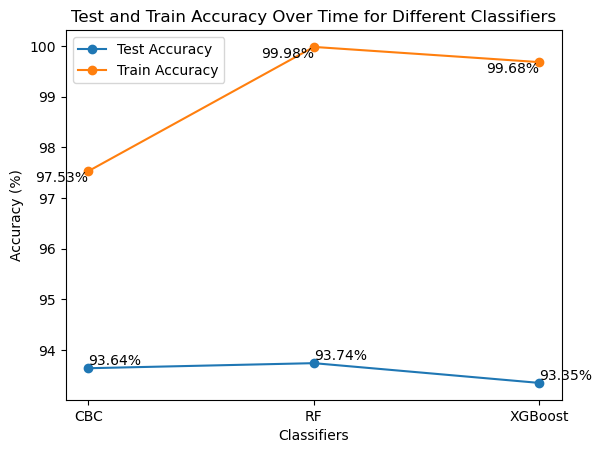

In [80]:
# Classifiers
classifiers = results_df["Model"].tolist()

# Extracting accuracy values from the DataFrame
accuracy_test_values = results_df["accuracy_test_values"].tolist()
accuracy_train_values = results_df["accuracy_train_values"].tolist()

# Generate x-axis values
epochs = range(1, len(classifiers) + 1)

# Plotting the accuracy values
plt.plot(epochs, accuracy_test_values, label='Test Accuracy', marker='o')
plt.plot(epochs, accuracy_train_values, label='Train Accuracy', marker='o')

# Adding labels and title
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Test and Train Accuracy Over Time for Different Classifiers')

# Adding values for each point on the plot
for i, (test_acc, train_acc) in enumerate(zip(accuracy_test_values, accuracy_train_values)):
    plt.text(epochs[i], test_acc, f'{test_acc:.2f}%', ha='left', va='bottom')
    plt.text(epochs[i], train_acc, f'{train_acc:.2f}%', ha='right', va='top')

# Set x-axis ticks and labels
plt.xticks(epochs, classifiers)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

                           Feature  Importance
6           work_type_Never_worked    0.000005
9               work_type_children    0.001280
5               work_type_Govt_job    0.015294
15           smoking_status_smokes    0.018760
3                    gender_Female    0.019143
12          smoking_status_Unknown    0.019604
13  smoking_status_formerly smoked    0.020106
10            Residence_type_Rural    0.020472
8          work_type_Self-employed    0.020981
2                     ever_married    0.021711
4                      gender_Male    0.022701
14     smoking_status_never smoked    0.022787
11            Residence_type_Urban    0.022947
7                work_type_Private    0.023528
1                    heart_disease    0.028963
0                     hypertension    0.029716
17    avg_glucose_level_winsorized    0.193779
18                  bmi_winsorized    0.246773
16                  Age_winsorized    0.251448


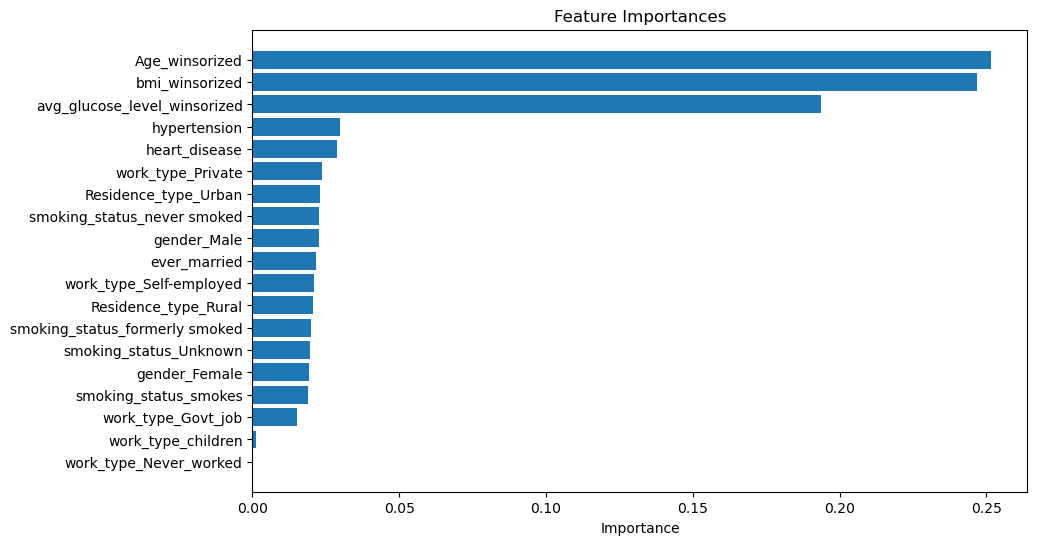

In [81]:
# Create a DataFrame to pair features with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rfc.feature_importances_})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Print or visualize feature importances
print(feature_importance_df)

# Visualize feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [82]:
#Since the Random Forest Classifier is the highest accuracy in average , it will be selected by us
#Model Loop
#Grid Search
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
grid = {
    "max_depth" : [None] + [int(x) for x in (np.logspace(2, 5, 5, base = 2))],
    "max_features" : [None, "sqrt", "log2"] + [int(x) for x in (np.logspace(0, 5, 5, base = 2))],
}
#Random Forest
gsc_dt = GridSearchCV(RandomForestClassifier(n_estimators = 1000), grid, cv=5, n_jobs = -1, verbose=1).fit(X, y)
best_dt_model = RandomForestClassifier(**gsc_dt.best_params_)
best_dt_model.fit(train_x, train_y)
print("Test Error : ", best_dt_model.score(test_x, test_y), " Train Error : ", best_dt_model.score(train_x, train_y))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Test Error :  0.9393346379647749  Train Error :  0.9542451676046


In [84]:
#Evaluation
best_dt_model = RandomForestClassifier()
best_dt_model.fit(train_x, train_y)
print("Test Error : ", best_dt_model.score(test_x, test_y), " Train Error : ", best_dt_model.score(train_x, train_y))

Test Error :  0.9383561643835616  Train Error :  1.0


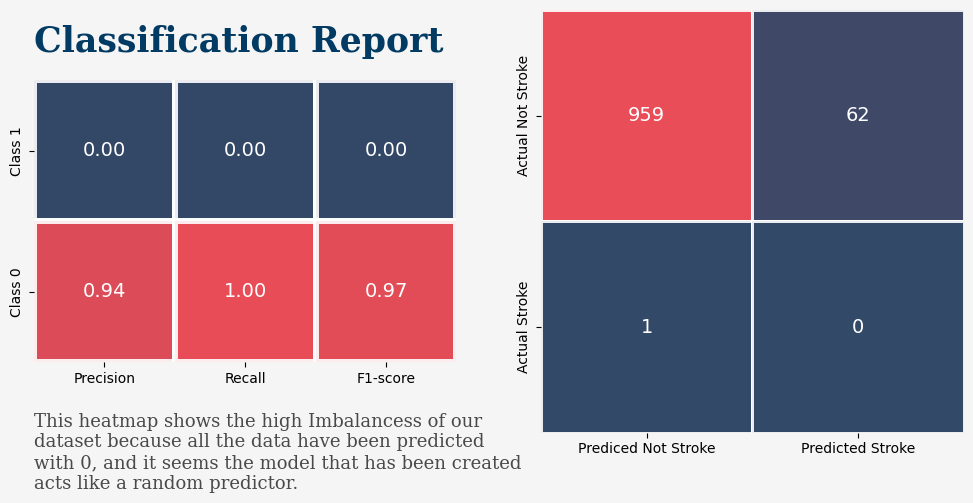

In [85]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from sklearn.metrics import confusion_matrix
fig = plt.figure(figsize=(12,6), dpi=100)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax0.text(0, -0.2, "Classification Report", {'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})

y_hat = best_dt_model.predict(test_x)
precision = precision_score(test_y, y_hat, average=None)
recall = recall_score(test_y, y_hat, average=None)
f1 = f1_score(test_y, y_hat, average=None)

class0 = [precision[0], recall[0], f1[0]]
class1 = [precision[1], recall[1], f1[1]]

data = [class1, class0]

conf_class0 = confusion_matrix(y_hat, test_y)[0]
conf_class1 = confusion_matrix(y_hat, test_y)[1]
conf_data = [conf_class0, conf_class1]

labels = ['Precision', 'Recall', 'F1-score']
classes = ['Class 1', 'Class 0']

col1 = ["#1d3557", "#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

sns.heatmap(ax=ax0, data=data, linewidths=3,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.2f',
            yticklabels=classes, xticklabels=labels, annot_kws={"fontsize": 14}, alpha=0.9)

sns.heatmap(ax=ax1, data=conf_data, linewidths=2,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.0f',
            yticklabels=['Actual Not Stroke', 'Actual Stroke'], xticklabels=['Prediced Not Stroke', 'Predicted Stroke'], annot_kws={"fontsize": 14}, alpha=0.9)

ax0.text(0, 2.90, "This heatmap shows the high Imbalancess of our\ndataset because all the data have been predicted\nwith 0, and it seems the model that has been created\nacts like a random predictor.",  {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
plt.show()


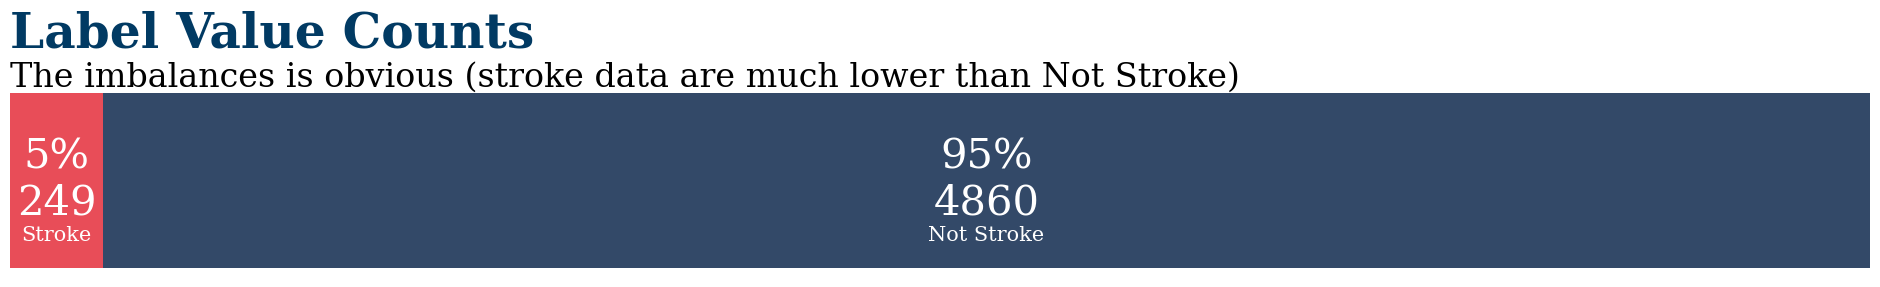

In [86]:
df_t = df.copy()
df_t["stroke"] = df_t["stroke"].replace([1, 0], ["Stroke", "Not Stroke"])
x=df_t.groupby(['stroke'])['stroke'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
fig, ax = plt.subplots(1,1,figsize=(24, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Stroke'], 
        color="#e63946", alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['Not Stroke'], left=mf_ratio['Stroke'], 
        color='#1d3557', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Stroke'][i]*100)}%\n{x['Stroke']}", 
                   xy=(mf_ratio['Stroke'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Stroke", 
                   xy=(mf_ratio['Stroke'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Not Stroke'][i]*100)}%\n{x['Not Stroke']}", 
                   xy=(mf_ratio['Stroke'][i]+mf_ratio['Not Stroke'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Not Stroke", 
                   xy=(mf_ratio['Stroke'][i]+mf_ratio['Not Stroke'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


# Title & Subtitle
fig.text(0.125,1.03,'Label Value Counts', fontfamily='serif',fontsize=35, fontweight='bold', color="#013a63")
fig.text(0.125,0.87,'The imbalances is obvious (stroke data are much lower than Not Stroke)',fontfamily='serif',fontsize=24)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)
plt.show()

In [87]:
# Imbalancing
class_0_len, class_1_len = new_df1["stroke"].value_counts()

class_0_df = new_df1[new_df1["stroke"] == 0]
class_1_df = new_df1[new_df1["stroke"] == 1]

In [88]:
#6.1 UnderSampling
class_0_sample_df = class_0_df.sample(class_1_len)

undersample_df = pd.concat([class_0_sample_df, class_1_df], axis = 0)
undersample_df = undersample_df.sample(frac=1).reset_index(drop=True)

undersample_df.head()

hypertension  heart_disease  ever_married  stroke  gender_Female  \
0             0              1             1       1          False   
1             1              1             1       0          False   
2             0              0             0       1           True   
3             1              0             1       1           True   
4             0              0             0       0           True   

   gender_Male  work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0         True                True                   False              False   
1         True               False                   False              False   
2        False               False                   False               True   
3        False               False                   False              False   
4        False                True                   False              False   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                    False               False                  True   
1                     True               False                 False   
2                    False               False                  True   
3                     True               False                 False   
4                    False               False                  True   

   Residence_type_Urban  smoking_status_Unknown  \
0                 False                   False   
1                  True                   False   
2                 False                   False   
3                  True                   False   
4                 False                   False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                         True   
1                           False                        False   
2                           False                         True   
3                           False                         True   
4                           False                         True   

   smoking_status_smokes  Age_winsorized  avg_glucose_level_winsorized  \
0                  False        0.918919                      1.000000   
1                   True        0.972973                      0.286221   
2                  False        1.000000                      0.374972   
3                  False        0.972973                      0.765587   
4                  False        0.324324                      0.704349   

   bmi_winsorized  
0           0.436  
1           0.448  
2           0.208  
3           0.548  
4           0.352

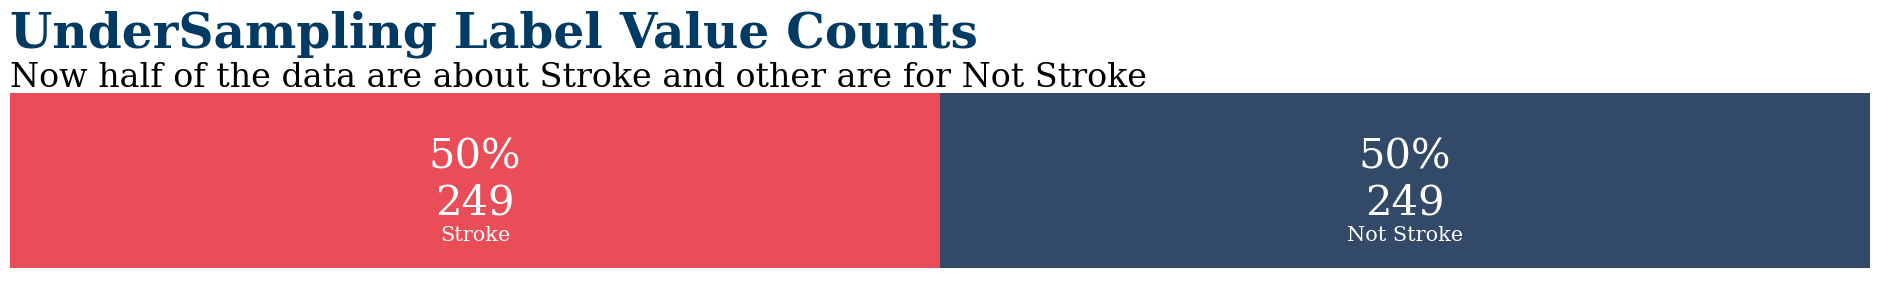

In [89]:
df_t = undersample_df.copy()
df_t["stroke"] = df_t["stroke"].replace([1, 0], ["Stroke", "Not Stroke"])
x=df_t.groupby(['stroke'])['stroke'].count()
y=len(df_t)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
fig, ax = plt.subplots(1,1,figsize=(24, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Stroke'], 
        color="#e63946", alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['Not Stroke'], left=mf_ratio['Stroke'], 
        color='#1d3557', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Stroke'][i]*100)}%\n{x['Stroke']}", 
                   xy=(mf_ratio['Stroke'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Stroke", 
                   xy=(mf_ratio['Stroke'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Not Stroke'][i]*100)}%\n{x['Not Stroke']}", 
                   xy=(mf_ratio['Stroke'][i]+mf_ratio['Not Stroke'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Not Stroke", 
                   xy=(mf_ratio['Stroke'][i]+mf_ratio['Not Stroke'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


# Title & Subtitle
fig.text(0.125,1.03,'UnderSampling Label Value Counts', fontfamily='serif',fontsize=35, fontweight='bold', color="#013a63")
fig.text(0.125,0.87,'Now half of the data are about Stroke and other are for Not Stroke',fontfamily='serif',fontsize=24)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)
plt.show()

In [90]:
train_x_under, test_x_under, train_y_under, test_y_under = train_test_split(undersample_df.drop(["stroke"], axis = 1), undersample_df["stroke"], test_size = 0.2, random_state = 42, stratify=undersample_df["stroke"])

In [91]:
under_model = RandomForestClassifier(**gsc_dt.best_params_)
under_model.fit(train_x_under, train_y_under)
print("Test Error : ", under_model.score(test_x_under, test_y_under), " Train Error : ", under_model.score(train_x_under, train_y_under))

Test Error :  0.77  Train Error :  0.8341708542713567


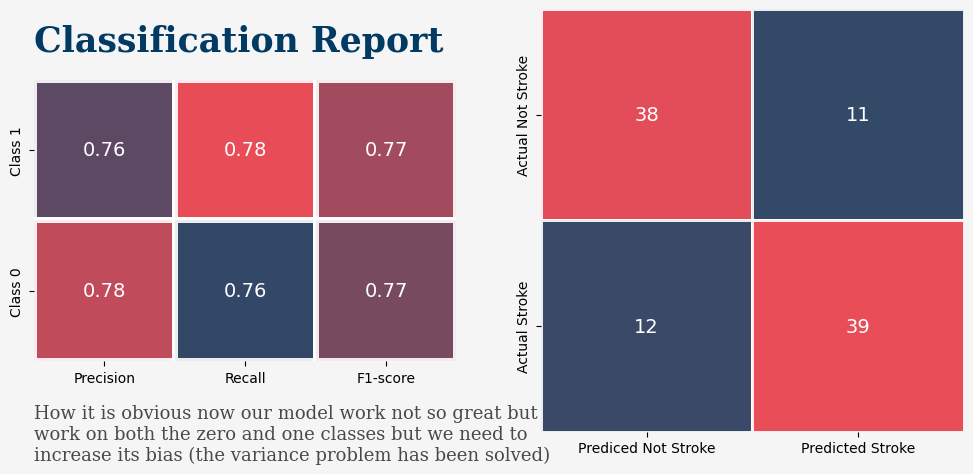

In [92]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

fig = plt.figure(figsize=(12,6), dpi=100)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax0.text(0, -0.2, "Classification Report", {'font': 'Serif', 'fontsize': '25','weight':'bold', 'color':"#013a63"})

y_hat = under_model.predict(test_x_under)
precision = precision_score(test_y_under, y_hat, average=None)
recall = recall_score(test_y_under, y_hat, average=None)
f1 = f1_score(test_y_under, y_hat, average=None)

class0 = [precision[0], recall[0], f1[0]]
class1 = [precision[1], recall[1], f1[1]]

data = [class1, class0]

conf_class0 = confusion_matrix(y_hat, test_y_under)[0]
conf_class1 = confusion_matrix(y_hat, test_y_under)[1]
conf_data = [conf_class0, conf_class1]

labels = ['Precision', 'Recall', 'F1-score']
classes = ['Class 1', 'Class 0']

col1 = ["#1d3557", "#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

sns.heatmap(ax=ax0, data=data, linewidths=3,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.2f',
            yticklabels=classes, xticklabels=labels, annot_kws={"fontsize": 14}, alpha=0.9)

sns.heatmap(ax=ax1, data=conf_data, linewidths=2,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.0f',
            yticklabels=['Actual Not Stroke', 'Actual Stroke'], xticklabels=['Prediced Not Stroke', 'Predicted Stroke'], annot_kws={"fontsize": 14}, alpha=0.9)

ax0.text(0, 2.70, "How it is obvious now our model work not so great but\nwork on both the zero and one classes but we need to\nincrease its bias (the variance problem has been solved)",  {'font': 'Serif', 'fontsize': '13','weight':'normal', 'color':"black"}, alpha = 0.7)
plt.show()


In [93]:
#6.2 OverSampling
class_1_sample_df = class_1_df.sample(class_0_len, replace = True)

oversample_df = pd.concat([class_1_sample_df, class_0_df], axis = 0)
oversample_df = oversample_df.sample(frac=1).reset_index(drop=True)

print(oversample_df.shape)
oversample_df.head()

(9720, 20)


hypertension  heart_disease  ever_married  stroke  gender_Female  \
0             0              1             1       1           True   
1             0              0             0       0          False   
2             1              1             0       1          False   
3             0              0             0       0           True   
4             0              0             1       0          False   

   gender_Male  work_type_Govt_job  work_type_Never_worked  work_type_Private  \
0        False               False                   False               True   
1         True               False                   False              False   
2         True                True                   False              False   
3        False               False                   False               True   
4         True               False                   False               True   

   work_type_Self-employed  work_type_children  Residence_type_Rural  \
0                    False               False                  True   
1                    False                True                 False   
2                    False               False                  True   
3                    False               False                  True   
4                    False               False                 False   

   Residence_type_Urban  smoking_status_Unknown  \
0                 False                   False   
1                  True                    True   
2                 False                   False   
3                 False                   False   
4                  True                   False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                         True   
1                           False                        False   
2                           False                         True   
3                           False                         True   
4                           False                         True   

   smoking_status_smokes  Age_winsorized  avg_glucose_level_winsorized  \
0                  False        1.000000                      0.800643   
1                  False        0.081081                      0.411027   
2                  False        0.891892                      1.000000   
3                  False        0.216216                      0.048813   
4                  False        0.554054                      0.916907   

   bmi_winsorized  
0           0.400  
1           0.072  
2           0.528  
3           0.640  
4           0.464

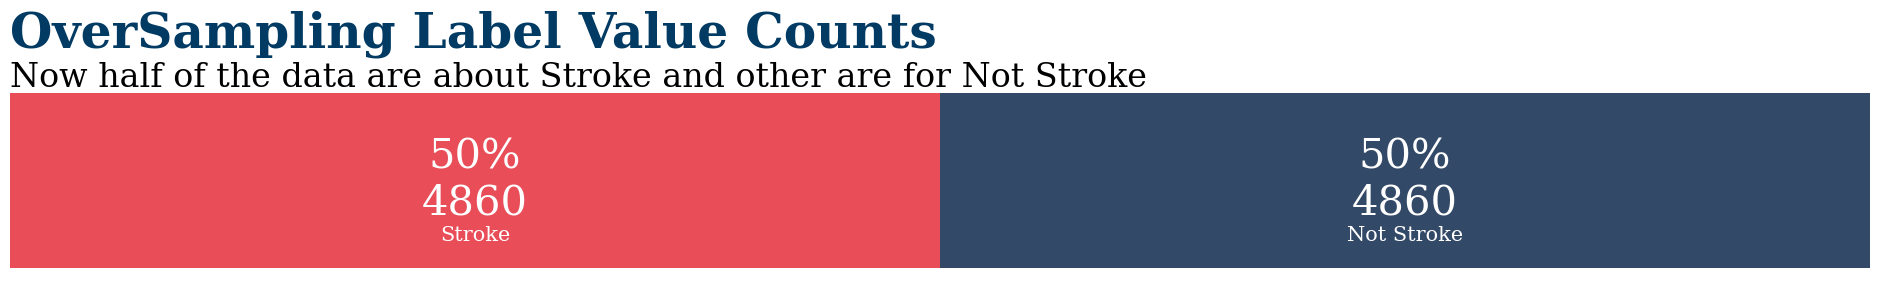

In [94]:
df_t = oversample_df.copy()
df_t["stroke"] = df_t["stroke"].replace([1, 0], ["Stroke", "Not Stroke"])
x=df_t.groupby(['stroke'])['stroke'].count()
y=len(df_t)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T
fig, ax = plt.subplots(1,1,figsize=(24, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Stroke'], 
        color="#e63946", alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['Not Stroke'], left=mf_ratio['Stroke'], 
        color='#1d3557', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Stroke'][i]*100)}%\n{x['Stroke']}", 
                   xy=(mf_ratio['Stroke'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Stroke", 
                   xy=(mf_ratio['Stroke'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Not Stroke'][i]*100)}%\n{x['Not Stroke']}", 
                   xy=(mf_ratio['Stroke'][i]+mf_ratio['Not Stroke'][i]/2, i),
                   va = 'center', ha='center',fontsize=30, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Not Stroke", 
                   xy=(mf_ratio['Stroke'][i]+mf_ratio['Not Stroke'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


# Title & Subtitle
fig.text(0.125,1.03,'OverSampling Label Value Counts', fontfamily='serif',fontsize=35, fontweight='bold', color="#013a63")
fig.text(0.125,0.87,'Now half of the data are about Stroke and other are for Not Stroke',fontfamily='serif',fontsize=24)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.legend().set_visible(False)
plt.show()

In [95]:
train_x_over, test_x_over, train_y_over, test_y_over = train_test_split(oversample_df.drop(["stroke"], axis = 1), oversample_df["stroke"], test_size = 0.2, random_state = 42, stratify=oversample_df["stroke"])

In [96]:
over_model = RandomForestClassifier(**gsc_dt.best_params_)
over_model.fit(train_x_over, train_y_over)
print("Test Error : ", over_model.score(test_x_over, test_y_over), " Train Error : ", over_model.score(train_x_over, train_y_over))

Test Error :  0.7870370370370371  Train Error :  0.8079989711934157


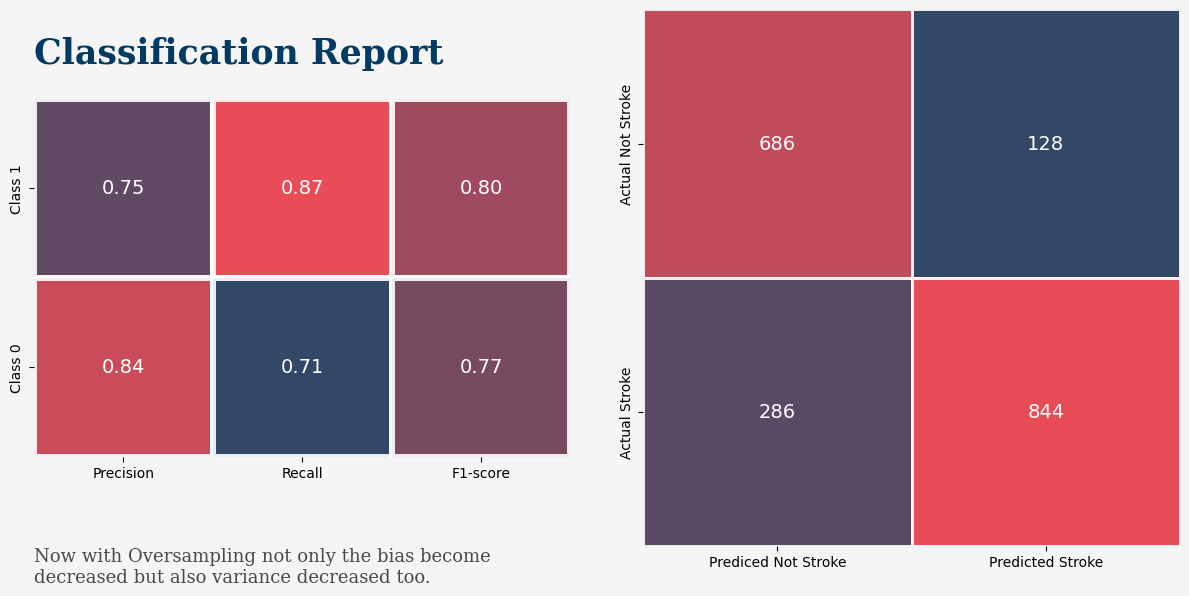

In [97]:
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

fig = plt.figure(figsize=(12, 6), dpi=100)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

fig.patch.set_facecolor('#f6f5f5')
ax0.set_facecolor('#f6f5f5')
ax1.set_facecolor('#f6f5f5')

ax0.text(0, -0.2, "Classification Report", {'font': 'Serif', 'fontsize': '25', 'weight': 'bold', 'color': "#013a63"})

y_pred_over = over_model.predict(test_x_over)
precision = precision_score(test_y_over, y_pred_over, average=None)
recall = recall_score(test_y_over, y_pred_over, average=None)
f1 = f1_score(test_y_over, y_pred_over, average=None)

class0 = [precision[0], recall[0], f1[0]]
class1 = [precision[1], recall[1], f1[1]]

data = [class1, class0]

conf_class0 = confusion_matrix(y_pred_over, test_y_over)[0]
conf_class1 = confusion_matrix(y_pred_over, test_y_over)[1]
conf_data = [conf_class0, conf_class1]

labels = ['Precision', 'Recall', 'F1-score']
classes = ['Class 1', 'Class 0']

col1 = ["#1d3557", "#e63946"]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)

sns.heatmap(ax=ax0, data=data, linewidths=3,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.2f',
            yticklabels=classes, xticklabels=labels, annot_kws={"fontsize": 14}, alpha=0.9)

sns.heatmap(ax=ax1, data=conf_data, linewidths=2,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap1, annot=True, fmt='0.0f',
            yticklabels=['Actual Not Stroke', 'Actual Stroke'], xticklabels=['Prediced Not Stroke', 'Predicted Stroke'], annot_kws={"fontsize": 14}, alpha=0.9)

ax0.text(0, 2.70, "Now with Oversampling not only the bias become\ndecreased but also variance decreased too.",  
         {'font': 'Serif', 'fontsize': '13', 'weight': 'normal', 'color': "black"}, alpha=0.7)


# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


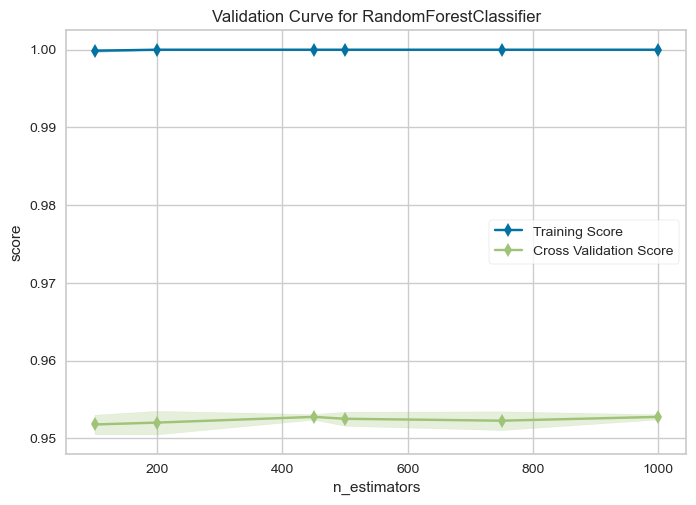

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='n_estimators', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='n_estimators',
                param_range=array([ 100,  200,  450,  500,  750, 1000]),
                scoring='accuracy')


In [98]:
from yellowbrick.model_selection import validation_curve

num_est = [100, 200, 450, 500, 750, 1000]

print(validation_curve(rfc, X = train_x, y = y_train, param_name = "n_estimators", param_range = num_est, scoring = 'accuracy', cv = 3))

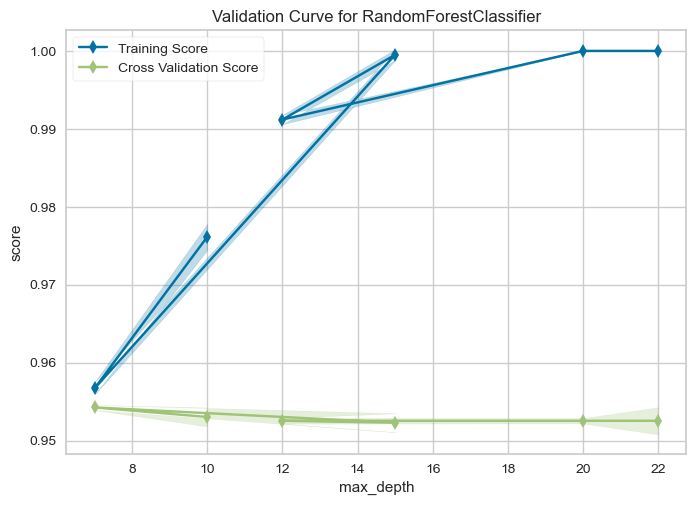

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='max_depth',
                param_range=array([10,  7, 15, 12, 20, 22]),
                scoring='accuracy')


In [99]:
depth_vals = [10, 7, 15, 12, 20, 22]

print(validation_curve(rfc, X = train_x, y = train_y, param_name = "max_depth", param_range = depth_vals, scoring = 'accuracy', cv = 3))

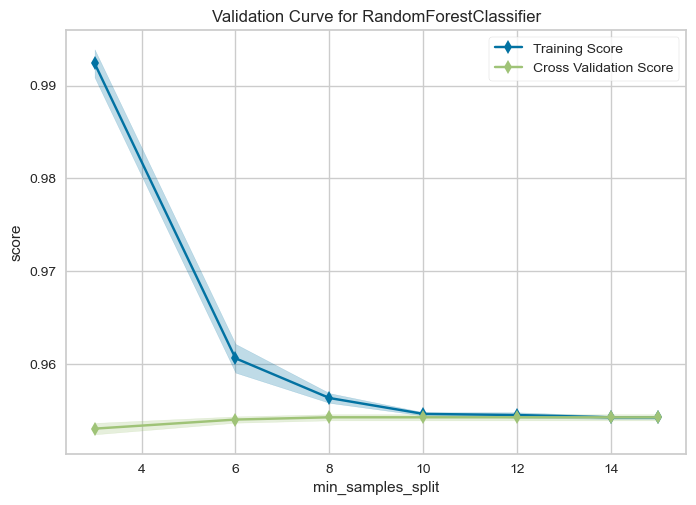

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for RandomForestClassifier'}, xlabel='min_samples_split', ylabel='score'>,
                cv=3, estimator=RandomForestClassifier(),
                param_name='min_samples_split',
                param_range=array([ 3,  6,  8, 10, 12, 14, 15]),
                scoring='accuracy')


In [100]:
min_samples = [3, 6, 8, 10, 12, 14, 15]

print(validation_curve(rfc, X = train_x, y = train_y, param_name = "min_samples_split", param_range = min_samples, scoring = 'accuracy', cv = 3))

In [101]:
rfc2 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 8, max_depth = 15, random_state = 0)

rfc2.fit(train_x, train_y)

pred2 = rfc2.predict(test_x)

accuracy_score(pred2, test_y)

0.9393346379647749

In [102]:
feature_scores = pd.Series(rfc2.feature_importances_, index = train_x.columns).sort_values(ascending = False)
feature_scores

Age_winsorized                    0.282650
bmi_winsorized                    0.219102
avg_glucose_level_winsorized      0.201555
heart_disease                     0.037058
hypertension                      0.032215
ever_married                      0.027186
work_type_Private                 0.020744
smoking_status_smokes             0.020489
smoking_status_never smoked       0.020040
work_type_Self-employed           0.019452
smoking_status_Unknown            0.018532
gender_Male                       0.017130
smoking_status_formerly smoked    0.016981
Residence_type_Rural              0.016691
gender_Female                     0.016593
Residence_type_Urban              0.016489
work_type_Govt_job                0.014887
work_type_children                0.002196
work_type_Never_worked            0.000010
dtype: float64

In [103]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

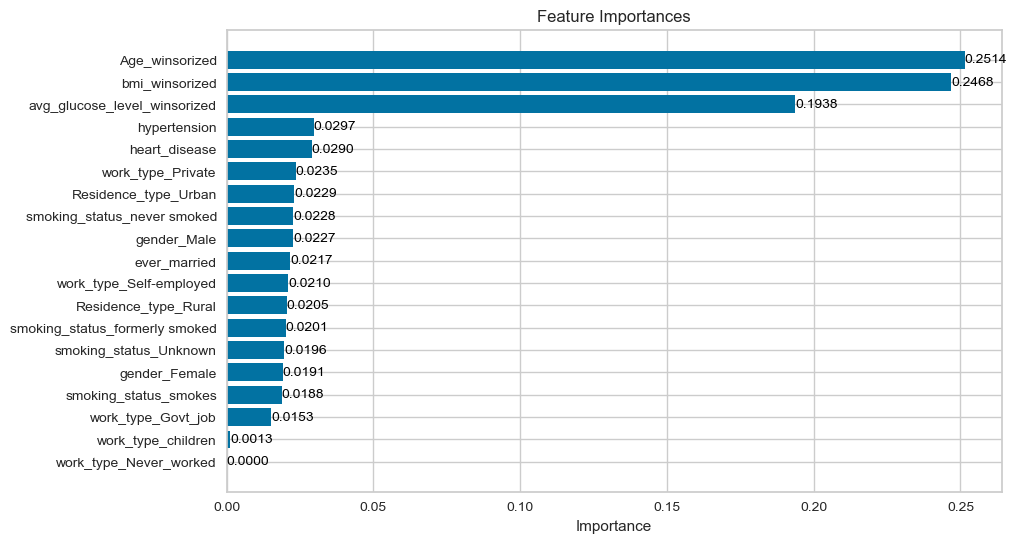

In [104]:
# Visualize feature importances using a bar plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])

# Add annotations to each bar
for bar, importance in zip(bars, feature_importance_df['Importance']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{importance:.4f}', 
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [105]:
train_x.shape

(4087, 19)

In [106]:
rfc3 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 8, max_depth = 15, random_state = 0)

# List of features to keep
features_to_keep = ['Age_winsorized','bmi_winsorized','avg_glucose_level_winsorized']

# Drop all columns except the specified features
new_df1.drop(columns=new_df1.columns.difference(features_to_keep), inplace=True)

# Display the modified DataFrame
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_winsorized                5109 non-null   float64
 1   avg_glucose_level_winsorized  5109 non-null   float64
 2   bmi_winsorized                5109 non-null   float64
dtypes: float64(3)
memory usage: 159.7 KB


In [107]:
# List of features to keep
features_to_keep = ['Age_winsorized','bmi_winsorized','avg_glucose_level_winsorized']

# Drop all columns except the specified features
new_df1.drop(columns=new_df1.columns.difference(features_to_keep), inplace=True)
train_x.drop(columns=train_x.columns.difference(features_to_keep), inplace=True)
test_x.drop(columns=test_x.columns.difference(features_to_keep), inplace=True)

train_x.info()
test_x.info()

rfc.fit(train_x, train_y)

new_pred = rfc.predict(test_x)

accuracy_score(new_pred, test_y)

<class 'pandas.core.frame.DataFrame'>
Index: 4087 entries, 802 to 860
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_winsorized                4087 non-null   float64
 1   avg_glucose_level_winsorized  4087 non-null   float64
 2   bmi_winsorized                4087 non-null   float64
dtypes: float64(3)
memory usage: 127.7 KB
<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 4688 to 2902
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age_winsorized                1022 non-null   float64
 1   avg_glucose_level_winsorized  1022 non-null   float64
 2   bmi_winsorized                1022 non-null   float64
dtypes: float64(3)
memory usage: 31.9 KB


0.9266144814090019

In [108]:
train_x.shape

(4087, 3)

In [109]:
rfc.fit(train_x, train_y)
predict_train = rfc.predict(train_x)
predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [110]:
print(predict_train[:10])

[0 0 0 0 0 0 0 0 0 0]


In [111]:
Acc_train = accuracy_score(train_y, predict_train)
print('accuracy_score on Train dataset : ', Acc_train)

accuracy_score on Train dataset :  0.9960851480303401


In [112]:
#Converting the predicted variable into a dataframe

y_train_pred_final  = pd.DataFrame({'Converted':train_y.values, 'Predicted':predict_train})

#Setting Prospect ID as Index
y_train_pred_final['Prospect ID'] = train_y.index

y_train_pred_final.head()

Converted  Predicted  Prospect ID
0          0          0          802
1          0          0         3927
2          0          0         2337
3          0          0         3910
4          0          0         1886

In [113]:
# Confusion matrix 
confusion_train = confusion_matrix(train_y, predict_train )
print(confusion_train)

[[3897    3]
 [  13  174]]


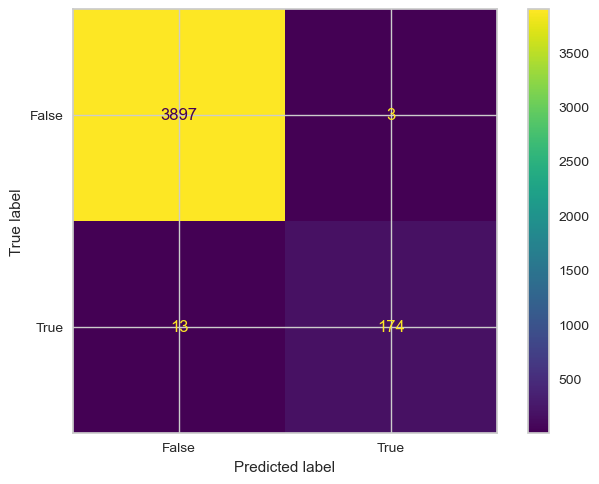

In [114]:
cm_display_train = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_train, display_labels = [False, True])

cm_display_train.plot()
plt.show()

In [115]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

print ("True positive is ",TP)
print ("True negatives is ",TN)
print ("False positives is ",FP)
print ("False negatives is ",FN)

True positive is  174
True negatives is  3897
False positives is  3
False negatives is  13


In [116]:
# Accuracy 
Acc_train = metrics.accuracy_score(train_y, predict_train)
print('Accuracy is ', round(Acc_train*100, 2), '%')

Accuracy is  99.61 %


In [117]:
# Precision / Positive predictive value (PPV)
Prec_train = metrics.precision_score(train_y, predict_train)
print('Precision is ', round(Prec_train*100, 2), '%')

Precision is  98.31 %


In [118]:
# Recall / Sensitivity / True Positive Rate
Sen_train = metrics.recall_score(train_y, predict_train)
print('Sensitivity is ', round(Sen_train*100, 2), '%')

Sensitivity is  93.05 %


In [119]:
# Specificity / True Negative Rate
Spec_train = TN / float(TN+FP)
print('Specificity is ', round(Spec_train*100, 2), '%')

Specificity is  99.92 %


In [120]:
# F1-Score - measure test accuracy
F1_train = metrics.f1_score(train_y, predict_train)
F1_train

0.956043956043956

In [121]:
# False Positive Rate
# predicting Converted when customer does not 
# have Converted
FPR_train = FP/ float(TN+FP)
FPR_train

0.0007692307692307692

In [122]:
# Negative Predictive Value (NPV)
NPV_train = TN / float(TN+FN)
NPV_train

0.9966751918158567

In [123]:
print(classification_report(train_y, predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3900
           1       0.98      0.93      0.96       187

    accuracy                           1.00      4087
   macro avg       0.99      0.96      0.98      4087
weighted avg       1.00      1.00      1.00      4087



In [124]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [125]:
metrics.roc_curve(train_y, predict_train)

(array([0.00000000e+00, 7.69230769e-04, 1.00000000e+00]),
 array([0.        , 0.93048128, 1.        ]),
 array([inf,  1.,  0.]))

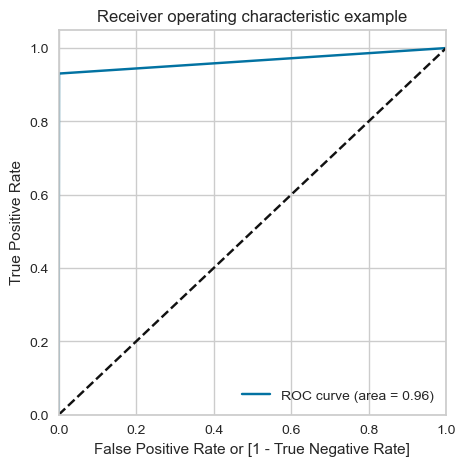

In [126]:
draw_roc(train_y, predict_train)

In [127]:
# predict the target on the test dataset
predict_test = rfc.predict(test_x)
print('Prediction on test data\n\n', predict_test)

Prediction on test data

 [0 0 0 ... 0 0 0]


In [128]:
print(predict_test[:10])

[0 0 0 0 0 0 0 0 0 0]


In [129]:
#Converting the predicted variable into a dataframe

y_test_pred_final  = pd.DataFrame({'Converted':y_test.values, 'Predicted':predict_test})

#Setting Prospect ID as Index
y_test_pred_final['Prospect ID'] = test_y.index

y_test_pred_final.head()

Converted  Predicted  Prospect ID
0          0          0         4688
1          0          0         4478
2          0          0         3521
3          0          0         4355
4          0          0         3826

In [130]:
confusion_test = confusion_matrix(test_y, predict_test )
print(confusion_test)

[[948  12]
 [ 62   0]]


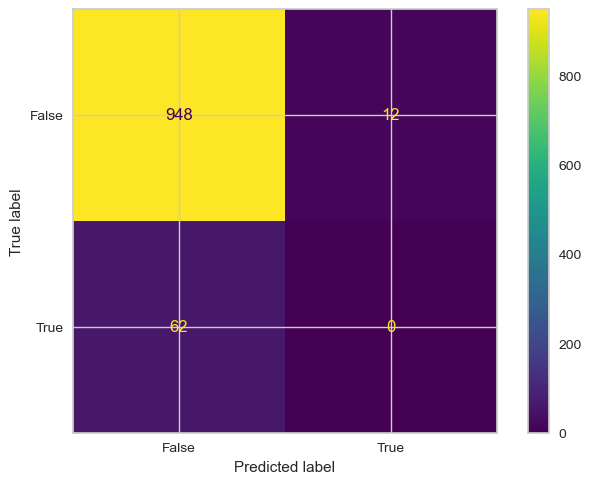

In [131]:
cm_display_test = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_test, display_labels = [False, True])
cm_display_test.plot()
plt.show()

In [132]:
TP2 = confusion_test[1,1] # true positive 
TN2 = confusion_test[0,0] # true negatives
FP2 = confusion_test[0,1] # false positives
FN2 = confusion_test[1,0] # false negatives

print ("True positive is ",TP2)
print ("True negatives is ",TN2)
print ("False positives is ",FP2)
print ("False negatives is ",FN2)

True positive is  0
True negatives is  948
False positives is  12
False negatives is  62


In [133]:
# Accuracy
Acc_test = metrics.accuracy_score(test_y, predict_test )
print('Accuracy is ', round(Acc_test*100, 2), '%')

Accuracy is  92.76 %


In [134]:
# Recall / Sensitivity / True Positive Rate
Sen_test = metrics.recall_score(test_y, predict_test )
print('Sensitivity is ', round(Sen_test*100, 2), '%')

Sensitivity is  0.0 %


In [135]:
# Specificity / True Negative Rate
Spec_test = TN2 / float(TN2+FP2)
print('Specificity is ', round(Spec_test*100, 2), '%')

Specificity is  98.75 %


In [136]:
print(classification_report(test_y, predict_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.00      0.00      0.00        62

    accuracy                           0.93      1022
   macro avg       0.47      0.49      0.48      1022
weighted avg       0.88      0.93      0.90      1022



In [137]:
metrics.roc_curve(test_y, predict_test)

(array([0.    , 0.0125, 1.    ]), array([0., 0., 1.]), array([inf,  1.,  0.]))

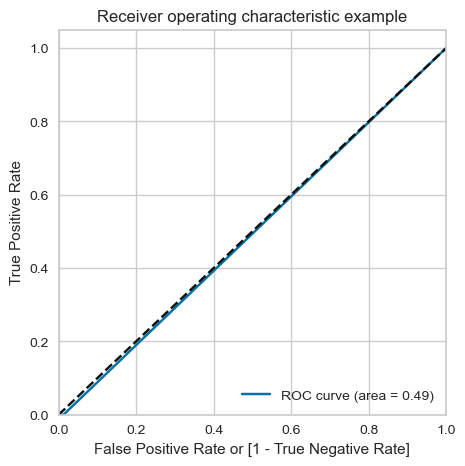

In [138]:
draw_roc(test_y, predict_test)

In [139]:
print("Train Data Accuracy    :{} %".format(round((Acc_train*100),2)))
print("Train Data Sensitivity :{} %".format(round((Sen_train*100),2)))
print("Train Data Specificity :{} %".format(round((Spec_train*100),2)))
print("\n")
print("Test Data Accuracy     :{} %".format(round((Acc_test*100),2)))
print("Test Data Sensitivity  :{} %".format(round((Sen_test*100),2)))
print("Test Data Specificity  :{} %".format(round((Spec_test*100),2)))

Train Data Accuracy    :99.61 %
Train Data Sensitivity :93.05 %
Train Data Specificity :99.92 %


Test Data Accuracy     :92.76 %
Test Data Sensitivity  :0.0 %
Test Data Specificity  :98.75 %


                        Feature  Importance
0                Age_winsorized    0.270119
1  avg_glucose_level_winsorized    0.322539
2                bmi_winsorized    0.407342


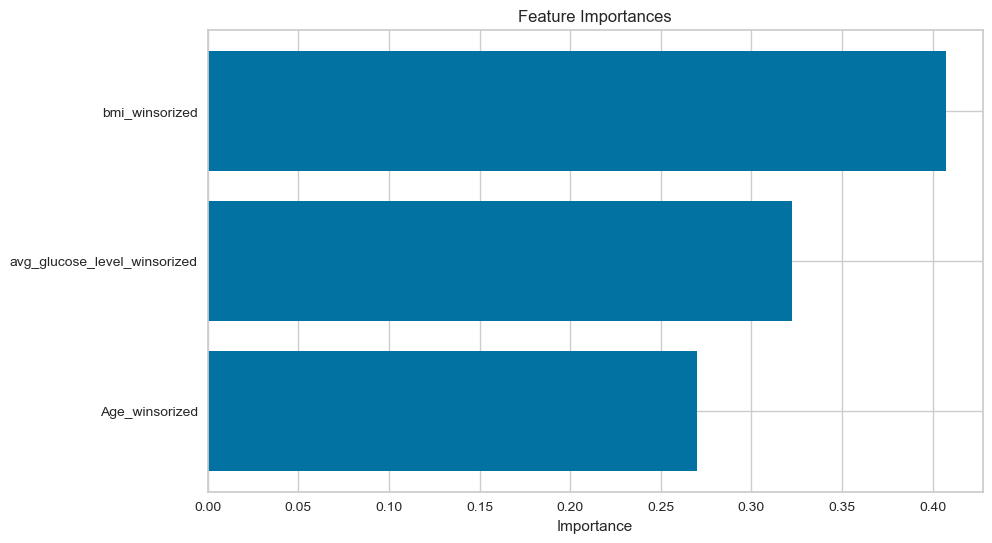

In [140]:
# Create a DataFrame to pair features with their importances
feature_importance_df = pd.DataFrame({'Feature': train_x.columns, 'Importance': rfc.feature_importances_})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Print or visualize feature importances
print(feature_importance_df)

# Visualize feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [141]:
def calculate_probability(user_input):
    weighted_sum = 0
    # Calculate the weighted sum of selected features
    for feature, value in user_input.items():
        weighted_sum += value * feature_importance.get(feature, 0)
        print("Weight: ", weighted_sum)

    return weighted_sum

In [142]:
def give_recommendations(probability):
    recommendations = []
    if probability >= 0.5:  # If lead is likely to get stroke
        recommendations = [
            "Follow the prescribed medical treatment plan diligently.",
        "Attend regular follow-up appointments with healthcare professionals.",
        "Engage in rehabilitation exercises recommended by your healthcare team.",
        "Adopt a heart-healthy diet low in salt, saturated fats, and cholesterol.",
        "Maintain a regular exercise routine as advised by healthcare providers.",
        "Monitor and manage blood pressure regularly.",
        "Quit smoking if applicable, as it contributes to cardiovascular risks.",
        "Limit alcohol consumption to levels recommended by healthcare professionals.",
        "Take medications as prescribed and report any side effects promptly.",
        "Seek emotional and social support for overall well-being.",
        "Stay informed about stroke prevention strategies and warning signs.",
        "Consider participating in support groups for individuals who have experienced strokes."
        ]
    else:  # If lead is likely to Not get stroke
        recommendations = [
             "Maintain a healthy lifestyle with regular exercise and a balanced diet.",
        "Schedule routine health check-ups to monitor overall well-being.",
        "Consider adopting stress management techniques for mental well-being.",
        "Stay informed about general health and wellness practices.",
        "Explore opportunities for continued education and personal development.",
        "Engage in social activities and maintain a strong support network.",
        "Prioritize a good work-life balance for overall health.",
        "Consider participating in preventive health screenings.",
        "Stay hydrated and ensure a sufficient intake of essential nutrients.",
        "Get adequate sleep to support overall physical and mental health.",
        "Explore hobbies and activities that bring joy and relaxation.",
        "Stay connected with friends and family for emotional support."
        ]
    return recommendations

In [143]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg 
import matplotlib.cm as cm
import random 

def predict_conversion():
    # Get user inputs
    try:
        age = float(age_var.get())
        avg_glucose_level = float(glucose_level_var.get())
        bmi = float(bmi_var.get())
    except ValueError:
        messagebox.showerror("Error", "Please enter valid inputs.")
        return

    # Create a DataFrame from the user inputs
    user_input = {
        'age': age,
        'avg_glucose_level': avg_glucose_level,
        'bmi': bmi,
    }

    print(user_input, "\n")
    
    # Create a new Tkinter window to display the message box and the graph
    root = tk.Tk()
    root.title('Prediction Result')
    
    # Graph 
    selected_features = []
    importance_scores = []
    for feature, value in user_input.items():
        selected_features.append(feature)
        importance_scores.append(feature_importance.get(feature, 0))
            
    # Plot the feature importance graph
    fig, ax = plt.subplots(figsize=(10, 2))  
    bars = ax.barh(selected_features, importance_scores, color='skyblue')
    ax.set_xlabel('Importance')
    ax.set_title('Feature Importances')
    
    for bar, importance_score in zip(bars, importance_scores):
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2, f'{importance_score:.2%}', va='center', ha='left')

    # Ensure the graph fits within the Tkinter window size
    plt.tight_layout()

    # Embed the graph within the Tkinter window
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()
    
    # Display the prediction message in a label
    probability = calculate_probability(user_input)
    
    prediction_message = ""
    recommendations = random.sample(give_recommendations(probability), 3)
    
    if probability >= 0.75:
        prediction_message = f"The probability of conversion is {probability:.2f}%\n The lead is likely to be getting stroke."
        label = tk.Label(root, text=prediction_message, fg='green', font=("Times New Roman", 16, "bold")) 
    else:
        prediction_message = f"The probability of conversion is {probability:.2f}%\n The lead is likely to be Not getting stroke."
        label = tk.Label(root, text=prediction_message, fg='red', font=("Times New Roman", 16, "bold"))


    
    label.pack()
    
    # Display recommendations in the Tkinter window
    recommendations_label = tk.Label(root, text="\nRecommendations:", font=("Times New Roman", 18, "bold"), fg='black')
    recommendations_label.pack()

    for index, recommendation in enumerate(recommendations, start=1):
        rec_label = tk.Label(root, text=f"{index}. {recommendation}", font=("Times New Roman", 18), fg='black')
        rec_label.pack(anchor="center")

In [144]:
def print_selected_values():
    print("Selected Age:", age_var.get())
    print("Selected Average Glucose Level:", glucose_level_var.get())
    print("Selected BMI:", bmi_var.get())
    print("\n")

{'age': 20.0, 'avg_glucose_level': 70.0, 'bmi': 20.0} 

Weight:  5.50958
Weight:  28.36346
Weight:  36.3242


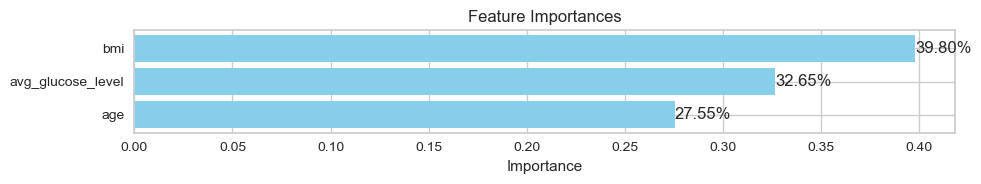

In [145]:
import tkinter as tk
from tkinter import messagebox

# Create tkinter window
window = tk.Tk()
window.title("Stroke Prediction")
window.geometry("1000x800")

# Calculate the position to center the window
win_width = window.winfo_screenwidth()
win_height = window.winfo_screenheight()
pos_right = int(win_width / 2 - 250)  # Assuming width=500 for the window
pos_down = int(win_height / 2 - 200)  # Assuming height=300 for the window

# Set the window's position and size
window.geometry("500x400+{}+{}".format(pos_right, pos_down))

feature_importance = {
    'avg_glucose_level': 0.326484,
    'age': 0.275479,
    'bmi': 0.398037,
}

# Function to set width as 80% of the window
def set_width(widget):
    widget_width = int(window.winfo_width() * 0.8)
    widget.config(width=widget_width)

# Function to create label and entry in a single row
def create_label_and_entry(text, variable, options=None):
    frame = tk.Frame(window)
    frame.pack(padx=10, pady=5, fill=tk.X)

    label = tk.Label(frame, text=text, width=25, anchor="w")
    label.pack(side=tk.LEFT)

    if options:
        dropdown = tk.OptionMenu(frame, variable, *options)
        dropdown.pack(side=tk.LEFT, fill=tk.X, expand=True)
        set_width(dropdown)
        variable.set("Select")
    else:
        entry = tk.Entry(frame, textvariable=variable)
        entry.pack(side=tk.LEFT, fill=tk.X, expand=True)
        set_width(entry)

# Variables
age_var = tk.StringVar(window)
glucose_level_var = tk.StringVar(window)
bmi_var = tk.StringVar(window)

# Labels and Entries with dropdown
create_label_and_entry("Age", age_var)
create_label_and_entry("Average Glucose Level", glucose_level_var)
create_label_and_entry("BMI", bmi_var)

# Button to predict
predict_button = tk.Button(window, text="Predict Stroke", command=predict_conversion, bg='#4CAF50', fg='white')
predict_button.pack()

# Run tkinter main loop
window.mainloop()
